In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import sklearn.cluster
import itertools
from IPython.display import display
from experimental.pokerbots import hand_evaluator_python as hep, bin_centers_pb2


In [2]:
data_directory = os.path.expanduser('~/code/robot/experimental/pokerbots/cluster_hands')

In [3]:
os.listdir(data_directory)

['flop_cards', 'hole_cards_output.csv']

In [4]:
hole_card_data = pd.read_csv(os.path.join(data_directory, 'hole_cards_output.csv'))

In [6]:
def plot_cdf(data):
    sorted_data = sorted(data)
    frac = np.linspace(0, 1.0, len(sorted_data))
    plt.plot(sorted_data, frac)

<IPython.core.display.Javascript object>


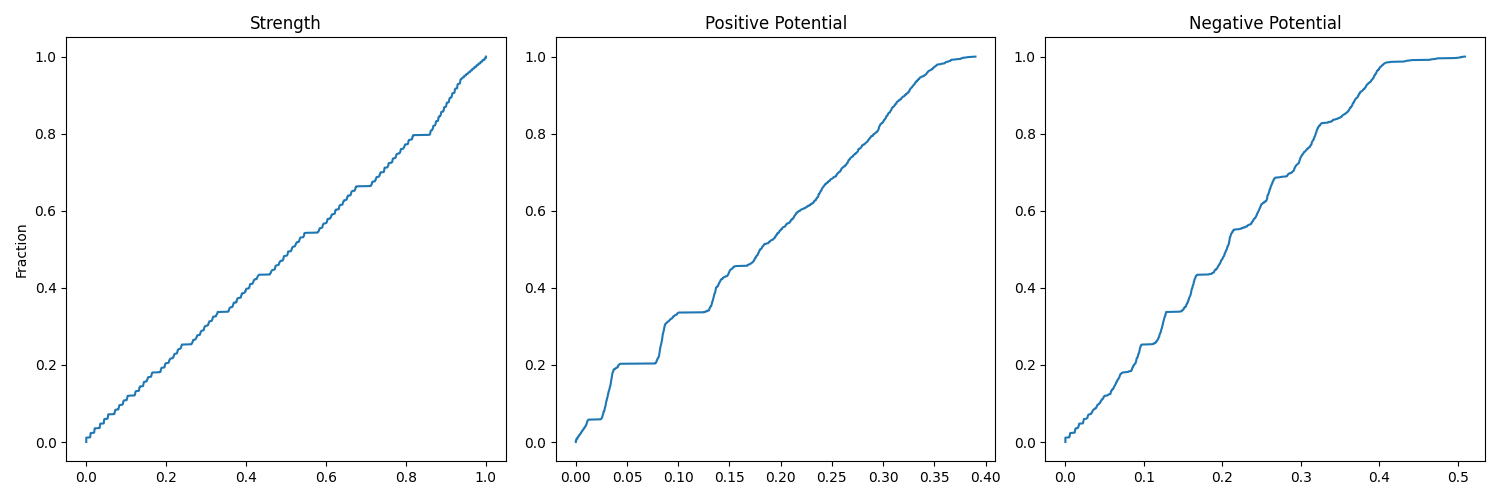

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plot_cdf(hole_card_data['strength'])
plt.ylabel('Fraction')
plt.title('Strength')
plt.subplot(132)
plot_cdf(hole_card_data['pos_pot'])
plt.title('Positive Potential')
plt.subplot(133)
plot_cdf(hole_card_data['neg_pot'])
plt.title('Negative Potential')
plt.tight_layout()

In [62]:
k_means_fit = sklearn.cluster.KMeans(n_clusters=12, n_init=20)
hole_card_data['cluster_idx'] = k_means_fit.fit_predict(hole_card_data[['strength', 'neg_pot', 'pos_pot']])

<IPython.core.display.Javascript object>


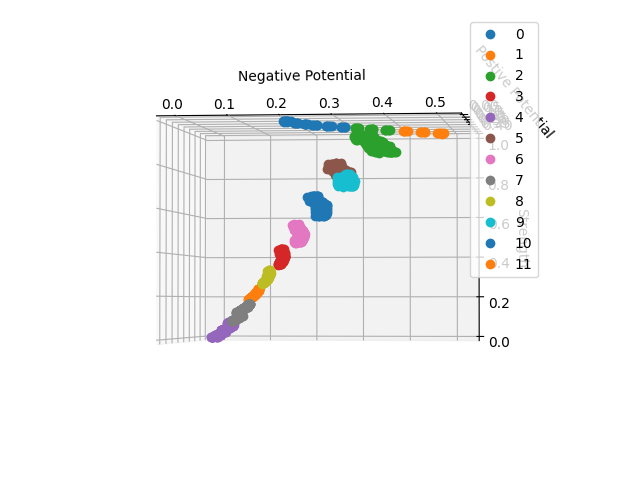

In [63]:
ax = plt.figure().add_subplot(projection='3d')
for (i, group) in hole_card_data.groupby('cluster_idx'):
    ax.plot(group.neg_pot, group.pos_pot, group.strength, 'o', label=i)
plt.legend()
ax.set_xlabel('Negative Potential')
ax.set_ylabel('Postive Potential')
ax.set_zlabel('Strength')
plt.tight_layout()

In [64]:
cmap(hole_card_data['cluster_idx']).T.shape

(4, 1326)

In [70]:
for (i, group) in hole_card_data.groupby('cluster_idx'):
    print('Cluster:', i)
    print(group.mean(numeric_only=True))
    print(list(group['card1'] + group['card2']))

Cluster: 0
strength       0.627627
neg_pot        0.251333
pos_pot        0.139109
cluster_idx    0.000000
dtype: float64
['2sQs', '2sQh', '2sQc', '2sQd', '2hQs', '2hQh', '2hQc', '2hQd', '2cQs', '2cQh', '2cQc', '2cQd', '2dQs', '2dQh', '2dQc', '2dQd', '3sQs', '3sQh', '3sQc', '3sQd', '3hQs', '3hQh', '3hQc', '3hQd', '3cQs', '3cQh', '3cQc', '3cQd', '3dQs', '3dQh', '3dQc', '3dQd', '4sQs', '4sQh', '4sQc', '4sQd', '4hQs', '4hQh', '4hQc', '4hQd', '4cQs', '4cQh', '4cQc', '4cQd', '4dQs', '4dQh', '4dQc', '4dQd', '5sQs', '5sQh', '5sQc', '5sQd', '5hQs', '5hQh', '5hQc', '5hQd', '5cQs', '5cQh', '5cQc', '5cQd', '5dQs', '5dQh', '5dQc', '5dQd', '6sQs', '6sQh', '6sQc', '6sQd', '6hQs', '6hQh', '6hQc', '6hQd', '6cQs', '6cQh', '6cQc', '6cQd', '6dQs', '6dQh', '6dQc', '6dQd', '7sQs', '7sQh', '7sQc', '7sQd', '7hQs', '7hQh', '7hQc', '7hQd', '7cQs', '7cQh', '7cQc', '7cQd', '7dQs', '7dQh', '7dQc', '7dQd', '8sQs', '8sQh', '8sQc', '8sQd', '8hQs', '8hQh', '8hQc', '8hQd', '8cQs', '8cQh', '8cQc', '8cQd', '8dQs', '8dQh

In [74]:
flop_directory = os.path.join(data_directory, 'flop_cards')

flop_cards = []
for filename in os.listdir(flop_directory):
    flop_cards.append(pd.read_csv(os.path.join(flop_directory, filename)))
    flop_cards[-1]['card_1'] = filename[:2]
    flop_cards[-1]['card_2'] = filename[2:4]
flop_cards = pd.concat(flop_cards)

In [76]:
flop_k_means = sklearn.cluster.KMeans(n_clusters=100, n_init=10)
flop_cards['cluster_idx'] = flop_k_means.fit_predict(flop_cards[['strength', 'neg_pot', 'pos_pot']])

In [83]:
for (i, group) in flop_cards.groupby('cluster_idx'):
    print('Cluster:', i, 'length:', len(group))
    print(group.mean(numeric_only=True))
    display(group.sample(20))

Cluster: 0 length: 450868
strength       0.310797
neg_pot        0.110838
pos_pot        0.157012
cluster_idx    0.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3701,3s,5s,Td,0.293,0.114,0.163,2c,Qh,0
6392,3d,4s,Kc,0.310,0.100,0.142,2s,Jd,0
15954,7c,7d,Ts,0.311,0.117,0.145,4h,Jh,0
1808,2h,6d,7s,0.314,0.128,0.165,4c,Qh,0
16790,8s,9c,9d,0.308,0.107,0.139,2s,Jd,0
12800,5d,8d,Ac,0.301,0.109,0.155,3d,Jh,0
4623,3s,4h,Kh,0.334,0.097,0.169,6h,Js,0
3423,2d,3s,Kh,0.307,0.095,0.154,4h,Js,0
11509,5h,8h,9c,0.302,0.132,0.154,2c,Qc,0
13252,6s,7d,Jc,0.296,0.114,0.181,3c,Qc,0


Cluster: 1 length: 313778
strength       0.905674
neg_pot        0.190975
pos_pot        0.017388
cluster_idx    1.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3803,2d,5c,9h,0.891,0.190,0.032,7d,9d,1
10927,5s,9s,Kc,0.899,0.180,0.026,3d,Ks,1
15009,6c,Js,Kc,0.924,0.180,0.014,7c,Kd,1
5675,3c,5h,Js,0.888,0.188,0.019,2h,Jc,1
9172,4h,6s,9d,0.919,0.192,0.022,9h,Th,1
3845,2d,5d,Jh,0.908,0.196,0.015,6h,Jc,1
13196,5d,7s,Jc,0.912,0.193,0.029,9d,Js,1
9293,4h,7s,9h,0.922,0.203,0.024,9d,Th,1
7321,3d,4h,Ts,0.901,0.191,0.024,9h,Th,1
4662,3s,4c,Ks,0.906,0.205,0.018,7h,Kc,1


Cluster: 2 length: 231929
strength       0.553830
neg_pot        0.241693
pos_pot        0.072736
cluster_idx    2.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
9144,4h,5d,Js,0.564,0.227,0.081,9s,Ah,2
12680,5c,7c,8c,0.511,0.283,0.080,Kh,Ah,2
7556,3d,5d,Ah,0.580,0.238,0.055,8c,Ks,2
5956,3h,7h,9s,0.584,0.250,0.078,Ks,Ad,2
12178,5h,8h,Kh,0.548,0.221,0.069,Qd,Ac,2
9841,4c,5c,8h,0.541,0.243,0.097,Td,As,2
14807,7s,8d,9c,0.553,0.247,0.033,4s,4d,2
17395,8d,Ts,Qc,0.545,0.233,0.043,4s,4h,2
19123,Td,Qd,Ad,0.576,0.247,0.083,6c,Kc,2
1224,2h,2d,3h,0.550,0.228,0.064,7c,Ks,2


Cluster: 3 length: 391029
strength       0.093567
neg_pot        0.042038
pos_pot        0.189529
cluster_idx    3.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1093,2s,Jc,Kd,0.112,0.044,0.172,5s,7h,3
9484,4h,9h,Kd,0.115,0.057,0.206,5c,7s,3
13078,6s,6h,Qc,0.107,0.052,0.210,5d,7c,3
11473,5h,7d,Kc,0.079,0.028,0.171,2h,8s,3
4092,2d,8h,Ah,0.091,0.040,0.190,4c,7d,3
6984,3c,9s,9c,0.091,0.035,0.181,4s,7d,3
1541,2h,4d,9c,0.086,0.035,0.200,3s,8h,3
3468,2d,3h,Kc,0.094,0.029,0.204,5c,8h,3
11698,5h,Td,Qs,0.079,0.024,0.203,2d,7d,3
9595,4h,Td,Kd,0.095,0.045,0.185,5s,7s,3


Cluster: 4 length: 484444
strength       0.439074
neg_pot        0.153742
pos_pot        0.124426
cluster_idx    4.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8137,4s,4h,9s,0.422,0.160,0.133,6d,Qh,4
6151,3h,9c,Js,0.436,0.160,0.107,5d,Ks,4
13139,6s,6d,Qs,0.446,0.166,0.116,5h,Js,4
9409,4h,8h,Qs,0.445,0.140,0.144,6h,Kc,4
11221,5s,5c,Jh,0.456,0.166,0.122,8c,Qd,4
17272,8h,Ks,Kh,0.428,0.154,0.111,3c,Js,4
7837,3d,8c,Kh,0.448,0.142,0.111,6c,Qh,4
14774,6c,8s,Kc,0.452,0.156,0.125,7h,Qs,4
13548,5d,Jc,Ac,0.460,0.159,0.116,7s,Qd,4
15279,7s,8d,Ks,0.440,0.159,0.144,6c,Qs,4


Cluster: 5 length: 366124
strength       0.695707
neg_pot        0.201858
pos_pot        0.074558
cluster_idx    5.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
6320,3h,Qc,Qd,0.693,0.194,0.070,8s,Ad,5
16981,8s,Kh,As,0.702,0.202,0.056,5c,8c,5
8948,4h,4c,6d,0.693,0.220,0.068,9h,Ah,5
5166,3s,9s,Jc,0.687,0.221,0.084,3h,Qh,5
14619,6h,Ks,Kh,0.711,0.207,0.066,7c,Ah,5
1114,2s,Qs,Kh,0.688,0.221,0.080,2c,9s,5
320,2s,4s,6s,0.729,0.188,0.133,5s,5c,5
15419,7s,Td,Ad,0.697,0.210,0.060,3h,7h,5
1359,2h,3d,4h,0.721,0.217,0.130,3h,5d,5
9297,4h,7h,Tc,0.708,0.189,0.091,4c,Kh,5


Cluster: 6 length: 310893
strength       0.218659
neg_pot        0.091839
pos_pot        0.126210
cluster_idx    6.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
148,2s,3s,5s,0.225,0.113,0.140,Th,Jd,6
11506,5h,8h,8d,0.230,0.094,0.145,3s,Ts,6
6096,3h,9s,Kh,0.199,0.089,0.143,6d,8s,6
7087,3d,9d,Ad,0.198,0.086,0.119,2s,Tc,6
18115,9c,Th,Ac,0.238,0.112,0.127,5d,8h,6
13080,6s,6h,Ks,0.234,0.101,0.142,4s,9d,6
18566,Ts,Qs,Qc,0.249,0.104,0.106,3c,8d,6
9600,4c,Js,Jh,0.215,0.069,0.133,2c,9s,6
15065,6d,Qc,As,0.242,0.097,0.124,4c,9d,6
14606,6c,Qd,Kc,0.213,0.069,0.128,2h,9h,6


Cluster: 7 length: 60271
strength       0.141289
neg_pot        0.029524
pos_pot        0.491913
cluster_idx    7.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10735,4d,7h,9h,0.118,0.022,0.541,6h,8h,7
9070,4c,5c,9d,0.132,0.029,0.487,3c,Tc,7
13206,5d,7h,As,0.116,0.042,0.452,6h,8h,7
5330,3s,Jc,Ac,0.113,0.027,0.491,6c,7c,7
5332,3s,Jd,Qs,0.156,0.031,0.476,5s,8s,7
989,2s,Ts,Js,0.171,0.032,0.457,7h,8s,7
18905,Tc,Kc,Kd,0.142,0.024,0.453,3c,7c,7
5081,3h,8s,As,0.146,0.021,0.486,2s,9s,7
15398,7h,Tc,Kc,0.077,0.020,0.492,2c,6c,7
9364,4h,7d,Kd,0.109,0.021,0.473,6d,8d,7


Cluster: 8 length: 145358
strength       0.065400
neg_pot        0.025746
pos_pot        0.342173
cluster_idx    8.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14238,6c,7c,8d,0.092,0.030,0.339,4h,9d,8
12526,5d,6h,Ad,0.048,0.022,0.363,3c,7d,8
1362,2h,3c,4d,0.074,0.022,0.378,5s,9h,8
2435,2c,3h,As,0.073,0.024,0.316,4h,8d,8
8222,4h,5s,Jh,0.049,0.015,0.347,3c,7h,8
5538,3c,4c,5h,0.056,0.020,0.321,2s,9c,8
1571,2h,4d,7h,0.062,0.016,0.368,6h,8d,8
9031,4h,5s,9h,0.085,0.039,0.345,6d,8s,8
14704,6d,7c,9h,0.090,0.040,0.335,4s,8s,8
8352,4s,5d,7d,0.088,0.021,0.365,8h,9d,8


Cluster: 9 length: 348833
strength       0.980122
neg_pot        0.086441
pos_pot        0.003110
cluster_idx    9.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1637,2h,5s,Ac,0.983,0.089,0.012,As,Ad,9
5152,3s,8c,Kd,0.989,0.103,0.001,8d,Ks,9
2059,2d,9h,Jc,0.994,0.103,0.001,2h,2c,9
4744,3s,5c,5d,0.986,0.088,0.001,5s,Jc,9
17866,9s,9d,As,0.982,0.091,0.002,5s,9c,9
19169,Js,Jd,Ad,0.984,0.093,0.003,9s,Jc,9
8966,4c,4d,Jd,0.970,0.073,0.002,4s,6d,9
5418,3c,3d,6s,0.982,0.087,0.002,3h,Th,9
11223,5s,5d,Qs,0.982,0.110,0.001,5h,Jc,9
17300,8h,8d,9s,0.985,0.091,0.002,8c,Qs,9


Cluster: 10 length: 105459
strength        0.476336
neg_pot         0.096501
pos_pot         0.259488
cluster_idx    10.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
12338,5c,Tc,Ac,0.519,0.085,0.259,2d,Kc,10
7962,3d,9d,Kd,0.456,0.071,0.273,Jd,Qs,10
18102,9s,9d,Js,0.515,0.073,0.324,Ts,Qs,10
12153,5h,8s,Kh,0.486,0.075,0.263,Jh,Qh,10
1053,2s,Th,Ah,0.456,0.097,0.239,Jc,Qh,10
18986,Tc,Qs,Qc,0.516,0.089,0.250,2c,Kc,10
4411,2d,Kd,Ah,0.440,0.088,0.254,6d,Jd,10
16177,7h,Ts,Jd,0.482,0.106,0.248,Qd,Kh,10
16291,7c,Qc,Kc,0.507,0.137,0.250,6c,Ad,10
3275,2c,Tc,Kd,0.484,0.113,0.235,Jh,Qc,10


Cluster: 11 length: 322009
strength        0.821650
neg_pot         0.248118
pos_pot         0.034564
cluster_idx    11.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17051,8h,9s,Tc,0.841,0.271,0.026,4s,Th,11
8627,4s,8s,Jc,0.821,0.232,0.053,8h,Qd,11
10036,4c,7h,Ts,0.831,0.231,0.035,7s,Ad,11
2750,2c,5h,Kd,0.805,0.247,0.047,5d,Qs,11
3795,2d,5d,7h,0.813,0.249,0.048,5s,Kh,11
8291,4s,5h,Ts,0.820,0.276,0.039,5d,Ah,11
1766,2h,6s,Qh,0.828,0.237,0.027,6d,Ad,11
1224,2h,2d,3c,0.814,0.271,0.030,3s,9s,11
6603,3c,5h,8h,0.811,0.262,0.043,5d,Ks,11
1389,2h,3d,Qs,0.805,0.245,0.033,3c,Td,11


Cluster: 12 length: 417856
strength        0.225082
neg_pot         0.084839
pos_pot         0.172537
cluster_idx    12.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1874,2h,7h,8d,0.228,0.104,0.184,5d,Js,12
4184,2d,9s,Kd,0.225,0.081,0.165,4h,Ts,12
15299,7s,9s,Qc,0.239,0.088,0.154,2h,Td,12
10315,4d,Tc,Qc,0.217,0.067,0.187,3d,9d,12
1373,2h,3c,7c,0.215,0.093,0.194,8s,Jd,12
2337,2c,2d,Jd,0.236,0.095,0.175,5d,9c,12
12425,5c,Qd,Kh,0.219,0.051,0.148,2c,9h,12
12360,5c,Jh,Qd,0.227,0.065,0.194,2h,9h,12
2467,2c,3c,Jh,0.237,0.100,0.176,8s,Td,12
10306,4d,Th,Ac,0.216,0.071,0.191,2d,9d,12


Cluster: 13 length: 157404
strength        0.595857
neg_pot         0.151187
pos_pot         0.153286
cluster_idx    13.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
18807,Ts,Tc,Qd,0.631,0.128,0.148,Js,Ks,13
9799,4d,5c,6d,0.619,0.181,0.178,4c,7c,13
11943,5d,6d,9d,0.633,0.166,0.138,4d,5h,13
3502,2d,3c,Td,0.593,0.163,0.147,Kh,Ad,13
5656,3h,5h,6h,0.611,0.161,0.167,3c,Jh,13
4322,2d,Td,Ks,0.583,0.170,0.140,Jc,As,13
19249,Jh,Jd,Qh,0.598,0.128,0.121,9s,Kh,13
17203,8s,Td,Kh,0.576,0.169,0.161,Qc,Ac,13
6484,3d,4d,6c,0.601,0.172,0.151,3h,5c,13
8717,4s,9s,Jc,0.577,0.174,0.146,Tc,Ac,13


Cluster: 14 length: 128281
strength        0.262353
neg_pot         0.069453
pos_pot         0.327375
cluster_idx    14.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
4053,2d,7c,Td,0.241,0.059,0.333,9h,Jd,14
16971,7d,Qd,Ad,0.246,0.055,0.327,8d,9s,14
14859,6c,9s,Jh,0.270,0.060,0.380,8s,Ts,14
14732,6c,7c,9s,0.242,0.071,0.332,Ts,Jc,14
4637,3s,4c,6d,0.294,0.091,0.306,5s,Qh,14
15418,6d,Td,Ac,0.263,0.071,0.295,8d,9h,14
4353,2d,Jd,Ad,0.260,0.065,0.301,7s,9d,14
15598,7s,7d,9s,0.287,0.093,0.313,8c,Tc,14
15253,6d,8h,Qh,0.275,0.079,0.330,9s,Td,14
10271,4c,9d,Ts,0.252,0.070,0.362,8d,Js,14


Cluster: 15 length: 262806
strength        0.085912
neg_pot         0.043652
pos_pot         0.136335
cluster_idx    15.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14879,7s,9c,Js,0.103,0.052,0.155,3h,6h,15
16474,8s,9d,Qh,0.080,0.041,0.144,3c,6c,15
18287,9d,Ts,Ac,0.100,0.053,0.160,4s,6h,15
19538,Qd,As,Ah,0.093,0.052,0.144,3s,6h,15
900,2s,9s,9h,0.081,0.034,0.163,4c,7c,15
18987,Td,Qh,Ks,0.073,0.036,0.143,2d,6h,15
16876,8h,Td,As,0.060,0.042,0.144,3s,5c,15
18760,Th,Ks,Ah,0.064,0.045,0.140,4s,5d,15
18294,9d,Th,Jd,0.060,0.046,0.079,4c,5s,15
17821,9s,Kd,Ac,0.093,0.051,0.130,2c,6d,15


Cluster: 16 length: 278789
strength        0.215533
neg_pot         0.078667
pos_pot         0.216928
cluster_idx    16.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
2489,2c,3d,5d,0.194,0.075,0.210,9d,Ts,16
3776,2d,5h,Jc,0.201,0.054,0.221,8h,9d,16
8652,4s,8c,Qs,0.190,0.070,0.227,7s,9d,16
3618,2d,4h,9h,0.195,0.071,0.202,8s,Tc,16
16146,7c,Ts,Kh,0.235,0.067,0.214,2s,9s,16
2840,2c,6s,Tc,0.219,0.085,0.203,8s,Jh,16
3810,2d,5c,Jh,0.241,0.070,0.205,8d,Tc,16
12596,5d,7s,8d,0.213,0.080,0.231,4d,Jh,16
5686,3h,5h,As,0.206,0.088,0.237,4c,Tc,16
14439,6c,9c,Qh,0.226,0.077,0.196,2d,Tc,16


Cluster: 17 length: 213532
strength        0.016833
neg_pot         0.008163
pos_pot         0.236297
cluster_idx    17.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
975,2s,9d,Qh,0.032,0.005,0.220,3d,6h,17
5544,3c,4c,6d,0.000,0.000,0.269,2s,7h,17
5431,3h,3c,9c,0.023,0.014,0.263,4h,5h,17
5150,3h,9s,Kh,0.028,0.014,0.216,2h,6s,17
10679,5h,7s,Ts,0.016,0.008,0.230,2h,4h,17
4918,3h,7s,8h,0.010,0.003,0.216,2s,5s,17
3813,2d,5d,Qs,0.036,0.009,0.229,3s,7d,17
6865,3d,7d,Js,0.010,0.003,0.226,2d,5c,17
13363,6h,9h,9c,0.017,0.010,0.213,2d,4h,17
1974,2h,8h,Kd,0.000,0.000,0.219,3h,4s,17


Cluster: 18 length: 365211
strength        0.473322
neg_pot         0.149786
pos_pot         0.152151
cluster_idx    18.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1638,2h,5h,5c,0.464,0.138,0.144,8c,Qh,18
4082,2d,7d,Jh,0.478,0.168,0.148,Qc,Kh,18
3400,2d,3s,7s,0.497,0.154,0.146,Jd,Ks,18
1626,2h,5s,Jd,0.475,0.150,0.135,Td,Kc,18
13022,5c,Qd,Kd,0.474,0.157,0.133,7d,Jc,18
3085,2c,8h,8c,0.473,0.150,0.155,9c,Qs,18
16307,7h,Kh,Ac,0.476,0.160,0.137,9c,Jc,18
5166,3s,8d,Jc,0.470,0.147,0.150,9h,Kd,18
12270,5h,9d,Ts,0.451,0.171,0.158,7h,Kc,18
10227,4c,8d,Ah,0.470,0.126,0.150,Th,Qs,18


Cluster: 19 length: 279562
strength        0.789862
neg_pot         0.169274
pos_pot         0.043531
cluster_idx    19.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17397,8h,9d,Ks,0.791,0.146,0.061,9s,Ts,19
7135,3c,Td,As,0.758,0.165,0.031,9s,9d,19
2097,2h,9d,Td,0.779,0.164,0.045,6d,9c,19
11445,5s,7h,Kh,0.792,0.162,0.056,7d,9h,19
12976,5d,Jc,Ad,0.804,0.185,0.033,2s,Js,19
3022,2c,7d,Qs,0.805,0.155,0.035,7h,Th,19
11122,5s,Qc,Kc,0.811,0.178,0.037,4c,Qs,19
18419,9c,Qh,Kd,0.800,0.190,0.053,7c,Qc,19
14432,6h,9d,Tc,0.789,0.189,0.055,7h,9c,19
6320,3h,Qd,Ks,0.811,0.149,0.028,8s,Qc,19


Cluster: 20 length: 257403
strength        0.654671
neg_pot         0.196417
pos_pot         0.059893
cluster_idx    20.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
18062,9h,9c,Th,0.670,0.212,0.061,2c,Ah,20
4455,3s,3h,Qc,0.676,0.197,0.044,6d,Ah,20
14541,6h,Jh,Ks,0.667,0.188,0.076,6d,Tc,20
18694,Ts,Jh,Jd,0.662,0.198,0.047,2d,Ah,20
17036,8c,9s,Qh,0.626,0.180,0.054,7c,7d,20
6064,3c,8d,Js,0.660,0.220,0.068,3s,7d,20
16277,7d,Qh,Ac,0.657,0.158,0.074,2d,7h,20
17098,8h,9d,Qs,0.670,0.199,0.067,5s,8d,20
17104,8h,9d,Kc,0.658,0.158,0.054,3h,8c,20
11226,5h,5d,Qc,0.648,0.195,0.066,3c,Ac,20


Cluster: 21 length: 58885
strength        0.040568
neg_pot         0.009567
pos_pot         0.556395
cluster_idx    21.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15727,7c,9c,Qd,0.069,0.021,0.530,4c,5c,21
12604,6s,7h,Js,0.018,0.007,0.512,2s,4s,21
1157,2s,Kh,As,0.077,0.028,0.517,5s,6s,21
3309,2c,Jd,Qc,0.000,0.000,0.549,3c,4c,21
8254,4c,5c,Ts,0.000,0.000,0.655,2c,3c,21
4064,3s,8s,Kd,0.012,0.004,0.560,2s,5s,21
5659,3h,5h,7s,0.033,0.008,0.524,4h,8h,21
2733,2c,5c,9c,0.025,0.006,0.514,4h,6c,21
1623,2h,5c,Jh,0.000,0.000,0.585,3h,4h,21
7810,4s,8c,Qc,0.031,0.006,0.574,2c,6c,21


Cluster: 22 length: 353635
strength        0.979479
neg_pot         0.182728
pos_pot         0.003502
cluster_idx    22.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
181,2s,3h,Kd,0.984,0.204,0.001,2h,3d,22
7230,3c,Qc,Ad,0.979,0.163,0.007,Jd,Ah,22
8463,4s,6c,Jc,0.965,0.187,0.017,Ks,Kc,22
14314,6h,7d,Ad,0.974,0.169,0.004,Jd,Ac,22
18562,9c,Jh,As,0.980,0.170,0.002,Kh,Ac,22
14255,6h,7h,Ks,0.961,0.177,0.010,Qh,Kc,22
9547,4h,9c,Ah,0.974,0.200,0.002,Tc,Ac,22
5192,3s,9c,Ks,0.981,0.190,0.003,3h,9s,22
3321,2c,Jd,Qd,0.982,0.159,0.000,Js,Qh,22
9205,4h,6c,Th,0.992,0.194,0.003,6h,Ts,22


Cluster: 23 length: 306786
strength        0.966336
neg_pot         0.233506
pos_pot         0.006169
cluster_idx    23.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
9184,4c,6c,Ks,0.971,0.255,0.002,4s,6h,23
9266,4c,7s,Th,0.983,0.232,0.002,4h,7d,23
16002,7h,8s,9h,0.950,0.224,0.017,8h,9c,23
17675,8d,Ts,Ad,0.965,0.218,0.009,7s,As,23
11973,5h,6d,9c,0.970,0.211,0.005,6s,9h,23
407,2s,4c,7c,0.950,0.245,0.012,Tc,Td,23
17077,8h,9c,Jd,0.951,0.244,0.010,8s,9s,23
2346,2d,3h,As,0.969,0.243,0.006,2c,3s,23
3142,2c,8d,Jc,0.948,0.223,0.012,Jd,Ks,23
16741,7d,8c,Kc,0.945,0.228,0.009,Ts,Kh,23


Cluster: 24 length: 315499
strength        0.606580
neg_pot         0.225174
pos_pot         0.072642
cluster_idx    24.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8179,4s,4c,9c,0.625,0.216,0.090,Qh,Kd,24
11699,5c,Td,Qh,0.583,0.214,0.053,3s,3d,24
10811,4d,7c,Ac,0.610,0.228,0.077,Qs,Kd,24
19447,Qh,Qd,Kd,0.585,0.232,0.058,8h,Jc,24
17669,9s,Th,Kh,0.603,0.242,0.072,4h,4c,24
10307,4c,Ts,Ad,0.609,0.213,0.076,9s,Kc,24
7799,4h,8c,9d,0.611,0.232,0.046,3h,3d,24
18932,Tc,Td,Ah,0.614,0.221,0.064,9h,Qs,24
8435,4c,6d,Qd,0.621,0.221,0.080,2h,4h,24
7891,3d,9s,9d,0.606,0.211,0.092,Ts,Kc,24


Cluster: 25 length: 240826
strength        0.377096
neg_pot         0.122643
pos_pot         0.195969
cluster_idx    25.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
919,2s,8c,As,0.371,0.116,0.205,9s,Jc,25
9508,4h,9s,Ac,0.360,0.099,0.185,Tc,Jh,25
10882,4d,8h,Kc,0.361,0.084,0.208,9h,Jh,25
5337,3s,Jc,Kh,0.402,0.111,0.173,4c,Qc,25
14992,6c,Js,Ks,0.354,0.118,0.210,9c,Td,25
12073,5h,7h,Qd,0.368,0.115,0.181,Th,Jc,25
10091,4c,7c,9d,0.379,0.134,0.201,Th,Qh,25
17604,8d,9h,Js,0.365,0.130,0.180,6c,Qh,25
1725,2h,5d,Ts,0.366,0.110,0.180,Js,Qc,25
13553,5d,Qs,Ks,0.365,0.118,0.202,9h,Tc,25


Cluster: 26 length: 131886
strength        0.184840
neg_pot         0.057155
pos_pot         0.336791
cluster_idx    26.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
6448,3c,4h,7s,0.164,0.046,0.319,5h,Td,26
11358,5s,6c,Kh,0.181,0.067,0.327,7c,9h,26
16354,7d,8h,9c,0.147,0.053,0.346,4h,Ts,26
14299,6h,8s,Js,0.189,0.060,0.367,7d,9s,26
13070,5d,6s,Tc,0.180,0.058,0.325,7d,9c,26
18300,9d,Th,Kh,0.181,0.062,0.372,4h,7h,26
17387,8c,9d,Th,0.219,0.073,0.333,4h,Jd,26
12067,5h,7h,Jh,0.156,0.065,0.345,8d,9d,26
10690,4d,6d,Qd,0.216,0.070,0.327,5d,Th,26
11487,5s,8s,Tc,0.178,0.053,0.323,6s,9d,26


Cluster: 27 length: 310753
strength        0.054856
neg_pot         0.026061
pos_pot         0.216470
cluster_idx    27.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14950,7s,Th,Ac,0.067,0.035,0.225,4s,5h,27
4558,3s,4s,6c,0.079,0.035,0.212,8c,9h,27
3660,2d,4d,Th,0.046,0.017,0.234,3d,7c,27
11996,5c,7h,7d,0.037,0.010,0.199,2h,6c,27
4018,3s,7c,9s,0.078,0.032,0.236,2s,8h,27
2870,2c,6c,Th,0.055,0.037,0.214,5h,7d,27
801,2s,8s,9s,0.045,0.027,0.231,5d,6d,27
3877,2d,6h,Jh,0.079,0.028,0.215,3h,8d,27
8046,3d,Jd,Ks,0.063,0.031,0.241,5h,6d,27
3610,2d,4c,7h,0.043,0.020,0.196,3s,8d,27


Cluster: 28 length: 198618
strength        0.933241
neg_pot         0.279307
pos_pot         0.012896
cluster_idx    28.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
13977,6s,Ts,Jc,0.923,0.262,0.016,9h,Jh,28
10233,4c,9s,Ts,0.947,0.253,0.018,Td,Kh,28
4712,3s,5s,6c,0.931,0.261,0.021,As,Ac,28
14808,6d,8d,9d,0.913,0.295,0.014,6h,8c,28
11936,5h,6h,7c,0.903,0.296,0.020,Jh,Jc,28
9790,4c,5s,Kc,0.927,0.266,0.013,8s,Kd,28
16706,7d,8h,Ts,0.926,0.284,0.012,Th,Kc,28
240,2s,3c,6h,0.911,0.282,0.020,6d,Ah,28
10612,4d,6s,8d,0.928,0.294,0.013,8s,As,28
3266,2c,Td,Jc,0.927,0.258,0.010,7s,Jh,28


Cluster: 29 length: 357734
strength        0.138315
neg_pot         0.057383
pos_pot         0.174363
cluster_idx    29.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
4839,3h,6s,Qc,0.122,0.053,0.178,2c,9d,29
3939,2d,6d,Js,0.146,0.062,0.163,4h,9c,29
1922,2h,7c,As,0.145,0.051,0.184,3s,9d,29
16310,7c,Kc,As,0.129,0.062,0.176,2d,8d,29
16365,7d,8h,Qc,0.148,0.046,0.185,2h,9s,29
9856,4d,5d,Qc,0.118,0.053,0.149,2s,9s,29
4063,2d,7d,Kc,0.132,0.060,0.169,5c,8s,29
7935,4s,Ts,Jc,0.133,0.053,0.171,2h,8h,29
5423,3c,3d,7h,0.142,0.051,0.191,2d,9d,29
15134,7s,7c,7d,0.127,0.053,0.205,2d,8d,29


Cluster: 30 length: 408353
strength        0.578019
neg_pot         0.209361
pos_pot         0.097200
cluster_idx    30.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
4455,3s,3h,Qc,0.571,0.211,0.076,8d,Ks,30
4101,3h,8c,Th,0.587,0.216,0.081,2h,2d,30
12967,5c,Jh,Qh,0.561,0.203,0.100,8c,Ad,30
6479,3c,4c,4d,0.581,0.227,0.098,9d,Kh,30
66,2s,2c,7c,0.574,0.196,0.086,6c,Kd,30
12795,5c,8d,Ks,0.566,0.194,0.097,7c,As,30
6398,3c,4s,4h,0.580,0.205,0.076,9s,Kd,30
5990,3h,7c,Td,0.580,0.207,0.090,Qs,Ac,30
16247,7c,Jc,Qs,0.570,0.201,0.111,5c,Ad,30
13590,5d,Qd,Kc,0.581,0.200,0.074,9s,Ac,30


Cluster: 31 length: 100501
strength        0.767274
neg_pot         0.123980
pos_pot         0.084041
cluster_idx    31.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17552,8c,Ks,Ah,0.759,0.149,0.067,8s,Qs,31
13296,6s,8c,Ts,0.751,0.125,0.121,2s,8s,31
16169,7c,Ts,Ac,0.796,0.109,0.113,2c,Tc,31
15993,7c,8s,Kc,0.746,0.126,0.130,3c,8c,31
892,2s,8d,Ks,0.806,0.133,0.122,6s,8s,31
1612,2h,5h,8h,0.760,0.150,0.105,5s,Th,31
13043,5d,Kc,Ac,0.755,0.106,0.145,5c,Qc,31
13792,6s,7d,Ad,0.752,0.126,0.115,6d,Td,31
14994,6c,Tc,Kc,0.812,0.108,0.089,Td,Jc,31
2418,2c,3c,9c,0.772,0.173,0.113,3s,Tc,31


Cluster: 32 length: 261038
strength        0.890110
neg_pot         0.151886
pos_pot         0.020785
cluster_idx    32.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3095,2c,8c,Jc,0.886,0.154,0.033,7c,Jh,32
11198,5h,5c,Ac,0.879,0.133,0.010,4h,As,32
19523,Qc,Kh,Kc,0.903,0.146,0.002,Js,Qd,32
5348,3s,Jc,Kh,0.866,0.145,0.024,Qs,Qd,32
15040,6d,Jd,Qh,0.870,0.176,0.020,2d,Qc,32
8676,4h,8d,Qs,0.897,0.143,0.016,3h,Qh,32
12452,5h,Kd,Ac,0.868,0.129,0.027,7d,Kh,32
19155,Td,Js,Ah,0.877,0.133,0.040,Jd,Kh,32
15017,6d,Jh,Qc,0.898,0.158,0.018,4h,Qs,32
1078,2s,Js,Kh,0.906,0.151,0.015,5c,Ks,32


Cluster: 33 length: 255594
strength        0.779649
neg_pot         0.275921
pos_pot         0.040997
cluster_idx    33.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
13766,6s,7c,8s,0.776,0.258,0.052,7d,Qs,33
4895,3s,6c,Ts,0.800,0.270,0.047,6h,Kc,33
3657,2d,4d,9h,0.788,0.251,0.049,4h,Js,33
3085,2c,8h,8c,0.747,0.287,0.064,Qs,As,33
7299,3d,4s,Ad,0.784,0.284,0.060,4d,8c,33
11968,5h,6d,8s,0.783,0.273,0.043,6s,Ah,33
7461,3d,5c,7c,0.762,0.278,0.050,5h,9d,33
11928,5c,6c,As,0.795,0.282,0.049,2d,6h,33
10093,4c,7c,Tc,0.777,0.313,0.047,7d,Qh,33
12507,5c,6s,9d,0.773,0.260,0.044,6c,Qd,33


Cluster: 34 length: 354883
strength        0.339975
neg_pot         0.138236
pos_pot         0.124515
cluster_idx    34.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
16011,7c,8h,Jc,0.319,0.142,0.123,5d,Qs,34
19275,Jc,Qc,Ah,0.329,0.134,0.093,6c,9s,34
2064,2h,9s,Qd,0.362,0.137,0.138,7h,Js,34
18971,Td,Jd,Ah,0.320,0.157,0.082,6c,9s,34
13642,6s,6h,Kc,0.360,0.139,0.122,8d,Tc,34
9373,4c,8s,9h,0.336,0.123,0.137,3c,Qh,34
3268,2c,Js,Qs,0.319,0.124,0.134,4c,Td,34
5938,3h,7h,Qs,0.322,0.132,0.132,5s,Jd,34
12347,5h,Td,Ks,0.327,0.135,0.125,6c,Jc,34
11123,5s,Qc,Kd,0.337,0.128,0.132,4c,Ts,34


Cluster: 35 length: 225405
strength        0.509431
neg_pot         0.219391
pos_pot         0.073930
cluster_idx    35.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
13448,5d,9d,Td,0.525,0.218,0.096,Qs,Ah,35
18926,Tc,Td,Qd,0.485,0.202,0.084,7c,Js,35
17628,8d,9c,Qs,0.499,0.216,0.052,3c,Ah,35
8486,4s,7s,Ts,0.493,0.241,0.077,6c,Ad,35
18156,9h,Td,Qc,0.512,0.237,0.070,3d,As,35
11418,5h,7h,Kh,0.474,0.205,0.065,4d,As,35
11335,5h,6d,7h,0.497,0.214,0.056,2c,Ad,35
14654,6d,7s,Td,0.510,0.238,0.063,3c,Ac,35
17114,8h,9d,Js,0.501,0.218,0.066,5c,Ad,35
2096,2h,9c,Th,0.518,0.208,0.084,4d,Ad,35


Cluster: 36 length: 438886
strength        0.350713
neg_pot         0.128205
pos_pot         0.161621
cluster_idx    36.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
11248,5s,5d,9c,0.348,0.103,0.158,8d,Js,36
6241,3h,Td,Qc,0.334,0.119,0.158,7d,Js,36
7625,3d,6c,7s,0.348,0.149,0.168,Td,Qc,36
15160,6d,7h,Ac,0.370,0.129,0.156,9c,Jh,36
576,2s,5c,Kd,0.351,0.111,0.179,8s,Js,36
13277,5d,7d,Jh,0.342,0.129,0.159,8s,Qs,36
7495,3d,5c,7s,0.340,0.127,0.164,9s,Qh,36
5294,3s,Js,Qh,0.359,0.110,0.147,7s,Td,36
2908,2c,6c,Qs,0.362,0.123,0.161,Td,Jh,36
4534,3s,3d,Jh,0.371,0.154,0.160,9c,Tc,36


Cluster: 37 length: 124323
strength        0.890572
neg_pot         0.333964
pos_pot         0.018107
cluster_idx    37.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
12252,5c,9c,Tc,0.846,0.369,0.018,2s,Th,37
13984,6s,Ts,Ks,0.899,0.325,0.015,9d,Kc,37
4635,3s,4c,6s,0.883,0.323,0.024,6d,Kd,37
854,2s,8s,9s,0.910,0.369,0.014,Ah,Ad,37
6650,3c,5c,Jc,0.887,0.310,0.020,8h,Jh,37
12494,6s,6c,6d,0.900,0.337,0.000,3s,3c,37
14674,6c,7s,8h,0.905,0.309,0.022,Qc,Qd,37
5830,3c,6c,7c,0.924,0.355,0.019,3h,7h,37
12625,5c,7s,8d,0.895,0.307,0.026,8s,Qh,37
17718,8c,Tc,Kc,0.926,0.332,0.011,Jh,Ks,37


Cluster: 38 length: 259932
strength        0.702623
neg_pot         0.274107
pos_pot         0.053648
cluster_idx    38.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8201,4h,5s,6s,0.703,0.258,0.074,2s,5c,38
3360,2d,Ks,As,0.666,0.293,0.060,2c,6c,38
8196,4s,4c,Ah,0.707,0.254,0.048,7s,Ks,38
11663,5s,Ts,Jh,0.702,0.253,0.052,5c,Ac,38
3248,2d,Tc,Ad,0.705,0.289,0.059,2h,8h,38
5439,3h,3c,Jh,0.700,0.252,0.061,4c,Ac,38
1845,2h,7h,9s,0.709,0.260,0.057,3h,3c,38
7079,3c,Ts,Qd,0.708,0.262,0.037,4c,4d,38
5322,3s,Jc,Qc,0.706,0.271,0.056,4s,4c,38
12656,5d,7d,9d,0.723,0.258,0.027,4c,7s,38


Cluster: 39 length: 283520
strength        0.441035
neg_pot         0.184475
pos_pot         0.102470
cluster_idx    39.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
12748,5d,8h,Kh,0.463,0.196,0.088,4s,Qc,39
12123,5c,8s,Jd,0.422,0.182,0.126,4c,Kh,39
19487,Qc,Qd,Ad,0.455,0.175,0.096,7h,Tc,39
17497,8c,Jh,Ad,0.473,0.172,0.081,7s,Qs,39
10284,4c,9d,Kc,0.449,0.160,0.098,7h,Qh,39
435,2s,4d,5s,0.439,0.188,0.101,Tc,Kh,39
9217,4h,6h,Kh,0.426,0.177,0.106,7s,Qd,39
7002,3d,8d,Kd,0.471,0.170,0.063,2s,As,39
14094,6h,Qh,Kd,0.419,0.182,0.066,2c,Js,39
13089,6s,6c,7s,0.435,0.186,0.102,4d,Qh,39


Cluster: 40 length: 158066
strength        0.365327
neg_pot         0.104750
pos_pot         0.248099
cluster_idx    40.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14297,6h,7d,Th,0.334,0.090,0.244,8h,Qc,40
7974,3d,Th,Qc,0.401,0.108,0.262,9s,Jc,40
16845,8s,Ts,Ac,0.359,0.095,0.241,7s,Jc,40
17958,9s,Jh,Qh,0.361,0.107,0.254,7c,Th,40
15973,7h,7d,8s,0.339,0.088,0.255,Th,Jh,40
18494,9d,Th,Ad,0.383,0.104,0.231,7d,Jh,40
11627,5s,9c,Jc,0.349,0.092,0.258,8c,Qd,40
12115,5h,8s,9d,0.350,0.115,0.224,7d,Qs,40
15645,7s,8s,Ad,0.371,0.125,0.241,Tc,Jd,40
14029,6s,Js,Qc,0.368,0.099,0.281,9h,Tc,40


Cluster: 41 length: 63816
strength        0.331417
neg_pot         0.060130
pos_pot         0.384125
cluster_idx    41.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14518,6h,Tc,Ac,0.368,0.071,0.382,9c,Jc,41
13213,6s,7c,8c,0.298,0.083,0.408,4c,Qc,41
16860,8s,Th,As,0.333,0.061,0.401,2s,Js,41
5326,3s,Jc,Kc,0.301,0.061,0.400,6c,Tc,41
15111,6d,7s,8d,0.389,0.084,0.365,9d,Kd,41
16168,7h,Ts,Ah,0.376,0.052,0.366,8h,Jh,41
2946,2c,7s,As,0.333,0.067,0.397,5s,Js,41
10368,4c,Jh,Ac,0.377,0.067,0.384,9c,Tc,41
13716,6s,7s,9s,0.345,0.077,0.349,Js,Qc,41
1119,2s,Qs,Ac,0.318,0.055,0.405,4s,Ts,41


Cluster: 42 length: 279621
strength        0.983101
neg_pot         0.134697
pos_pot         0.003277
cluster_idx    42.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
13913,6s,9s,9h,0.993,0.132,0.001,9c,Ad,42
14023,6s,Tc,Ad,0.991,0.148,0.002,6d,As,42
2742,2c,5h,Jd,0.993,0.146,0.000,5d,Jh,42
4332,2d,Js,Qs,0.968,0.148,0.007,Ks,Kh,42
8013,3d,Td,Ah,0.963,0.137,0.011,7s,Ad,42
14967,6c,Ts,Ac,0.981,0.158,0.008,Qc,As,42
2109,2h,9h,Kc,0.968,0.134,0.005,Ks,Ah,42
3027,2c,7c,Ks,0.990,0.141,0.000,7d,Kd,42
5761,3h,5d,6c,0.970,0.120,0.014,6s,6h,42
2742,2c,5c,Jd,0.995,0.156,0.002,5s,Jc,42


Cluster: 43 length: 291877
strength        0.740191
neg_pot         0.190072
pos_pot         0.056403
cluster_idx    43.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10895,4d,9s,Js,0.729,0.204,0.041,8h,8c,43
13698,6h,7h,Qh,0.748,0.219,0.098,4h,7s,43
17536,8c,Qc,As,0.726,0.184,0.090,8s,Js,43
8965,4h,4c,Jc,0.759,0.169,0.046,9s,9d,43
2304,2c,2d,3s,0.757,0.204,0.049,Kd,Ad,43
16589,7c,Jc,Ks,0.737,0.197,0.072,7d,Th,43
1209,2h,2c,Js,0.718,0.199,0.054,Kd,As,43
18874,Th,Qh,Ad,0.732,0.177,0.047,6c,Td,43
18895,Th,Ks,As,0.718,0.192,0.059,7h,Td,43
16149,7c,9d,As,0.752,0.204,0.050,7s,Qc,43


Cluster: 44 length: 281006
strength        0.010503
neg_pot         0.005756
pos_pot         0.184244
cluster_idx    44.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10795,5h,8s,Tc,0.000,0.000,0.178,2c,3h,44
14752,7s,8s,Ac,0.013,0.007,0.165,2c,4h,44
15961,7d,8s,Qs,0.012,0.010,0.185,2s,4h,44
14667,7s,7h,Ah,0.000,0.000,0.160,2d,3c,44
8812,4h,Td,Ks,0.012,0.005,0.197,2c,5h,44
13865,6c,8d,Ah,0.000,0.000,0.208,2d,3d,44
17071,8c,9c,Th,0.010,0.005,0.199,2h,4h,44
1116,2s,Qs,Kd,0.008,0.003,0.170,3c,5c,44
15501,7h,Qc,Ah,0.000,0.000,0.161,2d,3c,44
18770,Th,Kc,As,0.012,0.005,0.207,2s,4s,44


Cluster: 45 length: 320884
strength        0.402637
neg_pot         0.160134
pos_pot         0.100116
cluster_idx    45.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
13941,6h,9c,Jc,0.400,0.178,0.109,2s,Kd,45
2320,2c,2d,7h,0.426,0.159,0.101,4d,Qc,45
6805,3d,7s,Ts,0.414,0.159,0.105,2s,Kc,45
15611,7h,8s,Qh,0.420,0.154,0.108,3h,Kc,45
7386,3d,4d,6d,0.373,0.167,0.111,8s,Kh,45
19494,Qc,Ks,Ad,0.379,0.161,0.081,7c,9h,45
13119,6s,6c,Ad,0.418,0.147,0.101,2s,Jh,45
11899,5c,6h,6c,0.380,0.156,0.117,2d,Qh,45
19209,Jh,Ks,Kc,0.428,0.146,0.095,5c,Td,45
11598,5h,9s,Ad,0.416,0.149,0.107,3d,Qs,45


Cluster: 46 length: 186567
strength        0.059667
neg_pot         0.026412
pos_pot         0.269954
cluster_idx    46.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
2499,2c,3d,8c,0.068,0.022,0.275,4c,9d,46
15944,7c,Ah,Ad,0.034,0.022,0.276,2h,5h,46
9087,4h,5h,Ah,0.081,0.037,0.252,7c,8s,46
14277,6d,8s,Qs,0.058,0.024,0.297,4c,5s,46
11800,5h,Qd,Ac,0.048,0.024,0.260,2h,6h,46
14697,6d,7h,Ac,0.074,0.026,0.252,2d,8d,46
11872,5c,6s,8s,0.079,0.041,0.290,3d,9c,46
2584,2c,4h,9d,0.053,0.018,0.261,5c,7d,46
7789,3d,8h,Kc,0.052,0.022,0.255,4h,6h,46
9641,4c,Jc,Ad,0.032,0.020,0.281,3h,5h,46


Cluster: 47 length: 100380
strength        0.349615
neg_pot         0.079748
pos_pot         0.307854
cluster_idx    47.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15600,7h,8s,9c,0.311,0.130,0.287,6s,Qs,47
17916,9s,Th,Ks,0.320,0.075,0.290,7c,Js,47
15616,7s,7d,Kd,0.344,0.095,0.286,8d,Td,47
8639,4h,8h,Ad,0.383,0.066,0.306,2h,Qh,47
14884,6c,9s,Qh,0.377,0.090,0.331,Ts,Js,47
3805,2d,5c,9d,0.344,0.058,0.334,8d,Qd,47
17164,8s,Tc,Td,0.373,0.082,0.282,9d,Jh,47
10981,4d,9c,Qs,0.390,0.086,0.293,Th,Js,47
16386,7c,8h,Jc,0.334,0.100,0.294,9d,Qc,47
2876,2c,6c,Jc,0.323,0.098,0.293,4c,Qd,47


Cluster: 48 length: 114348
strength        0.019342
neg_pot         0.007612
pos_pot         0.445438
cluster_idx    48.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
7372,3d,4c,Kh,0.019,0.010,0.461,5s,6h,48
8533,4h,7c,Ad,0.022,0.010,0.456,3c,5d,48
8388,4h,6h,9s,0.045,0.008,0.474,2h,7h,48
7569,3d,6c,9h,0.024,0.014,0.426,4h,5c,48
8867,4h,Jd,Kh,0.009,0.002,0.447,2h,5h,48
6421,3d,4h,Tc,0.000,0.000,0.412,2d,5c,48
2440,2c,3c,4s,0.000,0.000,0.409,5h,7s,48
485,2s,5c,8d,0.000,0.000,0.413,3h,4h,48
11268,5c,6h,Ad,0.017,0.010,0.428,3d,4h,48
9925,5s,6c,Ks,0.025,0.014,0.424,3c,4c,48


Cluster: 49 length: 342423
strength        0.648496
neg_pot         0.251761
pos_pot         0.068553
cluster_idx    49.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3079,2d,8c,Kc,0.626,0.243,0.070,2h,4c,49
2522,2c,4s,Ac,0.633,0.253,0.075,2d,8d,49
7520,4s,6s,Kd,0.646,0.262,0.083,2s,4c,49
16459,7c,9c,Kc,0.672,0.279,0.082,7d,8d,49
12256,5c,9d,Jc,0.665,0.245,0.073,4c,5d,49
9267,4c,7h,Tc,0.661,0.258,0.074,4s,5s,49
259,2s,3d,Jc,0.642,0.238,0.074,2d,9s,49
10557,5s,6s,Qs,0.627,0.272,0.088,4h,5h,49
1485,2c,4c,5s,0.667,0.275,0.088,2h,As,49
4784,3s,5d,7s,0.659,0.283,0.082,3c,Th,49


Cluster: 50 length: 326409
strength        0.526165
neg_pot         0.169781
pos_pot         0.096182
cluster_idx    50.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
18854,Th,Jd,Qs,0.505,0.181,0.109,4s,Ac,50
17490,8h,Jh,Qd,0.541,0.170,0.117,9s,Ad,50
16630,7d,Qh,Qc,0.531,0.171,0.066,3h,Kc,50
978,2s,9c,Qd,0.515,0.177,0.094,3c,Ad,50
7239,3d,Kh,Kd,0.509,0.183,0.077,2s,Qc,50
16317,7h,Kd,Ad,0.497,0.173,0.096,9h,Js,50
11826,5h,As,Ad,0.545,0.173,0.083,2h,Qs,50
14138,6h,As,Ah,0.518,0.164,0.097,2d,Qd,50
11591,5s,9s,Qd,0.536,0.169,0.117,7h,As,50
11016,5s,Th,Jd,0.526,0.180,0.081,2c,Ad,50


Cluster: 51 length: 305398
strength        0.432003
neg_pot         0.146443
pos_pot         0.165472
cluster_idx    51.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
2313,2c,2d,5h,0.435,0.166,0.151,6c,Qc,51
2182,2h,Tc,Ac,0.421,0.152,0.148,6c,Qs,51
2803,2c,5d,9c,0.435,0.168,0.152,6c,Kh,51
346,2s,4s,Qh,0.415,0.131,0.170,5s,Kc,51
17660,8c,9d,Tc,0.431,0.151,0.178,Qs,Ks,51
13769,6s,7c,8c,0.443,0.189,0.194,Td,Kh,51
18990,Tc,Qh,Kd,0.453,0.095,0.156,3h,Js,51
6144,3h,9h,Ac,0.427,0.123,0.149,5s,Qh,51
5942,3h,7h,Qd,0.438,0.117,0.150,6s,Kh,51
19008,Tc,Qd,As,0.447,0.137,0.145,5c,Jd,51


Cluster: 52 length: 295047
strength        0.868738
neg_pot         0.215739
pos_pot         0.023402
cluster_idx    52.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
7413,3d,4d,As,0.856,0.228,0.028,8c,8d,52
15040,6c,Qs,Qc,0.879,0.238,0.010,7s,7d,52
6612,3d,5c,Tc,0.878,0.224,0.034,2d,Td,52
13463,5d,Tc,Td,0.889,0.211,0.010,8s,8h,52
5890,3h,6c,Ad,0.868,0.233,0.026,7s,7d,52
7577,3d,6s,Js,0.889,0.222,0.021,7h,Jd,52
16921,8s,Jh,Ad,0.854,0.214,0.025,6s,Jc,52
16993,7d,Kd,Ad,0.845,0.228,0.018,Jc,Kh,52
105,2s,2d,5d,0.870,0.224,0.028,5h,Jd,52
9276,4h,6d,Qd,0.845,0.216,0.023,9c,9d,52


Cluster: 53 length: 367243
strength        0.714578
neg_pot         0.229122
pos_pot         0.056581
cluster_idx    53.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10167,4d,8c,Th,0.709,0.216,0.054,4c,Ah,53
1266,2h,2d,Ah,0.699,0.248,0.040,4h,Kc,53
5313,3h,Js,Kh,0.706,0.244,0.068,3s,Ad,53
4532,3s,3d,Tc,0.706,0.218,0.038,8d,As,53
8105,3d,Kh,Kc,0.720,0.217,0.055,9d,Ac,53
11892,5h,5d,Ks,0.725,0.219,0.028,Tc,Ad,53
15545,7s,7h,8d,0.715,0.244,0.057,Qd,As,53
18587,9c,Qh,Qd,0.718,0.208,0.057,Ts,Ac,53
14249,6h,7c,Jc,0.729,0.223,0.049,6d,Ks,53
11854,5h,5c,Qs,0.720,0.219,0.040,8c,Ac,53


Cluster: 54 length: 191500
strength        0.013849
neg_pot         0.006482
pos_pot         0.307334
cluster_idx    54.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10931,5h,9h,Ac,0.000,0.000,0.282,2s,3d,54
3592,3s,4h,Ks,0.017,0.006,0.285,2c,6c,54
603,2s,6h,Qs,0.009,0.002,0.332,3c,5s,54
5924,3h,7c,8c,0.022,0.012,0.310,4h,5d,54
8418,4h,6c,8c,0.043,0.010,0.313,2s,7c,54
1325,2h,3h,6c,0.000,0.000,0.328,4d,7d,54
4861,3s,6h,9d,0.043,0.016,0.299,4s,7c,54
6711,4s,6c,Ts,0.000,0.000,0.302,2c,3c,54
1491,2h,4c,6c,0.027,0.006,0.287,3s,8h,54
11723,5c,Js,Ac,0.000,0.000,0.297,2d,3d,54


Cluster: 55 length: 255882
strength        0.875547
neg_pot         0.266826
pos_pot         0.021597
cluster_idx    55.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
12145,5h,8h,Js,0.896,0.254,0.023,6d,Jc,55
10140,4c,8h,9c,0.902,0.268,0.023,7s,9d,55
8285,4s,5h,8c,0.904,0.264,0.012,8s,Jh,55
19431,Jd,Kd,Ad,0.900,0.259,0.008,3h,As,55
10551,4d,5c,Tc,0.905,0.262,0.022,7h,Ts,55
3795,2d,5d,7c,0.858,0.275,0.025,3h,7s,55
12455,5h,As,Ac,0.850,0.278,0.014,5c,6h,55
15041,6d,Jd,Qd,0.890,0.272,0.014,5c,Qc,55
19536,Qc,Kc,Ac,0.851,0.280,0.029,Th,Kd,55
10642,4d,6h,8s,0.905,0.265,0.018,8d,Js,55


Cluster: 56 length: 326379
strength        0.106791
neg_pot         0.044445
pos_pot         0.238113
cluster_idx    56.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1927,2h,8s,8c,0.104,0.031,0.253,6d,7h,56
1630,2h,5h,Ks,0.093,0.036,0.242,4d,8h,56
6248,3h,Js,Ah,0.105,0.050,0.217,6s,7h,56
6713,3c,6h,Tc,0.101,0.042,0.233,5d,8h,56
10923,4d,9h,Qc,0.118,0.034,0.268,6h,7h,56
7430,3d,5h,9s,0.088,0.035,0.248,4s,8s,56
13500,5d,Js,Qh,0.114,0.042,0.219,6d,7h,56
16277,7d,Qh,Ac,0.105,0.050,0.237,5d,6d,56
13778,6h,8s,Jh,0.111,0.032,0.221,2h,7s,56
3406,2d,3s,8d,0.089,0.037,0.236,6s,9c,56


Cluster: 57 length: 119993
strength        0.558393
neg_pot         0.101146
pos_pot         0.231849
cluster_idx    57.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15305,6d,9s,As,0.614,0.109,0.227,7s,Ks,57
17290,8s,Kd,As,0.595,0.102,0.221,9s,Qs,57
4991,3s,7s,Jc,0.559,0.101,0.270,9s,As,57
12110,5c,8s,8c,0.562,0.123,0.205,2c,Kc,57
17428,8h,Ts,Jc,0.550,0.127,0.224,Qh,Ah,57
12612,5c,6d,Qd,0.555,0.121,0.241,7d,Ad,57
13832,6h,8h,Jd,0.563,0.135,0.208,4h,Ah,57
16536,7d,Th,Ah,0.552,0.122,0.212,3h,Kh,57
2997,2c,7c,Qh,0.552,0.096,0.243,6c,Ac,57
641,2s,6s,Ks,0.556,0.092,0.252,Jd,As,57


Cluster: 58 length: 421029
strength        0.947227
neg_pot         0.199427
pos_pot         0.010916
cluster_idx    58.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3857,2d,5d,Ah,0.941,0.219,0.004,6s,Ac,58
11984,5h,6c,Qs,0.931,0.208,0.010,Td,Qd,58
8776,4s,9d,Qs,0.937,0.180,0.011,Th,Qd,58
6822,3d,7s,Ac,0.938,0.184,0.008,2c,As,58
1671,2h,5h,As,0.953,0.179,0.013,Jh,Ad,58
517,2s,5h,7h,0.952,0.200,0.012,Jh,Jd,58
9587,4h,Th,Jc,0.955,0.210,0.012,Js,Kd,58
3811,2d,5c,Js,0.950,0.199,0.009,Jh,Qs,58
18660,9d,Th,Kd,0.948,0.219,0.007,Kc,Ac,58
18456,9c,Kd,Ad,0.953,0.179,0.005,4h,Ac,58


Cluster: 59 length: 309682
strength        0.841477
neg_pot         0.167720
pos_pot         0.032069
cluster_idx    59.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17230,8h,Jc,As,0.835,0.162,0.030,5c,Jd,59
13633,6s,6h,Js,0.848,0.168,0.018,7d,Jc,59
18457,9d,Ah,Ac,0.854,0.182,0.003,4h,9s,59
17786,8d,Qh,Kh,0.829,0.146,0.041,5d,Qd,59
5606,3h,4c,Qd,0.854,0.173,0.018,Js,Jd,59
14113,6h,Qd,Ah,0.853,0.158,0.033,5d,Qs,59
16913,7d,Js,Qc,0.843,0.162,0.023,Jc,Ah,59
5026,3s,7h,Kc,0.857,0.157,0.020,Jh,Jc,59
18664,Ts,Td,Js,0.833,0.189,0.006,2h,Jh,59
18560,9c,Jd,Kd,0.856,0.162,0.035,Tc,Js,59


Cluster: 60 length: 219719
strength        0.264615
neg_pot         0.087112
pos_pot         0.256492
cluster_idx    60.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
11629,5s,9c,Qh,0.251,0.072,0.274,8d,Th,60
10652,4d,6c,Js,0.229,0.083,0.252,5c,Tc,60
8467,4s,6c,Ks,0.241,0.089,0.241,9s,Tc,60
6638,3c,5c,8s,0.266,0.091,0.246,Tc,Jd,60
7054,3c,9c,Jh,0.256,0.059,0.271,7h,Tc,60
9394,4h,8s,Ad,0.249,0.088,0.242,7h,Th,60
16416,7d,8d,Kc,0.246,0.070,0.281,6d,Tc,60
5775,3h,5d,9c,0.281,0.092,0.262,Tc,Jc,60
15414,7s,Td,Kc,0.258,0.075,0.268,6c,9c,60
14297,6h,7d,Th,0.272,0.082,0.253,9s,Js,60


Cluster: 61 length: 189099
strength        0.985928
neg_pot         0.044517
pos_pot         0.002029
cluster_idx    61.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8016,3d,Jh,Jd,0.968,0.052,0.005,5d,Js,61
19246,Js,Jh,Ac,0.993,0.066,0.004,Jc,Qc,61
16620,7c,Qs,Qh,0.969,0.044,0.005,8d,Qc,61
18739,Ts,Qh,Qd,0.950,0.045,0.006,2c,Qc,61
19377,Jc,As,Ah,1.000,0.001,0.000,Js,Ad,61
19377,Jc,Ah,Ac,0.999,0.066,0.000,5h,As,61
7155,3d,Js,Jd,0.998,0.019,0.000,3s,Jh,61
10911,4d,9h,9c,0.951,0.047,0.013,5s,9s,61
17180,8s,Js,Jh,0.997,0.054,0.000,8h,8c,61
18458,9h,Ah,Ad,0.997,0.046,0.001,Tc,As,61


Cluster: 62 length: 329877
strength        0.256892
neg_pot         0.105489
pos_pot         0.153653
cluster_idx    62.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1804,2h,6h,As,0.272,0.120,0.169,9c,Tc,62
4705,3s,4d,Ac,0.252,0.119,0.152,9h,Ts,62
3224,2c,Th,Ks,0.258,0.089,0.152,6d,9d,62
15366,7s,9d,Ah,0.264,0.093,0.170,5c,Th,62
4440,3s,3h,8d,0.242,0.089,0.154,4c,Ts,62
6251,3c,Jh,Jc,0.285,0.089,0.147,2c,Td,62
9698,4h,Ks,Ad,0.258,0.108,0.144,8s,9h,62
1345,2h,3h,Jd,0.240,0.098,0.160,6d,Ts,62
9475,4h,9s,Jc,0.255,0.088,0.157,6d,Tc,62
16075,7c,9s,Th,0.251,0.096,0.148,2d,Qd,62


Cluster: 63 length: 167296
strength        0.827666
neg_pot         0.306280
pos_pot         0.025443
cluster_idx    63.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1647,2h,5h,8h,0.796,0.309,0.031,7c,7d,63
8344,4s,5d,Ad,0.849,0.314,0.041,5h,Kc,63
7452,3d,5s,Ac,0.835,0.305,0.029,5h,Jd,63
1311,2h,3s,Ah,0.832,0.330,0.034,3d,Qc,63
2403,2c,3h,5d,0.854,0.312,0.034,5c,9s,63
5409,3h,Ac,Ad,0.846,0.316,0.021,3s,Td,63
1509,2h,4h,Js,0.827,0.285,0.038,4d,Ac,63
8345,4s,6s,6h,0.835,0.280,0.021,4h,Jh,63
11367,5s,7s,7d,0.840,0.342,0.018,5c,Th,63
11334,5h,6d,7h,0.820,0.362,0.018,2c,7s,63


Cluster: 64 length: 176890
strength        0.479509
neg_pot         0.131062
pos_pot         0.200481
cluster_idx    64.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15728,7s,9s,Qd,0.463,0.138,0.227,Js,Kc,64
11753,5s,Jc,Qs,0.478,0.133,0.185,9s,Kd,64
13472,5d,Th,Qd,0.470,0.118,0.179,9d,Kc,64
12427,5c,Qc,Kc,0.493,0.148,0.193,3c,Ah,64
2136,2h,9d,Js,0.496,0.138,0.204,Ts,Ks,64
4357,2d,Qs,Ks,0.486,0.128,0.227,Ts,Jh,64
3547,2d,3d,Jd,0.518,0.130,0.197,7d,Ah,64
15062,6c,Qc,Kh,0.472,0.124,0.173,9d,Jc,64
17628,8c,9h,Qs,0.457,0.124,0.195,Tc,Kd,64
14300,6h,7d,Td,0.465,0.142,0.184,Js,Kd,64


Cluster: 65 length: 292353
strength        0.046802
neg_pot         0.024323
pos_pot         0.171278
cluster_idx    65.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1841,2h,7h,8s,0.040,0.018,0.186,3d,6s,65
4268,2d,Tc,Js,0.050,0.027,0.192,5s,6h,65
9446,4c,9s,9d,0.049,0.022,0.184,3s,6h,65
8898,4h,Qc,Kc,0.038,0.017,0.189,2d,6h,65
8118,4s,Ah,Ad,0.035,0.014,0.184,2c,6s,65
11549,5h,8d,Kd,0.050,0.022,0.177,3h,6c,65
17812,9s,Kh,Ac,0.034,0.016,0.171,2c,5h,65
10520,5s,5c,Jc,0.035,0.018,0.152,2s,6d,65
10492,5s,5h,Kc,0.053,0.027,0.184,3d,6c,65
18489,Ts,Tc,Kc,0.050,0.026,0.181,3c,5s,65


Cluster: 66 length: 81336
strength        0.232358
neg_pot         0.046725
pos_pot         0.422690
cluster_idx    66.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
7394,4s,5s,9s,0.178,0.038,0.437,2d,Js,66
7660,4s,7s,8c,0.268,0.048,0.424,2s,Qs,66
14154,6h,6c,9d,0.204,0.080,0.395,7c,8c,66
15665,7s,8h,Kd,0.258,0.056,0.387,9h,Th,66
2565,2c,4h,4c,0.250,0.059,0.433,6c,Tc,66
8267,4s,5s,Kh,0.274,0.070,0.417,8s,Ts,66
19368,Jd,Kc,Ac,0.229,0.054,0.411,3c,8c,66
2730,2c,5c,8c,0.225,0.072,0.376,4c,Jd,66
3218,2c,Th,Jc,0.220,0.031,0.432,4c,9c,66
15222,7s,8h,Th,0.240,0.049,0.410,6h,Jh,66


Cluster: 67 length: 353229
strength        0.947473
neg_pot         0.158239
pos_pot         0.011605
cluster_idx    67.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15924,7h,Qd,Ad,0.947,0.175,0.010,2s,Ah,67
19467,Qs,Kh,Ah,0.947,0.174,0.010,8h,As,67
18899,Ts,Qd,Ks,0.943,0.129,0.022,As,Ad,67
5783,3h,5d,Jc,0.960,0.175,0.012,Ah,Ac,67
14132,6h,Kh,Ac,0.953,0.143,0.005,2h,As,67
3084,2c,8s,Ad,0.960,0.167,0.005,9s,Ah,67
9620,4h,Js,Qd,0.957,0.159,0.012,Td,Qh,67
16738,7d,8c,Qh,0.952,0.168,0.017,Qc,Kh,67
14633,6c,Kc,Ad,0.941,0.164,0.007,5s,Ah,67
2390,2c,3s,Kd,0.953,0.150,0.012,Qd,Ks,67


Cluster: 68 length: 224161
strength        0.176895
neg_pot         0.064247
pos_pot         0.267661
cluster_idx    68.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
4916,3s,6c,7h,0.175,0.061,0.292,9d,Tc,68
9454,4h,9s,Jd,0.185,0.065,0.276,7s,8h,68
13836,6h,8h,Ks,0.170,0.058,0.301,5c,9h,68
5084,3s,8s,Ad,0.201,0.081,0.256,7h,9s,68
7496,3d,5c,7h,0.160,0.057,0.264,8h,Ts,68
4916,3s,6d,7c,0.212,0.093,0.286,5h,Jd,68
15673,7h,9s,Ts,0.144,0.057,0.270,4c,8c,68
411,2s,4c,8d,0.172,0.064,0.293,7s,Ts,68
10047,4c,7s,Ks,0.188,0.074,0.261,8s,9d,68
7686,3d,7h,7d,0.161,0.065,0.261,6s,9d,68


Cluster: 69 length: 294465
strength        0.653943
neg_pot         0.212351
pos_pot         0.093966
cluster_idx    69.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
5045,3s,7d,Jc,0.652,0.208,0.076,3d,8s,69
5918,3c,7h,Ah,0.662,0.203,0.095,3s,5h,69
9355,4c,7d,Jc,0.656,0.211,0.083,4s,8h,69
6420,3d,4h,Th,0.628,0.214,0.097,3c,5h,69
8043,4s,Jd,Qh,0.664,0.213,0.080,3d,4h,69
4116,3h,8c,As,0.651,0.225,0.072,2h,3s,69
137,2h,3s,As,0.650,0.210,0.121,2s,5h,69
8904,4s,Qd,Ks,0.675,0.220,0.088,4c,Ts,69
6243,3h,Js,Ks,0.662,0.226,0.102,3c,9s,69
7502,4s,6s,9h,0.632,0.223,0.082,2d,4h,69


Cluster: 70 length: 79097
strength        0.434278
neg_pot         0.078208
pos_pot         0.316508
cluster_idx    70.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14353,6c,8c,Qs,0.448,0.069,0.310,2c,Kc,70
8260,4s,5s,Js,0.459,0.089,0.314,Qs,Kh,70
17508,8c,Jc,Ac,0.411,0.062,0.309,4d,Qc,70
1050,2s,Tc,Kc,0.421,0.083,0.349,3c,Qc,70
15980,7c,8s,Ts,0.411,0.084,0.365,6s,Ks,70
7221,3c,Qc,Ac,0.445,0.068,0.334,Ts,Jc,70
8530,4s,7s,As,0.435,0.064,0.307,Th,Qs,70
13038,5c,Kh,Ac,0.456,0.096,0.307,9c,Jc,70
17479,8c,Js,Kc,0.420,0.084,0.335,4c,Qc,70
16117,7h,9c,Tc,0.449,0.075,0.339,8c,Kc,70


Cluster: 71 length: 185221
strength        0.699312
neg_pot         0.157299
pos_pot         0.077668
cluster_idx    71.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15612,7c,8h,Qd,0.679,0.151,0.085,5h,7h,71
13818,6h,8h,Ad,0.700,0.176,0.095,5h,6d,71
16058,7h,8d,Jd,0.658,0.153,0.103,7c,9h,71
15507,7h,Qd,Kd,0.689,0.164,0.061,6h,7s,71
14795,6c,8h,Qc,0.704,0.180,0.080,6d,Jc,71
16472,7c,9d,Jd,0.724,0.136,0.086,8s,8d,71
19264,Jc,Qh,Kd,0.712,0.167,0.043,7s,Jh,71
17066,8c,9h,Ah,0.669,0.158,0.073,2c,8h,71
15343,7s,9d,Kh,0.710,0.147,0.080,6h,7h,71
15679,7s,8d,Jc,0.680,0.147,0.111,7h,Td,71


Cluster: 72 length: 325307
strength        0.177732
neg_pot         0.075984
pos_pot         0.173091
cluster_idx    72.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
5399,3s,Kc,Ad,0.163,0.064,0.181,6d,8h,72
18106,9c,Th,Qh,0.184,0.078,0.162,6s,7c,72
10908,5s,9s,Ah,0.172,0.081,0.174,4h,8c,72
13392,6s,9h,Jc,0.201,0.072,0.161,2d,Ts,72
14574,6c,Qs,Qh,0.182,0.072,0.186,5h,8d,72
18778,Th,As,Ah,0.179,0.097,0.185,4h,7d,72
10348,4c,Js,Ks,0.165,0.063,0.168,6c,8h,72
4287,2d,Td,Jd,0.165,0.083,0.148,6h,8h,72
10568,5s,5d,Ad,0.156,0.098,0.164,4c,8c,72
1102,2s,Jd,Ks,0.169,0.068,0.190,6h,8s,72


Cluster: 73 length: 403752
strength        0.567438
neg_pot         0.173697
pos_pot         0.114838
cluster_idx    73.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8835,4s,Js,Jh,0.592,0.163,0.112,Ts,Kh,73
10550,4d,5c,Ts,0.563,0.189,0.125,7c,Ad,73
2587,2c,4h,Ts,0.575,0.165,0.122,Qc,Ah,73
5163,3s,9s,Td,0.559,0.190,0.107,4s,Ad,73
15500,6d,Qh,Kd,0.564,0.141,0.109,8d,Ah,73
7255,3c,As,Ad,0.563,0.186,0.128,7d,Qd,73
8776,4s,9d,Jd,0.594,0.164,0.124,Kd,Ah,73
13993,6s,Th,Js,0.584,0.192,0.130,9h,As,73
9407,4h,8s,Jc,0.547,0.178,0.133,9c,Ac,73
1336,2h,3h,9s,0.577,0.166,0.117,Ks,Ah,73


Cluster: 74 length: 442852
strength        0.680315
neg_pot         0.236589
pos_pot         0.065289
cluster_idx    74.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
947,2s,9h,Ts,0.689,0.238,0.074,2c,Qh,74
11118,5s,Qh,Ad,0.689,0.224,0.052,4d,5h,74
1130,2h,Qh,Ad,0.671,0.254,0.065,2s,4c,74
4431,3s,3h,6c,0.680,0.228,0.050,4h,Ad,74
2173,2h,Td,Qh,0.679,0.238,0.079,2d,9c,74
798,2s,7d,8s,0.686,0.243,0.101,2d,9d,74
15973,7c,8s,8h,0.677,0.224,0.070,4h,Ah,74
11880,5c,6h,Th,0.670,0.229,0.080,3d,5d,74
1692,2c,5d,Td,0.669,0.250,0.071,2h,7c,74
17003,8h,8c,9c,0.674,0.254,0.059,3c,Ah,74


Cluster: 75 length: 391487
strength        0.158832
neg_pot         0.061899
pos_pot         0.216306
cluster_idx    75.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1655,2h,5c,Th,0.161,0.059,0.222,4s,9h,75
19550,Ks,Kc,Kd,0.150,0.075,0.221,3s,7s,75
7427,3d,5s,8s,0.183,0.062,0.226,7d,Th,75
7065,3c,9d,As,0.178,0.049,0.197,5h,8h,75
8666,4s,9s,9d,0.154,0.052,0.225,5s,8d,75
10455,4c,As,Ah,0.175,0.073,0.212,6d,8h,75
20,2s,2h,7d,0.135,0.059,0.214,4d,9h,75
7438,4s,5h,Js,0.141,0.068,0.199,3c,9h,75
5625,3h,4d,7c,0.175,0.078,0.231,9c,Th,75
9897,4c,5d,Ah,0.142,0.056,0.245,6s,9d,75


Cluster: 76 length: 136397
strength        0.607628
neg_pot         0.281394
pos_pot         0.057353
cluster_idx    76.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17211,8c,Jc,Qh,0.588,0.247,0.035,5s,5d,76
15806,7c,Tc,As,0.628,0.299,0.043,3s,3h,76
17921,8d,Th,Ah,0.618,0.255,0.062,9s,Ks,76
1778,2h,6h,7s,0.589,0.279,0.078,Jc,Ac,76
6550,4s,5h,Kc,0.624,0.266,0.063,2s,2d,76
8210,4h,5h,8h,0.594,0.259,0.061,2s,4d,76
2481,2d,3d,Ad,0.613,0.260,0.071,2c,6c,76
5456,3c,4s,5s,0.620,0.294,0.069,3h,8d,76
8798,4c,Tc,Kc,0.597,0.307,0.059,3s,4s,76
5372,3c,Qc,Ac,0.640,0.327,0.061,2h,3s,76


Cluster: 77 length: 173644
strength        0.113965
neg_pot         0.043459
pos_pot         0.305990
cluster_idx    77.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
2803,2c,6s,9d,0.106,0.035,0.314,5d,8s,77
10053,4c,7h,Ac,0.112,0.053,0.340,6h,8s,77
195,2s,3h,6s,0.120,0.042,0.308,4h,Th,77
4680,3s,4d,7d,0.098,0.044,0.278,8c,9d,77
6060,3h,8d,Ts,0.111,0.030,0.342,6h,7h,77
15650,7c,8d,Ts,0.119,0.047,0.346,5s,6s,77
446,2s,4d,8s,0.145,0.050,0.298,5d,Ts,77
6552,3d,5s,As,0.120,0.048,0.314,2s,9c,77
13222,6s,7c,Js,0.104,0.036,0.341,4s,8h,77
205,2s,3h,8c,0.107,0.034,0.273,7d,9d,77


Cluster: 78 length: 283937
strength        0.609780
neg_pot         0.183777
pos_pot         0.105117
cluster_idx    78.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
5147,3s,8c,Qh,0.594,0.187,0.131,Jc,Ac,78
375,2s,4c,9d,0.610,0.217,0.114,2h,5d,78
2464,2c,3c,Ts,0.592,0.189,0.132,Kc,As,78
6088,3h,8c,Td,0.609,0.152,0.114,Qh,Ad,78
8125,4s,4h,5d,0.604,0.186,0.099,Qd,Kd,78
14476,6d,Th,Qh,0.638,0.171,0.085,2d,6h,78
11142,4d,Ks,Ad,0.611,0.183,0.126,Th,Qh,78
12433,5h,Qd,Kh,0.623,0.156,0.111,Jd,Ac,78
5640,3h,5h,Jd,0.608,0.186,0.112,3c,4h,78
8920,4s,Kh,Kd,0.616,0.184,0.094,Jc,Qh,78


Cluster: 79 length: 223843
strength        0.015892
neg_pot         0.009612
pos_pot         0.130634
cluster_idx    79.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1956,2h,8h,9h,0.020,0.014,0.148,4c,5s,79
15323,7h,9c,Kh,0.040,0.022,0.134,2c,5d,79
18073,9c,9d,Kh,0.027,0.015,0.143,3s,4h,79
19148,Jh,Jc,Qc,0.011,0.006,0.147,2h,4s,79
17539,8d,Qc,Ad,0.007,0.002,0.148,2c,4s,79
18075,9c,9d,Kd,0.007,0.005,0.137,2s,4s,79
7113,3c,Tc,Qc,0.050,0.028,0.120,4s,6s,79
19454,Qh,Ks,Kd,0.039,0.025,0.134,2s,5h,79
13450,6h,Th,Jd,0.009,0.006,0.132,2c,4s,79
17500,8d,Jd,Qc,0.027,0.021,0.118,3s,4c,79


Cluster: 80 length: 386692
strength        0.782847
neg_pot         0.219793
pos_pot         0.045885
cluster_idx    80.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14241,6h,7c,9c,0.790,0.220,0.080,7h,Th,80
7343,3d,4c,6s,0.805,0.216,0.078,5s,5d,80
7463,3d,5c,8h,0.781,0.247,0.042,5s,7s,80
5506,3h,4s,7h,0.796,0.238,0.053,4h,Qd,80
18360,9c,Js,Qd,0.768,0.202,0.026,4h,Jc,80
3757,2d,5h,6c,0.776,0.233,0.064,5c,Qc,80
8398,4s,6s,Jh,0.802,0.239,0.055,6c,As,80
7473,3d,5h,Tc,0.797,0.238,0.040,5d,Kh,80
4873,3s,6s,Qd,0.783,0.217,0.051,6d,8s,80
15230,6d,8s,Qh,0.805,0.232,0.047,8h,Ks,80


Cluster: 81 length: 335472
strength        0.400593
neg_pot         0.136637
pos_pot         0.136763
cluster_idx    81.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
565,2s,5d,Td,0.417,0.137,0.145,3d,Kc,81
5617,3h,5s,5d,0.404,0.143,0.148,4s,Qh,81
19550,Ks,Kc,Kd,0.377,0.150,0.147,8d,9h,81
14428,6c,9h,Ac,0.409,0.141,0.125,2c,Qd,81
9509,4c,9h,Ad,0.401,0.156,0.124,3d,Qc,81
12199,5h,8d,Ks,0.382,0.133,0.148,7s,Jh,81
13144,5d,6c,Kh,0.410,0.145,0.154,7s,Qc,81
8080,4s,Qc,As,0.389,0.142,0.163,3c,Jc,81
3691,2d,4d,8s,0.397,0.154,0.144,Jc,Qc,81
2086,2h,9h,Ks,0.405,0.127,0.134,3s,Qs,81


Cluster: 82 length: 74280
strength        0.678635
neg_pot         0.124630
pos_pot         0.158639
cluster_idx    82.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
1352,2h,3c,Kc,0.708,0.112,0.172,2c,Qc,82
4469,3s,3c,5s,0.703,0.139,0.137,Js,As,82
2950,2c,7h,7c,0.692,0.117,0.147,6c,Ac,82
11742,5s,Jc,Qc,0.666,0.137,0.210,5c,7c,82
14292,6c,8h,9h,0.675,0.166,0.133,6h,7c,82
17071,8s,9h,Ts,0.654,0.146,0.149,8d,Js,82
17506,8h,Jh,As,0.638,0.135,0.158,Qd,Kh,82
18155,9h,Td,Qh,0.698,0.115,0.114,9s,Kh,82
15939,7h,Kd,Ad,0.680,0.098,0.153,3d,7d,82
19307,Jh,Kd,Ad,0.740,0.070,0.148,Td,Jd,82


Cluster: 83 length: 212572
strength        0.528025
neg_pot         0.163684
pos_pot         0.154454
cluster_idx    83.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17357,8h,9s,Qh,0.560,0.164,0.151,Kd,Ah,83
18687,Ts,Js,Kh,0.515,0.169,0.149,4h,Ah,83
14917,6c,9c,Th,0.502,0.164,0.177,Qh,Ks,83
16682,7d,8s,Th,0.550,0.160,0.186,9s,As,83
15680,7s,8c,Jc,0.524,0.158,0.167,Tc,As,83
19209,Js,Qd,Kh,0.505,0.149,0.141,3d,Ah,83
6543,3c,4d,Jc,0.513,0.169,0.165,5s,As,83
19035,Tc,As,Ac,0.509,0.162,0.141,9s,Js,83
15933,7s,Kc,Ah,0.523,0.135,0.189,Tc,Jc,83
7961,3d,9d,Kh,0.542,0.145,0.123,Jd,Ac,83


Cluster: 84 length: 242118
strength        0.149063
neg_pot         0.068926
pos_pot         0.127919
cluster_idx    84.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
18237,9c,Qd,Kd,0.170,0.093,0.134,6c,7h,84
12896,5d,Th,Kc,0.122,0.045,0.120,2c,8s,84
12199,5c,9s,Ks,0.160,0.049,0.136,2d,8d,84
17499,8d,Jd,Qh,0.126,0.055,0.106,2h,7c,84
9442,4c,8c,Ac,0.121,0.076,0.118,2s,9s,84
4495,3s,3c,Qs,0.152,0.092,0.148,5d,8c,84
16711,8h,8d,Jd,0.150,0.077,0.136,4c,7h,84
7071,3d,Ts,Td,0.134,0.035,0.141,2s,8c,84
7371,4s,4d,Ks,0.150,0.066,0.118,3c,8d,84
7669,4s,7s,Js,0.141,0.078,0.132,3h,9d,84


Cluster: 85 length: 101320
strength        0.075400
neg_pot         0.024418
pos_pot         0.426301
cluster_idx    85.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
14808,6d,8d,9d,0.093,0.026,0.399,3d,7c,85
11659,5h,Th,Tc,0.098,0.024,0.417,3h,7h,85
14688,6d,7h,Qh,0.111,0.036,0.437,5h,8d,85
12619,6s,7h,Ad,0.072,0.030,0.390,4h,5d,85
10545,4d,5c,9s,0.063,0.021,0.439,6d,7c,85
9149,4h,6s,Qc,0.075,0.032,0.418,5s,7h,85
19371,Jd,Kd,Ah,0.059,0.026,0.390,3d,5d,85
14060,6c,Jc,Kc,0.060,0.021,0.412,4s,5c,85
16867,8h,Td,Jd,0.060,0.022,0.401,4d,5d,85
13763,6h,7c,Ah,0.101,0.028,0.422,5h,8d,85


Cluster: 86 length: 332795
strength        0.916148
neg_pot         0.233975
pos_pot         0.016235
cluster_idx    86.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
10030,4c,7s,8h,0.917,0.218,0.025,9s,9h,86
11556,5s,8c,9h,0.929,0.246,0.013,9d,Ks,86
16873,8s,Tc,Ks,0.909,0.230,0.013,4d,Kh,86
11461,5s,7c,Tc,0.921,0.248,0.024,9c,Th,86
9741,4d,5s,Td,0.896,0.238,0.017,3s,Ts,86
8543,4s,7h,Ts,0.900,0.234,0.021,8d,Td,86
2014,2h,8c,Jc,0.907,0.245,0.014,7s,Js,86
3406,2d,3s,8d,0.920,0.250,0.019,8s,Js,86
14751,6c,7c,Ah,0.904,0.224,0.010,Ks,Kd,86
716,2s,7s,8d,0.914,0.259,0.016,6s,8c,86


Cluster: 87 length: 430828
strength        0.550611
neg_pot         0.196491
pos_pot         0.077956
cluster_idx    87.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
11437,5h,7c,Js,0.535,0.214,0.069,2d,Ac,87
11093,5s,Jc,Kc,0.562,0.200,0.092,3s,Ad,87
16265,7c,Jd,As,0.539,0.193,0.088,4h,Kh,87
14657,6d,7s,Jc,0.555,0.192,0.075,5c,Ah,87
8701,4h,9s,Qd,0.549,0.202,0.072,3c,Ad,87
16087,7c,9s,Kh,0.558,0.200,0.095,3c,Ac,87
1972,2h,8s,Ks,0.542,0.204,0.075,7h,Ad,87
17515,8d,Qs,Kc,0.552,0.189,0.062,4c,4d,87
7374,4s,4d,Kd,0.528,0.195,0.062,2c,Qc,87
16733,8s,8d,Jh,0.562,0.180,0.079,7h,Ks,87


Cluster: 88 length: 353463
strength        0.477502
neg_pot         0.176640
pos_pot         0.121987
cluster_idx    88.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8013,3d,Td,Ac,0.486,0.150,0.125,9d,Qs,88
6645,3c,5c,Ts,0.464,0.171,0.118,9d,Kh,88
2340,2c,2d,Qc,0.468,0.159,0.123,9c,Js,88
13758,6s,7h,Qd,0.491,0.159,0.135,8h,Kd,88
7026,3c,8d,Ac,0.493,0.180,0.130,Th,Qd,88
18873,Th,Qh,Ac,0.475,0.165,0.113,7d,Jc,88
6389,3c,3d,Qd,0.491,0.162,0.124,9d,Jh,88
12585,5c,6c,Kd,0.483,0.196,0.126,Jh,Qh,88
1834,2h,6c,Kd,0.481,0.135,0.111,9c,Qd,88
11432,5s,7h,9c,0.460,0.196,0.133,Qd,Kd,88


Cluster: 89 length: 302973
strength        0.749642
neg_pot         0.245398
pos_pot         0.051150
cluster_idx    89.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
11203,5s,5c,6c,0.731,0.257,0.043,Qh,As,89
17070,8s,9s,9c,0.741,0.236,0.068,Kh,As,89
14352,6c,8c,Qs,0.760,0.226,0.046,2c,8d,89
11706,5s,Tc,As,0.745,0.230,0.068,5d,Kd,89
9774,4c,5s,9d,0.762,0.226,0.061,5c,7c,89
10586,5s,6h,Td,0.765,0.236,0.047,2h,6s,89
6572,3c,5h,9d,0.769,0.248,0.054,5s,7s,89
17326,8c,9s,Th,0.771,0.248,0.045,6d,9d,89
1300,2h,3s,Jc,0.761,0.244,0.065,3c,6c,89
13638,6s,6h,Qh,0.742,0.249,0.026,Js,Ac,89


Cluster: 90 length: 378853
strength        0.261489
neg_pot         0.095513
pos_pot         0.200648
cluster_idx    90.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3403,2d,3s,8s,0.248,0.083,0.223,7h,Js,90
11238,5h,6s,7s,0.277,0.135,0.211,3c,Qs,90
17573,8c,Ah,Ac,0.284,0.111,0.211,7d,9s,90
1717,2h,5d,8h,0.255,0.095,0.211,7s,Jd,90
2901,2c,6d,Ts,0.240,0.093,0.196,4c,Jd,90
2927,2c,6d,8d,0.271,0.095,0.225,9h,Jh,90
11986,5h,6c,Qd,0.238,0.095,0.211,8h,Td,90
9890,4c,5d,Qc,0.247,0.100,0.182,7h,Ts,90
8296,4s,5h,Jc,0.248,0.099,0.199,8d,Td,90
3442,2d,3h,6d,0.291,0.116,0.230,5h,Qs,90


Cluster: 91 length: 311460
strength        0.325240
neg_pot         0.111142
pos_pot         0.198486
cluster_idx    91.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
7400,3d,5s,Tc,0.338,0.119,0.209,4c,Qc,91
11950,5c,6c,Jh,0.309,0.101,0.202,4d,Qc,91
4561,3s,4s,7h,0.328,0.134,0.214,8c,Qs,91
8422,4h,6c,9h,0.308,0.127,0.204,3c,Qc,91
2029,2h,8d,9h,0.300,0.092,0.201,3s,Qh,91
5903,3h,7s,Th,0.339,0.106,0.182,6d,Qh,91
8367,4s,5d,Qs,0.337,0.119,0.183,8s,Jh,91
17210,8h,Jc,Qs,0.333,0.098,0.229,6h,Th,91
10620,4d,6s,Td,0.351,0.112,0.214,8c,Qd,91
12940,5c,Td,Qc,0.331,0.121,0.185,6s,Jc,91


Cluster: 92 length: 289990
strength        0.539698
neg_pot         0.201247
pos_pot         0.116397
cluster_idx    92.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3554,2d,3d,Kc,0.527,0.204,0.096,8c,As,92
4931,3s,6c,Js,0.543,0.197,0.111,Qd,Ac,92
9314,4h,7c,7d,0.542,0.183,0.105,5c,Kd,92
4108,3s,8h,Jd,0.532,0.197,0.111,2s,As,92
2443,3s,4s,5h,0.571,0.239,0.148,2h,2c,92
6815,3c,7s,Qc,0.551,0.190,0.112,4d,Ac,92
14814,6c,8c,Js,0.510,0.218,0.118,7h,Ad,92
9227,4h,6d,7d,0.544,0.201,0.155,5c,Ac,92
7210,3c,Qs,As,0.531,0.197,0.100,6c,Kh,92
9003,4c,5s,Jh,0.530,0.191,0.110,2s,Ac,92


Cluster: 93 length: 161775
strength        0.832741
neg_pot         0.119302
pos_pot         0.036388
cluster_idx    93.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
18402,9h,Qs,Ah,0.803,0.131,0.025,Js,Jc,93
15095,6d,Kd,As,0.812,0.109,0.030,3d,Kh,93
7219,3d,Qc,As,0.819,0.113,0.037,2s,Qh,93
9523,4h,9h,Kh,0.825,0.078,0.076,Qs,Qh,93
13597,6s,Kh,As,0.852,0.139,0.029,4c,Ks,93
7246,3c,Kc,Ah,0.855,0.135,0.042,7c,Kh,93
3357,2c,Qc,Ks,0.842,0.133,0.036,Qd,Ad,93
2273,2h,Qd,Ah,0.830,0.121,0.046,3c,Qh,93
18907,Ts,Kc,Ah,0.865,0.113,0.044,Jh,Ks,93
18010,8d,Qs,Kd,0.858,0.109,0.041,Tc,Qd,93


Cluster: 94 length: 351962
strength        0.821857
neg_pot         0.204094
pos_pot         0.036635
cluster_idx    94.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
17972,8d,Jc,Qc,0.827,0.188,0.044,9d,Jh,94
6941,3c,8s,Th,0.846,0.200,0.037,8c,Ks,94
4051,2d,7c,Tc,0.847,0.211,0.038,8h,8c,94
10332,4c,Td,Qd,0.799,0.195,0.036,5h,Ts,94
6751,3c,6h,Jd,0.815,0.218,0.044,6c,Qd,94
9452,4h,8c,Js,0.818,0.194,0.050,8d,Kc,94
6413,3c,4s,8c,0.813,0.224,0.040,5s,5c,94
8848,4s,Js,Ad,0.843,0.206,0.032,7h,Jh,94
15980,7h,7d,Th,0.835,0.190,0.022,8d,Ts,94
13140,5d,6c,Qh,0.829,0.204,0.025,9c,9d,94


Cluster: 95 length: 153806
strength        0.902115
neg_pot         0.102263
pos_pot         0.017219
cluster_idx    95.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
19592,Kd,As,Ad,0.873,0.079,0.007,3d,Ks,95
2521,2c,3d,As,0.928,0.109,0.029,5d,Ad,95
19156,Js,Jh,Ah,0.881,0.119,0.008,5s,Ad,95
9725,4c,4d,6h,0.910,0.113,0.009,As,Ah,95
2158,2h,Th,Qc,0.908,0.099,0.041,5h,Qh,95
10284,4c,9c,Kc,0.920,0.112,0.033,Jc,Ks,95
148,2s,3s,5s,0.900,0.094,0.052,As,Ad,95
19588,Kh,Ah,Ad,0.931,0.077,0.002,Th,Kd,95
9740,4c,4d,Ts,0.907,0.107,0.016,Qh,Qd,95
4268,2d,Ts,Tc,0.891,0.116,0.011,Js,Jh,95


Cluster: 96 length: 294714
strength        0.298242
neg_pot         0.120112
pos_pot         0.117165
cluster_idx    96.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
15469,7s,Jd,Kd,0.301,0.097,0.114,2h,Ts,96
7151,3d,Js,Ah,0.287,0.103,0.129,2d,Tc,96
12268,5c,9c,Ac,0.283,0.155,0.092,3s,Js,96
18410,9d,Qh,Kd,0.281,0.143,0.111,7h,8s,96
12570,5d,6d,9d,0.298,0.143,0.109,4s,Qc,96
1167,2s,Kd,Ah,0.308,0.112,0.127,4c,Tc,96
14659,6d,7s,Qh,0.294,0.110,0.120,3d,Jc,96
15775,7h,Ts,Th,0.306,0.111,0.122,4s,Jd,96
9318,4c,7c,8d,0.275,0.124,0.115,2d,Qh,96
4326,2d,Jh,Ah,0.301,0.122,0.122,3s,Ts,96


Cluster: 97 length: 115058
strength        0.136797
neg_pot         0.039817
pos_pot         0.391441
cluster_idx    97.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
8359,4s,5d,Ts,0.111,0.036,0.359,6h,8s,97
16577,8s,Jh,Kh,0.156,0.048,0.386,2h,7h,97
13187,5d,7s,8d,0.157,0.030,0.436,9d,Tc,97
4780,3s,5d,6s,0.119,0.053,0.354,4c,Td,97
3763,2d,5h,8s,0.115,0.033,0.369,7h,9d,97
7342,3d,4c,5h,0.132,0.038,0.398,6h,Th,97
16754,8h,9h,Jh,0.167,0.051,0.427,6s,7h,97
4855,3s,6s,8s,0.104,0.063,0.373,7c,9c,97
5059,3h,8s,8h,0.134,0.034,0.407,2h,9h,97
2311,2c,2d,4d,0.147,0.028,0.406,5d,9d,97


Cluster: 98 length: 100831
strength        0.753095
neg_pot         0.343427
pos_pot         0.032132
cluster_idx    98.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
12527,5c,6h,6c,0.731,0.319,0.061,Ks,Ad,98
15118,7h,7c,Js,0.732,0.390,0.033,2c,2d,98
2401,2c,3h,5h,0.752,0.323,0.051,3d,9c,98
17845,9h,9c,Kd,0.753,0.373,0.035,2h,2d,98
11166,5c,5d,6c,0.757,0.345,0.024,4s,4h,98
9091,4h,5d,6h,0.732,0.325,0.043,5s,Js,98
12555,6s,6d,As,0.782,0.361,0.022,4c,4d,98
6776,3c,6c,Tc,0.759,0.319,0.042,6d,9h,98
12990,6s,Qs,Qc,0.742,0.307,0.029,5c,5d,98
10475,5h,5c,9h,0.764,0.331,0.045,4h,4c,98


Cluster: 99 length: 148230
strength        0.016571
neg_pot         0.007388
pos_pot         0.368974
cluster_idx    99.000000
dtype: float64


,board1,board2,board3,strength,neg_pot,pos_pot,card_1,card_2,cluster_idx
3789,2d,5c,Ad,0.000,0.000,0.355,3h,6d,99
4600,3h,4c,7c,0.000,0.000,0.379,2d,5h,99
1583,2h,4d,Tc,0.029,0.012,0.384,5d,6h,99
3515,2d,3c,Ac,0.000,0.000,0.369,4c,6d,99
8194,4c,5s,Kd,0.000,0.000,0.372,2h,3c,99
1432,2h,3d,Qh,0.015,0.003,0.381,5c,6h,99
1842,2h,7h,8h,0.000,0.000,0.359,3d,4h,99
7409,4h,5h,Ks,0.000,0.000,0.396,2h,3c,99
16558,8s,Js,Qs,0.011,0.008,0.364,2s,4h,99
12559,5d,6d,7s,0.024,0.005,0.389,2h,8d,99


In [82]:
flop_cards.to_pickle(os.path.join(flop_directory, 'flop_data.p'))

In [103]:
samples = []
SAMPLES_PER_GROUP = 5000
for (i, group) in flop_cards.groupby('cluster_idx'):
    sample = group.sample(5000)
    hands = list(sample['card_1'] + sample['card_2'] + sample['board1'] + sample['board2'] + sample['board3'])
    samples.append(hands)
samples = list(itertools.chain(*samples))


In [107]:
deck = [''.join(x) for x in itertools.product('23456789TJQKA', 'shcd')]

In [108]:
to_evaluate = []
for hand in samples:
    for card in deck:
        if card in hand:
            continue
        to_evaluate.append(hand + card)

In [110]:
turn_results = hep.evaluate_hands(to_evaluate, 5, 1000)

Num Chunks: 100
Starting chunk at 0
Starting chunk at 11750000
Starting chunk at 17625000
Starting chunk at 5875000
Starting chunk at Starting chunk at 14570000
8695000
Starting chunk at 15980000
Starting chunk at 20445000
Starting chunk at 16685000
Starting chunk at 2820000
Starting chunk at 18330000
Starting chunk at 13160000
Starting chunk at 19035000
Starting chunk at 4230000
Starting chunk at Starting chunk at 1527500021855000
Starting chunk at 1410000

Starting chunk at 19740000
Starting chunk at 705000
Starting chunk at 22560000
Chunk at 16685000 finished in: 282897ms
Starting chunk at 16920000
Chunk at 17625000 finished in: 287221ms
Starting chunk at 17860000
Chunk at 18330000 finished in: 287876ms
Starting chunk at 18565000
Chunk at 4230000 finished in: 288026ms
Starting chunk at 4465000
Chunk at 19740000 finished in: 288037ms
Starting chunk at 19975000
Chunk at 2820000 finished in: 288153ms
Starting chunk at 3055000
Chunk at 21855000 finished in: 288197ms
Starting chunk at 22

In [119]:
turn_data = []
for hand, result in zip(to_evaluate, turn_results):
    turn_data.append([hand[2*i:2*i+2] for i in range(len(hand) // 2)] + [result.strength, result.negative_potential, result.positive_potential])
turn_data = pd.DataFrame(turn_data, columns=['card1', 'card2', 'board1', 'board2', 'board3', 'board4', 'strength', 'neg_pot', 'pos_pot'])

In [120]:
turn_data

,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot
0,4d,Tc,9s,Jh,Ks,2s,0.242,0.096,0.107
1,4d,Tc,9s,Jh,Ks,2h,0.232,0.079,0.153
2,4d,Tc,9s,Jh,Ks,2c,0.253,0.062,0.135
3,4d,Tc,9s,Jh,Ks,2d,0.214,0.052,0.159
4,4d,Tc,9s,Jh,Ks,3s,0.226,0.076,0.142
...,...,...,...,...,...,...,...,...,...
23499995,2h,4s,5s,7d,As,Kc,0.011,0.008,0.208
23499996,2h,4s,5s,7d,As,Kd,0.015,0.012,0.195
23499997,2h,4s,5s,7d,As,Ah,0.016,0.012,0.202
23499998,2h,4s,5s,7d,As,Ac,0.013,0.008,0.224


In [124]:
turn_k_means = sklearn.cluster.KMeans(n_clusters=100, n_init=10)
turn_data['cluster_idx'] = turn_k_means.fit_predict(turn_data[['strength', 'neg_pot', 'pos_pot']])

In [125]:
for (i, group) in turn_data.groupby('cluster_idx'):
    print('Cluster:', i, 'length:', len(group))
    print(group.mean(numeric_only=True))
    display(group.sample(20))

Cluster: 0 length: 250509
strength       0.660899
neg_pot        0.221347
pos_pot        0.036612
cluster_idx    0.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14850357,2s,Qh,2d,Ts,Td,3s,0.687,0.217,0.038,0
7767143,2d,5c,2h,Tc,Td,7s,0.659,0.226,0.038,0
23080343,5c,Ac,3s,5s,7s,3d,0.676,0.249,0.054,0
13055351,3h,9c,5c,8s,9d,7c,0.660,0.200,0.035,0
13039376,2h,Ts,6d,9c,Td,8d,0.671,0.202,0.032,0
5826107,2d,4c,2c,Jd,Qc,Jh,0.632,0.228,0.029,0
23106368,5c,5d,Tc,As,Ah,Qd,0.647,0.240,0.024,0
7838236,3h,5c,5d,Tc,Td,Ad,0.665,0.209,0.028,0
23069081,2d,3c,3s,Qs,Qc,8d,0.630,0.219,0.018,0
17547018,2d,5c,2s,Qd,Ac,Qh,0.681,0.218,0.027,0


Cluster: 1 length: 305814
strength       0.139976
neg_pot        0.046145
pos_pot        0.119572
cluster_idx    1.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13266877,6c,7s,2s,8c,Ks,Ad,0.120,0.058,0.111,1
6821557,6s,7h,3s,Jc,Ad,8d,0.121,0.057,0.126,1
1492454,3c,8d,9s,9c,Ah,6h,0.147,0.042,0.117,1
17023438,5s,8h,6c,Tc,Td,Qd,0.145,0.038,0.098,1
3014648,4h,9c,2d,Qh,Qc,7d,0.152,0.040,0.120,1
1607365,3h,9c,2c,Td,Qd,5c,0.143,0.040,0.105,1
17816188,3c,8d,2d,9c,Tc,Ks,0.135,0.038,0.110,1
2939310,4c,Td,2d,9h,Ac,8c,0.160,0.058,0.121,1
7031330,2s,9c,4s,6c,Kd,Qs,0.128,0.047,0.105,1
17709970,5h,7d,8c,Ts,Jd,Kc,0.140,0.061,0.125,1


Cluster: 2 length: 390570
strength       0.979136
neg_pot        0.102287
pos_pot        0.002760
cluster_idx    2.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
10057223,8d,Jd,4d,8s,Js,7d,0.962,0.100,0.015,2
2239292,Qs,Kd,5s,Qh,Kc,8h,0.994,0.108,0.000,2
2763029,8d,Ks,5h,8c,Qd,Kh,0.989,0.111,0.002,2
5476105,Jd,Ks,6h,7c,Js,Kc,0.990,0.123,0.000,2
16496071,2s,Ks,5h,Js,Qs,5s,0.974,0.116,0.000,2
10002940,2c,2d,2h,3d,4d,9h,0.968,0.092,0.013,2
20115362,5s,6h,4d,7h,Ac,8s,0.989,0.096,0.000,2
15072647,Th,Jh,4s,Qc,Ks,9c,0.989,0.108,0.000,2
1773236,7s,Js,2s,3s,5h,8s,0.987,0.110,0.000,2
9471670,2d,Td,3s,3d,Jd,Kd,0.972,0.104,0.000,2


Cluster: 3 length: 183543
strength       0.446774
neg_pot        0.085279
pos_pot        0.176623
cluster_idx    3.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13579808,Kd,Ad,2d,6s,9d,3h,0.479,0.071,0.190,3
13584673,Kh,Ah,3c,8h,Qh,9c,0.463,0.076,0.212,3
18444473,Jc,Kd,7h,Th,Tc,9h,0.422,0.101,0.164,3
3221041,8c,Ah,6h,7d,9d,Qh,0.434,0.095,0.172,3
19528027,Jh,Kd,2s,7h,Th,Ah,0.460,0.075,0.208,3
19658440,Qs,As,5h,9s,Jc,Tc,0.441,0.105,0.175,3
16467854,3d,Jd,8h,Kd,Ad,Ks,0.422,0.088,0.165,3
13483853,5d,Ah,2h,3h,Td,8c,0.432,0.096,0.153,3
13422603,Qd,Kh,3h,Th,Ah,5d,0.484,0.055,0.208,3
17321692,7h,Ah,2h,8s,Kc,Th,0.467,0.076,0.161,3


Cluster: 4 length: 162179
strength       0.072419
neg_pot        0.020397
pos_pot        0.317795
cluster_idx    4.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
845615,2c,6s,8c,Jc,Ks,Qc,0.070,0.030,0.295,4
22954239,5d,7c,6s,8s,Kc,2d,0.065,0.029,0.316,4
11504532,6c,7h,3c,5h,8s,5d,0.066,0.030,0.311,4
20006016,4c,6s,2c,Tc,Kc,As,0.047,0.016,0.306,4
938592,3c,6s,7c,8c,Qh,2c,0.049,0.015,0.314,4
16040604,9c,Tc,3h,5c,8s,7d,0.095,0.025,0.343,4
6157354,7h,Jd,4h,5d,6h,9h,0.108,0.027,0.333,4
18326696,4h,8h,3d,6h,Ks,Jh,0.091,0.020,0.291,4
18328455,5h,7h,6s,9s,Jd,3c,0.064,0.026,0.316,4
2052641,5c,8d,4c,6d,Qd,4d,0.076,0.013,0.290,4


Cluster: 5 length: 398362
strength       0.861141
neg_pot        0.153251
pos_pot        0.019228
cluster_idx    5.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
22299283,5h,Ah,4s,5c,Qh,Qd,0.871,0.148,0.018,5
6677430,7c,Js,6h,8s,Jh,Ad,0.844,0.168,0.025,5
13642428,9s,Ks,3h,8d,Kh,7h,0.876,0.163,0.011,5
12448705,9s,Tc,6d,Ts,Ah,2d,0.839,0.143,0.026,5
7270547,8d,Kc,2c,2d,4s,8c,0.860,0.178,0.013,5
9166201,9h,Qs,2s,2d,4d,9c,0.858,0.149,0.017,5
16438976,6h,7s,6c,9c,Td,8s,0.835,0.149,0.004,5
7689134,3h,Qc,2c,5s,Qd,9d,0.867,0.155,0.016,5
12136334,5c,Kd,2h,8d,9d,Kh,0.885,0.137,0.015,5
6204734,9h,Td,3c,6h,8s,Th,0.871,0.143,0.034,5


Cluster: 6 length: 294736
strength       0.376816
neg_pot        0.115313
pos_pot        0.105797
cluster_idx    6.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
5975059,9s,Ts,2h,Qd,Kd,As,0.389,0.143,0.113,6
9191521,9d,Qd,3h,8s,Ks,5c,0.376,0.094,0.116,6
5949456,Th,Jc,2c,4s,Qh,4c,0.387,0.132,0.112,6
20784246,Th,Qd,5d,7c,Ks,2s,0.365,0.116,0.108,6
8618618,Ts,Qh,3c,7h,8c,Kh,0.393,0.089,0.112,6
21770605,Ks,Ad,3s,4c,5d,7s,0.367,0.117,0.123,6
15226239,Jc,Kc,2s,7h,Qc,8d,0.381,0.105,0.088,6
8022938,6c,Jd,3s,Ts,Th,Qd,0.377,0.103,0.105,6
9551322,9c,Qd,4d,5d,Ts,Th,0.396,0.100,0.112,6
8630645,9s,Qc,2d,3s,Jh,Jd,0.383,0.094,0.105,6


Cluster: 7 length: 306788
strength       0.019880
neg_pot        0.007207
pos_pot        0.238468
cluster_idx    7.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
23334211,3s,4c,2h,5s,8h,Ts,0.000,0.000,0.263,7
13357823,5d,7h,3d,9d,As,2s,0.035,0.011,0.245,7
2104832,3d,6h,5s,7d,8d,Js,0.041,0.010,0.245,7
23430335,3c,7c,4d,5s,Kc,Qs,0.045,0.012,0.237,7
23471313,5c,6c,2s,4h,Tc,Td,0.027,0.010,0.258,7
15419806,3d,4h,Td,Qh,Qd,Ad,0.006,0.005,0.221,7
18235582,4s,8c,6h,7d,9s,3h,0.032,0.019,0.245,7
12831865,4d,5s,2d,Tc,Ah,7c,0.014,0.011,0.227,7
13320939,7s,8c,3d,4c,Js,5h,0.040,0.014,0.227,7
3998475,3h,5d,2c,7d,9s,Ah,0.018,0.004,0.251,7


Cluster: 8 length: 252035
strength       0.550945
neg_pot        0.118751
pos_pot        0.062632
cluster_idx    8.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11899006,2c,Ad,6d,Jc,Qh,6h,0.529,0.134,0.039,8
3608723,2d,6h,9h,Js,Ad,6c,0.555,0.108,0.071,8
16221805,4h,6d,6h,7d,Kc,Qh,0.559,0.116,0.071,8
4776933,3d,8s,8d,Ts,Js,Kc,0.549,0.118,0.067,8
2664898,8s,Jc,Ts,Jh,Kh,Ac,0.540,0.104,0.031,8
4750333,4d,8c,8d,Jh,Qd,As,0.558,0.097,0.056,8
18460458,9s,Kd,Ts,Qd,As,Td,0.564,0.134,0.080,8
17885322,3s,3d,9h,Kd,Ah,Jd,0.522,0.133,0.047,8
9213291,7s,Kd,8c,Th,Qs,7d,0.568,0.115,0.073,8
20566064,3d,Ah,2s,Qc,Kc,Qh,0.538,0.118,0.061,8


Cluster: 9 length: 137182
strength       0.446616
neg_pot        0.077920
pos_pot        0.263974
cluster_idx    9.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13461360,5s,As,3s,7s,Th,Kd,0.436,0.067,0.274,9
13494617,Td,Ad,5s,7d,Jd,8c,0.441,0.073,0.231,9
13465426,4c,Kc,8c,Jc,Jd,7h,0.417,0.086,0.248,9
13417105,Jd,Ad,9s,Td,Qc,5d,0.434,0.066,0.252,9
10697243,2s,Ks,5d,6s,Jd,As,0.434,0.080,0.260,9
3125576,4c,7c,4s,5c,6h,Tc,0.485,0.082,0.298,9
2573554,5h,As,4s,7s,Ks,8h,0.431,0.079,0.301,9
13551230,7s,Ks,3s,Js,Ah,2c,0.445,0.083,0.264,9
13543295,Qs,Ks,6s,7d,As,4c,0.490,0.083,0.265,9
16455472,9d,Ks,5s,7s,Js,7c,0.460,0.082,0.259,9


Cluster: 10 length: 331136
strength        0.714539
neg_pot         0.148118
pos_pot         0.045069
cluster_idx    10.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14850853,3d,8h,5s,6c,8c,Th,0.709,0.168,0.042,10
4144713,4d,7s,2s,3h,9d,7c,0.734,0.138,0.039,10
12542146,5h,5c,3c,9s,Qd,4h,0.691,0.158,0.042,10
21064792,4s,4d,3h,6d,Ah,2d,0.703,0.152,0.061,10
10292727,5d,9d,9h,Jc,As,4h,0.692,0.146,0.054,10
4629862,3d,Qs,2c,Qd,Kc,Td,0.732,0.154,0.033,10
12327978,8c,9c,4h,5c,8d,7h,0.706,0.138,0.063,10
12360279,8c,8d,2c,4s,Kd,Td,0.716,0.144,0.034,10
2668320,5s,Ah,3h,5d,8d,Qs,0.706,0.165,0.048,10
22190619,5s,5h,3h,4c,7h,Ks,0.689,0.139,0.064,10


Cluster: 11 length: 223509
strength        0.010725
neg_pot         0.005885
pos_pot         0.078250
cluster_idx    11.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
10406718,2s,3h,4d,Tc,Td,9s,0.000,0.000,0.090,11
18613825,2d,4c,Th,Js,Jc,Ks,0.014,0.007,0.084,11
18786117,3d,4s,Jd,Qs,Kh,9d,0.015,0.009,0.094,11
10479292,3h,5s,2s,8c,Tc,Js,0.016,0.004,0.099,11
18622889,3h,4s,8s,Tc,Kh,Js,0.011,0.006,0.076,11
18639117,2s,3d,8h,9c,As,Ac,0.000,0.000,0.092,11
18758430,2d,4s,9h,Td,Ah,8d,0.014,0.009,0.094,11
18749697,2d,3c,8s,8h,Js,Jd,0.001,0.001,0.028,11
18760389,2c,3h,Th,Qc,Qd,5s,0.000,0.000,0.100,11
3544389,3h,5c,8s,Ts,Jd,9s,0.039,0.020,0.034,11


Cluster: 12 length: 156899
strength        0.233952
neg_pot         0.054799
pos_pot         0.233256
cluster_idx    12.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3769673,2h,Td,7h,9s,Jc,Qd,0.216,0.037,0.213,12
15576988,Tc,Js,5c,8c,9d,5h,0.262,0.070,0.239,12
16494469,Tc,Qc,6s,9d,Jd,3d,0.257,0.060,0.232,12
5973527,9d,Qc,5h,7c,Td,6s,0.226,0.066,0.211,12
3314664,7h,Js,5d,8c,9h,Qh,0.255,0.075,0.231,12
2996950,7d,Ts,3c,6d,Qd,Kd,0.238,0.045,0.209,12
14694323,2h,Th,6s,Js,Ah,4h,0.240,0.040,0.250,12
6246005,8s,9c,6s,6c,7h,Jd,0.202,0.072,0.237,12
6288168,7d,Jc,6s,8c,9d,Qd,0.241,0.068,0.223,12
3457447,4h,9h,5h,Jc,Ah,Js,0.226,0.044,0.226,12


Cluster: 13 length: 183115
strength        0.235094
neg_pot         0.092042
pos_pot         0.072962
cluster_idx    13.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
10761828,2d,Ks,5c,Tc,Jc,3s,0.270,0.128,0.080,13
14633593,7s,9c,2s,Jd,As,2d,0.214,0.111,0.091,13
1483125,3s,8c,9h,9c,Kh,Ks,0.260,0.104,0.022,13
1540136,4s,9h,5s,5d,Ah,Ks,0.209,0.102,0.093,13
19210379,3d,Kd,2c,4c,7s,8c,0.258,0.104,0.088,13
1534218,4h,8s,9s,9c,Kc,Ah,0.223,0.106,0.090,13
8087270,6d,Tc,5c,Jh,Ah,9h,0.244,0.092,0.077,13
14579981,2d,Qd,5h,6s,7s,7h,0.270,0.109,0.077,13
19173426,9s,Jc,3d,Th,Ac,5s,0.264,0.082,0.088,13
1471442,2h,9c,5d,Jd,Qc,5c,0.228,0.113,0.085,13


Cluster: 14 length: 298183
strength        0.950123
neg_pot         0.177534
pos_pot         0.006553
cluster_idx    14.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
4980243,3c,7c,2c,5h,5c,Tc,0.949,0.200,0.001,14
13853219,Tc,Ks,5c,Qd,Kc,6h,0.925,0.171,0.009,14
22247883,4s,Td,6d,Ts,Jh,4d,0.962,0.166,0.002,14
5475441,4d,7c,4s,7h,Jd,Qs,0.949,0.183,0.004,14
5575947,6s,Td,3c,6h,Tc,4h,0.955,0.199,0.008,14
5289539,6d,Qs,6s,9h,Qc,7s,0.951,0.202,0.002,14
3217666,Jc,Ac,2s,Td,Qc,Ad,0.933,0.179,0.014,14
5525613,4h,7c,4d,7h,Ks,5h,0.922,0.182,0.008,14
5180022,3h,Ac,2c,4d,5c,5d,0.966,0.198,0.000,14
12252175,8c,9c,3h,8h,Ad,9d,0.978,0.173,0.004,14


Cluster: 15 length: 219454
strength        0.752250
neg_pot         0.111522
pos_pot         0.035651
cluster_idx    15.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
261966,Ts,Ac,4h,4c,Th,Jd,0.759,0.097,0.027,15
4573163,9h,9c,2d,Jh,As,6h,0.742,0.112,0.034,15
7421013,Th,Tc,4h,Js,Kc,Kd,0.780,0.098,0.017,15
12249269,5d,Ah,5h,7h,7c,Jd,0.748,0.132,0.042,15
12449590,2c,Td,5c,8s,Th,Kd,0.754,0.132,0.026,15
7517745,5d,Qc,Jd,Qd,Kd,2h,0.729,0.102,0.070,15
13084043,4d,Td,3s,8c,Ts,Kd,0.749,0.125,0.051,15
7470662,Ts,Kc,Tc,Qs,Ad,5s,0.742,0.124,0.058,15
10278693,Kh,Ah,9c,Th,Td,9s,0.749,0.126,0.027,15
13989380,3d,Jc,4h,Js,Kd,7s,0.765,0.124,0.033,15


Cluster: 16 length: 343182
strength        0.767888
neg_pot         0.156273
pos_pot         0.036103
cluster_idx    16.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11777138,7c,Kc,6s,6h,Jc,7h,0.753,0.170,0.035,16
12967562,7h,7d,2d,3c,6d,Ts,0.790,0.157,0.032,16
2790177,8s,Ts,3h,Td,Jh,7d,0.779,0.148,0.044,16
4511309,9h,9d,Tc,Qs,Qh,5c,0.776,0.132,0.024,16
381573,8c,9h,2c,7d,8s,Ts,0.752,0.153,0.077,16
3007702,7h,Th,2d,3c,As,Td,0.776,0.150,0.029,16
22158793,7c,7d,3s,6c,8c,Jh,0.742,0.154,0.035,16
12253182,Ts,Tc,4d,5c,Kh,2s,0.780,0.164,0.031,16
2684609,4d,6s,4s,8c,8d,6d,0.773,0.174,0.020,16
22186338,8s,9d,2s,9s,Ah,Jd,0.778,0.153,0.034,16


Cluster: 17 length: 171414
strength        0.638723
neg_pot         0.154176
pos_pot         0.097906
cluster_idx    17.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
19339558,2h,3h,2d,9h,Ah,Ac,0.660,0.160,0.083,17
6186770,7d,8h,5s,9h,Jh,7s,0.653,0.145,0.104,17
14322148,8c,9h,6d,Td,Jd,9s,0.613,0.158,0.090,17
2717657,3s,5d,2c,3c,Ad,8d,0.654,0.174,0.077,17
4729059,3c,8s,8h,9c,Kc,5c,0.636,0.163,0.117,17
4845467,3d,4c,3s,Jd,Ac,2c,0.620,0.146,0.100,17
4686867,8s,Ts,7d,8h,Kc,9c,0.633,0.123,0.092,17
3208631,Qs,Kc,4d,Js,Ac,Jh,0.641,0.169,0.093,17
19034287,2d,4s,3s,4c,Ah,Qd,0.640,0.154,0.077,17
12188569,5s,Jc,Tc,Qs,Ac,5h,0.628,0.149,0.090,17


Cluster: 18 length: 171369
strength        0.021390
neg_pot         0.006560
pos_pot         0.346283
cluster_idx    18.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13248135,6h,8h,3c,3d,4d,5h,0.029,0.012,0.322,18
20021621,3d,7h,5h,6h,9s,Ah,0.033,0.005,0.335,18
1890723,4c,8d,6c,7d,9d,3d,0.037,0.011,0.336,18
6428903,3h,5d,6c,Qs,Ah,4h,0.011,0.003,0.339,18
11003128,4c,6s,5c,Ks,As,3h,0.010,0.008,0.335,18
11303638,4h,7s,3h,5s,Ah,As,0.036,0.011,0.345,18
12706088,4h,5h,3h,3d,8s,6c,0.015,0.006,0.340,18
23303429,2h,4c,9c,Qc,Kc,Th,0.010,0.003,0.328,18
11503388,3h,4c,2h,Jh,Ah,As,0.000,0.000,0.324,18
11343542,2d,3d,4d,7d,Th,Ac,0.000,0.000,0.351,18


Cluster: 19 length: 264297
strength        0.916857
neg_pot         0.095718
pos_pot         0.016473
cluster_idx    19.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
2149890,4h,9h,4c,4d,7h,6d,0.931,0.110,0.026,19
8816857,4s,Jc,9h,Ts,Jh,Js,0.895,0.101,0.021,19
14549153,Tc,Ah,8h,Ts,Th,7h,0.923,0.072,0.024,19
13411260,5s,As,2c,6s,Ks,Ac,0.932,0.106,0.036,19
3122464,2h,7c,7h,9h,Kh,7s,0.894,0.083,0.020,19
5356719,Qc,Ad,Th,Jd,As,Js,0.898,0.093,0.014,19
22477873,7s,Ks,3d,8s,Kh,Ts,0.919,0.105,0.037,19
13685539,3h,Ac,8h,Tc,Ad,Td,0.889,0.092,0.004,19
5255500,Ks,Ah,3c,4d,Kc,4s,0.906,0.092,0.007,19
10088462,9c,9d,9h,Qh,Ah,3c,0.947,0.088,0.020,19


Cluster: 20 length: 117626
strength        0.153941
neg_pot         0.030950
pos_pot         0.379525
cluster_idx    20.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
17743906,4s,8s,7s,7h,Qc,As,0.152,0.029,0.405,20
1879596,4c,9c,2c,7c,Ts,7h,0.164,0.031,0.380,20
1697387,2s,9s,4s,7d,As,Th,0.156,0.029,0.409,20
15637730,4c,Qc,5c,7s,8c,Td,0.181,0.042,0.401,20
16028680,8c,Ts,2s,4s,6c,Qs,0.150,0.024,0.389,20
15639549,9s,Ts,2d,5s,Qs,6d,0.194,0.030,0.377,20
1718969,6s,9s,5s,8c,Qs,Qd,0.184,0.033,0.414,20
15535248,7s,9s,4d,8s,As,4h,0.151,0.026,0.386,20
15588129,8h,Jd,2d,7d,9d,6s,0.155,0.016,0.350,20
1840928,4c,8c,3c,Qd,Kc,Td,0.159,0.031,0.394,20


Cluster: 21 length: 105249
strength        0.616069
neg_pot         0.106383
pos_pot         0.173674
cluster_idx    21.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16513971,3s,Ks,4s,9c,Ts,3h,0.593,0.107,0.233,21
4733041,8c,Ks,8s,9c,Ts,2s,0.652,0.101,0.166,21
11126623,7s,Th,8s,Qs,Ks,Tc,0.605,0.092,0.140,21
15581366,7c,Jd,5c,9c,Tc,7h,0.623,0.111,0.183,21
4649978,9s,9d,7s,Kc,As,Js,0.616,0.076,0.146,21
5045233,6s,7s,4h,9s,Ts,7h,0.624,0.116,0.187,21
9109144,2c,Tc,2d,5d,Ac,9c,0.586,0.122,0.205,21
9830439,5c,Jc,6c,Td,Qc,5h,0.585,0.090,0.217,21
13441560,Kh,Ac,4c,9c,Tc,Ts,0.608,0.083,0.178,21
16576465,Tc,Jc,3s,Qc,Kc,Jh,0.662,0.056,0.192,21


Cluster: 22 length: 74511
strength        0.029744
neg_pot         0.006495
pos_pot         0.517820
cluster_idx    22.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6349333,3d,5c,6c,9c,As,4c,0.008,0.001,0.486,22
2114363,3c,7c,5c,6s,8h,8c,0.039,0.005,0.528,22
1847396,4c,7c,5c,9c,Jd,6s,0.032,0.008,0.537,22
12896896,3c,5c,6d,7h,Tc,2c,0.020,0.002,0.494,22
11493608,5s,6s,4h,7c,As,Ks,0.069,0.019,0.540,22
5009541,4s,5s,3s,3d,Qs,Ad,0.010,0.004,0.523,22
5097533,2c,3c,8s,Kc,Ac,4h,0.000,0.000,0.514,22
1815806,6s,8s,2c,7s,Qs,4h,0.067,0.015,0.510,22
4942951,2s,8s,5s,6s,Qc,4h,0.008,0.002,0.533,22
11389912,2c,3c,4h,5c,Ts,9c,0.000,0.000,0.544,22


Cluster: 23 length: 229944
strength        0.308322
neg_pot         0.083305
pos_pot         0.150066
cluster_idx    23.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
22739012,2d,Ts,3d,Jh,Kh,Qs,0.319,0.078,0.148,23
8627651,9c,Th,8h,Kh,Ac,2c,0.284,0.079,0.145,23
1151762,6c,Th,Jc,Qs,Ad,9s,0.329,0.074,0.167,23
21415251,7c,Jh,5c,6h,6d,Tc,0.278,0.097,0.153,23
100051,8c,9h,7d,Qc,As,Jc,0.292,0.091,0.148,23
12214054,6c,Qs,9c,Js,Jc,8s,0.292,0.069,0.137,23
14187168,8s,9h,4c,Th,Qd,Tc,0.291,0.078,0.172,23
6036645,9c,Td,4h,Qc,Kd,5h,0.279,0.087,0.149,23
14256365,7h,Js,3d,9c,Td,As,0.287,0.085,0.165,23
63657,5h,Js,3h,7c,Qh,7h,0.339,0.093,0.163,23


Cluster: 24 length: 307847
strength        0.441662
neg_pot         0.155586
pos_pot         0.065558
cluster_idx    24.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
8383894,2c,Ks,5c,6d,Ah,Jh,0.421,0.139,0.055,24
20561094,7s,Ac,2d,Jh,Qs,3h,0.461,0.150,0.070,24
8329809,9s,Jc,4c,4d,Ah,Ad,0.445,0.167,0.072,24
9338999,Jc,Kh,3s,6s,7s,3c,0.442,0.193,0.089,24
19562460,5s,As,2c,4s,6c,9c,0.410,0.169,0.090,24
9335723,4c,Qh,7d,8s,8c,7s,0.440,0.149,0.051,24
18058500,2h,2c,5h,9d,Jd,7c,0.454,0.171,0.031,24
9197970,3s,Qd,5c,8h,Kh,8c,0.419,0.145,0.064,24
7099716,8s,Kc,2d,9c,As,Qs,0.462,0.145,0.075,24
20549381,9s,Ac,2c,3h,8h,Kh,0.427,0.133,0.062,24


Cluster: 25 length: 223854
strength        0.225346
neg_pot         0.064902
pos_pot         0.159922
cluster_idx    25.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16082093,7h,Js,3c,4h,5d,4d,0.232,0.058,0.167,25
21170390,5d,Td,7h,8d,Jh,Ks,0.221,0.050,0.147,25
21244003,9d,Ts,5c,7s,7d,2d,0.197,0.055,0.164,25
6097828,Td,Jd,4d,6s,Kc,2h,0.238,0.060,0.150,25
1632398,8c,Th,2h,3s,As,Kh,0.232,0.073,0.133,25
1602450,3s,9h,5h,Td,Qc,Js,0.234,0.051,0.177,25
16043863,6d,8s,5s,9c,As,Qh,0.201,0.073,0.179,25
149533,5c,Tc,9d,Js,Ks,8d,0.241,0.061,0.174,25
8656487,6s,Jc,5c,7s,7d,9d,0.243,0.079,0.153,25
14220742,6s,8c,9c,Ts,Jc,Ad,0.221,0.077,0.159,25


Cluster: 26 length: 212226
strength        0.074813
neg_pot         0.023030
pos_pot         0.257114
cluster_idx    26.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
22801105,5d,7h,6s,8c,Jh,Kd,0.076,0.008,0.285,26
1884032,4d,7d,3c,6c,6d,Qc,0.061,0.034,0.232,26
16117255,8h,9h,3c,5h,5d,6c,0.095,0.034,0.270,26
11414928,6c,8s,2d,4c,5h,Qd,0.055,0.021,0.274,26
17152619,5h,8h,7c,Ts,Kd,6h,0.077,0.011,0.286,26
22823067,6h,8c,4h,7c,Td,4s,0.078,0.016,0.285,26
2025518,2d,9c,3d,4c,5h,4s,0.059,0.018,0.236,26
2025501,5s,9h,4c,6c,7c,Qh,0.063,0.034,0.246,26
6359146,2d,8d,4d,7c,Ks,Ad,0.103,0.017,0.265,26
18154362,7d,8h,4c,4d,6d,2h,0.056,0.022,0.264,26


Cluster: 27 length: 230066
strength        0.327621
neg_pot         0.120279
pos_pot         0.074228
cluster_idx    27.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
10783537,7d,Kc,2s,3s,5d,Ac,0.346,0.117,0.092,27
8623161,6s,Js,8h,9c,Ac,8c,0.291,0.122,0.068,27
22751194,5c,9d,Qh,Kc,Ac,Ah,0.318,0.125,0.066,27
9278280,9s,Ks,2c,5c,7d,4d,0.329,0.133,0.089,27
21163503,8s,Td,5s,6h,Ks,5d,0.300,0.135,0.111,27
8173299,4s,9d,Th,Qc,Qd,Ad,0.310,0.114,0.090,27
216797,5h,Ts,2s,2h,Qs,Jh,0.301,0.128,0.076,27
8088085,4c,Qh,2c,7s,8d,As,0.326,0.103,0.091,27
115148,3c,Qd,5c,6s,Jh,Ac,0.333,0.102,0.083,27
9234895,4d,Qs,6d,8c,Kh,3c,0.342,0.110,0.085,27


Cluster: 28 length: 141878
strength        0.880594
neg_pot         0.257831
pos_pot         0.016690
cluster_idx    28.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6600314,Qs,Ks,5h,8h,Qh,4c,0.874,0.226,0.014,28
5469727,2d,7h,2s,7c,9c,4c,0.904,0.271,0.013,28
6808670,8s,As,2c,5h,8d,6h,0.873,0.262,0.022,28
20231905,9h,Qs,4c,5s,9s,2d,0.905,0.240,0.013,28
5538750,Th,Ad,2c,3h,Ac,Jc,0.874,0.247,0.014,28
5629823,4c,Ah,7s,Jc,As,8s,0.854,0.278,0.009,28
16422331,4d,6d,4s,9s,Td,6s,0.883,0.296,0.013,28
5409301,Tc,As,5s,6h,Ts,8c,0.889,0.231,0.009,28
5431102,Qs,Qc,2d,4d,7h,6d,0.859,0.234,0.021,28
8415998,Qh,Ah,4d,5s,6c,Qs,0.892,0.226,0.009,28


Cluster: 29 length: 266142
strength        0.042996
neg_pot         0.019637
pos_pot         0.103084
cluster_idx    29.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3754366,2h,6c,Th,Jc,Ad,3d,0.043,0.017,0.101,29
10971751,4d,6c,2c,8h,Qc,9s,0.047,0.020,0.110,29
15381686,3s,6d,4d,8h,Qh,As,0.048,0.017,0.096,29
6427886,2d,7c,3s,6s,9c,9h,0.036,0.018,0.126,29
3717989,3c,6s,8h,Jd,Ks,4s,0.045,0.012,0.075,29
19887580,6d,7c,3s,Jh,Qh,2s,0.068,0.029,0.113,29
3580893,3h,6s,9c,Ts,Ah,4d,0.055,0.019,0.115,29
18711952,3s,6d,2c,Tc,Jc,Th,0.035,0.010,0.099,29
15428856,4d,6s,2c,Qd,As,9s,0.049,0.018,0.111,29
15439099,5s,6d,3c,Tc,Ac,8h,0.058,0.036,0.102,29


Cluster: 30 length: 163466
strength        0.188860
neg_pot         0.045993
pos_pot         0.271512
cluster_idx    30.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6186878,5d,9h,7s,8h,Ac,Jh,0.166,0.022,0.272,30
6172347,7d,Jd,2d,4d,5c,9h,0.177,0.035,0.275,30
6238589,7h,Td,2h,8d,9c,Ah,0.179,0.040,0.285,30
22971202,8d,Ts,4h,6h,7d,Ad,0.193,0.040,0.273,30
3354604,6h,Qd,3h,4c,5h,9c,0.202,0.059,0.276,30
3403512,9c,Jh,2s,7c,Tc,4s,0.186,0.055,0.251,30
3382933,8c,Js,3c,9c,Th,5d,0.200,0.061,0.262,30
3375135,8s,Tc,3h,9s,Jd,6d,0.191,0.044,0.251,30
1771605,8h,Ts,4s,6h,7h,Jd,0.159,0.040,0.283,30
6325628,7c,Jd,4h,5c,6s,Ks,0.197,0.057,0.271,30


Cluster: 31 length: 338796
strength        0.498007
neg_pot         0.139089
pos_pot         0.073903
cluster_idx    31.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
5789757,2s,5d,2c,8d,Kh,6c,0.497,0.169,0.090,31
20739395,9c,Kc,2s,5d,Jh,Jc,0.485,0.114,0.085,31
7128104,5s,Kc,2h,7s,Ad,Qs,0.484,0.150,0.059,31
17436833,5c,7h,5h,Qs,Ks,8s,0.481,0.159,0.074,31
18654445,2d,3h,7d,9c,Jh,3c,0.501,0.149,0.059,31
5859448,8d,Kc,9c,Ts,Ad,3h,0.476,0.141,0.076,31
7262316,7s,Ah,4c,6c,Js,6d,0.510,0.145,0.068,31
12124722,7d,Ks,3h,Js,Qs,Qc,0.484,0.128,0.079,31
12869077,3c,4s,6s,7s,Qc,4h,0.477,0.137,0.079,31
22953819,4d,Th,2c,3h,5h,4s,0.491,0.138,0.070,31


Cluster: 32 length: 182326
strength        0.717965
neg_pot         0.243880
pos_pot         0.033344
cluster_idx    32.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6347778,3d,5c,6s,6h,Ad,3h,0.723,0.221,0.021,32
14958312,3s,6d,2c,4c,6s,Ac,0.734,0.248,0.040,32
8902954,5c,Kd,2c,3s,5d,9c,0.743,0.227,0.048,32
2753458,8d,Th,9h,Tc,Kc,4c,0.734,0.231,0.044,32
7793731,5s,Qh,4c,5d,8s,2d,0.731,0.234,0.046,32
23125448,2d,9h,6s,8s,9s,Qd,0.709,0.236,0.040,32
10213078,6s,6c,2c,9d,Ks,9s,0.740,0.227,0.012,32
14958885,2h,Ts,2s,8s,8c,4h,0.686,0.264,0.034,32
8790631,6s,Th,4c,5s,6c,Jc,0.682,0.290,0.033,32
7824368,2s,4h,2d,Jh,Jc,As,0.706,0.215,0.022,32


Cluster: 33 length: 240139
strength        0.683726
neg_pot         0.107110
pos_pot         0.050219
cluster_idx    33.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16722783,4h,9h,9d,Jh,Kc,Kd,0.685,0.122,0.015,33
2756550,6s,Kc,2d,Kd,Ad,2s,0.692,0.096,0.027,33
7310114,9c,Js,9s,Qh,Kd,6s,0.689,0.126,0.065,33
4553416,2c,8d,3d,8c,Qd,4d,0.720,0.103,0.071,33
16706920,3s,Jh,Jc,Ks,Ac,6d,0.682,0.117,0.028,33
11267807,9s,Td,7h,Jd,Ks,9h,0.689,0.131,0.082,33
21917174,Js,Jd,6h,Kc,Ad,Qd,0.687,0.063,0.066,33
4503028,6d,8h,3c,8d,Qh,3h,0.694,0.091,0.045,33
10232556,2c,9c,6h,9s,Kd,Ac,0.682,0.107,0.043,33
10279578,5h,Jh,Jd,Qd,As,7h,0.669,0.080,0.064,33


Cluster: 34 length: 116902
strength        0.223411
neg_pot         0.043433
pos_pot         0.331875
cluster_idx    34.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
15651276,Td,Jd,4c,6d,9d,Kc,0.258,0.042,0.314,34
19558036,Qs,Ad,8c,9s,Ts,7s,0.241,0.040,0.335,34
15642270,8c,Jd,6d,9d,Td,5s,0.186,0.035,0.351,34
11104946,Td,Qd,3d,9h,Js,7c,0.250,0.049,0.299,34
140648,2c,Jc,4c,Td,Kd,8c,0.235,0.046,0.314,34
3500954,9s,Td,2s,8d,Jd,6d,0.188,0.028,0.343,34
1068511,4s,Qc,7h,8c,Kc,5c,0.245,0.055,0.356,34
15639241,2c,9c,3s,3c,Jc,Qd,0.207,0.048,0.337,34
15539664,Td,Jh,4d,8d,9s,3d,0.185,0.034,0.328,34
11183051,Jh,Qs,7h,9h,Tc,5s,0.249,0.046,0.308,34


Cluster: 35 length: 194804
strength        0.565189
neg_pot         0.205753
pos_pot         0.056315
cluster_idx    35.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
21043663,Qs,As,6c,7h,7d,8d,0.554,0.186,0.058,35
17517862,7d,As,4s,6s,6c,8c,0.554,0.186,0.093,35
1264860,7c,Kd,7s,Th,Js,As,0.572,0.192,0.088,35
18086773,5s,Jc,5d,6h,7h,Ac,0.563,0.190,0.052,35
8736979,6h,Jh,3d,5s,6s,4h,0.574,0.181,0.057,35
23165570,6c,6d,Ts,Td,Qs,8s,0.574,0.232,0.036,35
18077378,3s,3h,5c,Tc,Kd,2d,0.592,0.207,0.037,35
635494,6c,6d,9s,Ts,Jc,3d,0.552,0.187,0.043,35
8790085,Kh,Kc,7s,9s,Ts,3s,0.571,0.212,0.028,35
9033245,4s,Kh,4c,7c,9c,Jh,0.561,0.191,0.059,35


Cluster: 36 length: 348532
strength        0.216093
neg_pot         0.066876
pos_pot         0.105864
cluster_idx    36.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3963173,4c,Th,2c,8c,As,Qd,0.226,0.067,0.110,36
22692420,2h,Th,4s,Qs,Ac,7d,0.224,0.058,0.091,36
1470681,4d,9c,8d,Jc,Kh,3s,0.184,0.046,0.101,36
14695032,3h,Jc,2s,8h,Kd,5c,0.220,0.064,0.095,36
22759904,2h,9c,Th,Qh,Qc,5c,0.234,0.061,0.109,36
1470004,2d,9c,4s,Js,Kd,Td,0.245,0.065,0.105,36
2940326,4s,Td,3d,7c,Jc,3c,0.210,0.073,0.083,36
1469395,2s,Th,7c,7d,9d,Jd,0.210,0.072,0.129,36
3766778,8s,9s,4c,5h,Jc,4d,0.205,0.095,0.130,36
1428636,3s,Tc,6h,8c,Js,8d,0.215,0.074,0.108,36


Cluster: 37 length: 273755
strength        0.840621
neg_pot         0.203277
pos_pot         0.021116
cluster_idx    37.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
20377432,9c,Jc,2d,7d,9h,6d,0.828,0.230,0.020,37
21646880,7c,Ks,4c,Jc,Ad,Kd,0.841,0.189,0.015,37
6013723,9c,Js,6c,7d,Ac,9s,0.831,0.200,0.023,37
20388037,8c,Qd,4h,5h,Qs,2h,0.831,0.200,0.020,37
14866947,4h,Ts,8d,9c,Tc,2h,0.812,0.216,0.026,37
12995609,2c,Qc,9d,Th,Qh,6s,0.823,0.199,0.021,37
462960,4s,Qd,2s,8s,Qc,5s,0.863,0.193,0.030,37
448682,9s,Qc,6s,6h,9d,7c,0.827,0.188,0.020,37
12255790,3h,Js,5d,Tc,Jh,8h,0.826,0.193,0.022,37
2588603,7c,Ks,6c,7d,Th,Td,0.853,0.205,0.007,37


Cluster: 38 length: 245911
strength        0.076790
neg_pot         0.025941
pos_pot         0.202832
cluster_idx    38.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
714939,3h,6d,7s,7h,9d,8c,0.083,0.036,0.206,38
725825,4d,6c,7h,7d,Td,3s,0.057,0.018,0.220,38
16210676,8d,Js,4d,5h,6d,2s,0.078,0.025,0.217,38
783506,4h,7d,2h,Jc,Ah,6c,0.058,0.030,0.183,38
17811689,5c,8d,4d,Qc,Kd,3h,0.099,0.026,0.174,38
13258575,3d,8c,6s,7h,Tc,6c,0.085,0.028,0.187,38
13363286,6c,7h,2c,9s,Td,5s,0.085,0.029,0.212,38
10872546,7s,9h,3d,4h,5d,Qh,0.084,0.023,0.230,38
19938404,3s,7h,8h,Ts,Tc,6c,0.080,0.012,0.174,38
11033744,5c,8c,3s,4s,Ah,9s,0.070,0.035,0.171,38


Cluster: 39 length: 271827
strength        0.994164
neg_pot         0.024202
pos_pot         0.000533
cluster_idx    39.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
9972754,6h,6c,5c,6d,9d,5s,0.993,0.027,0.000,39
22504803,6h,Ah,Th,Kh,As,9h,1.000,0.021,0.000,39
5344109,3d,8d,3c,5s,8h,8s,0.995,0.020,0.000,39
2245062,7c,Ac,3c,Qc,As,5c,1.000,0.034,0.000,39
10015647,Qs,Kd,2d,3d,Ks,Kh,0.975,0.036,0.006,39
22379330,8c,Ah,Qh,Qc,Ac,As,1.000,0.009,0.000,39
14361843,8h,Ah,5h,7h,Th,3c,1.000,0.030,0.000,39
2346225,Ts,Td,Th,Ks,Ad,Tc,1.000,0.002,0.000,39
13801642,3h,As,6d,8s,Ah,Ac,0.996,0.032,0.000,39
14436481,Jh,Jc,5s,5d,Jd,4s,0.998,0.012,0.000,39


Cluster: 40 length: 147348
strength        0.768243
neg_pot         0.103962
pos_pot         0.088958
cluster_idx    40.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13654626,Js,Qc,6c,7c,Jd,Ac,0.805,0.104,0.092,40
21968000,9d,Kh,2h,9h,Tc,5h,0.784,0.075,0.070,40
22071903,8h,9h,2h,8d,Kh,Ac,0.745,0.089,0.088,40
4521744,9s,Qd,8d,9d,Jc,5d,0.732,0.113,0.085,40
18851960,5c,Tc,9c,Ts,Ah,8c,0.744,0.117,0.110,40
13426179,7d,Ad,4d,5d,9h,7s,0.777,0.130,0.063,40
4567431,Jd,Ad,Th,Js,Qd,6c,0.782,0.088,0.059,40
21868400,6s,Ks,4s,6c,As,3h,0.799,0.135,0.087,40
22055966,3h,Th,2h,6h,Ts,Kc,0.790,0.085,0.070,40
1706691,5c,9c,3c,6c,Jh,9d,0.770,0.121,0.099,40


Cluster: 41 length: 160166
strength        0.286128
neg_pot         0.059962
pos_pot         0.262779
cluster_idx    41.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16498676,7s,Qh,6h,9h,Kh,Tc,0.330,0.055,0.256,41
9555634,8h,Tc,9d,Jd,Ac,6h,0.292,0.083,0.232,41
9741727,6s,Jc,8s,Ts,Qs,Qc,0.311,0.051,0.286,41
16550885,Td,Jd,2d,3d,Qh,8h,0.299,0.042,0.261,41
6006345,Ts,Qs,4s,5d,Jc,9h,0.286,0.066,0.249,41
5944492,Th,Qc,2h,7d,Jd,9s,0.265,0.058,0.257,41
4315219,Js,Qh,5s,7h,As,4s,0.317,0.081,0.286,41
8550180,Ts,Qd,5s,7h,9h,Jc,0.266,0.061,0.241,41
9693423,3c,Qc,2c,8c,Jh,2d,0.298,0.046,0.286,41
3311660,Tc,Jd,3c,7h,9s,Kh,0.304,0.066,0.236,41


Cluster: 42 length: 226809
strength        0.152450
neg_pot         0.062039
pos_pot         0.081335
cluster_idx    42.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
17702774,4h,7s,9h,Qh,As,Jd,0.145,0.076,0.090,42
17849856,5d,8s,4s,9c,Ts,4h,0.145,0.085,0.107,42
19904522,2s,7d,8c,Ks,Kd,8s,0.163,0.066,0.034,42
17803323,6c,9c,3c,4h,Qh,3h,0.168,0.067,0.088,42
3952717,4h,9s,2s,Qh,As,6d,0.165,0.053,0.101,42
3658126,3s,6c,8h,9h,9d,8s,0.125,0.066,0.049,42
3831673,6s,8s,7d,Jh,As,Ac,0.172,0.046,0.105,42
1489009,6s,9s,3c,Tc,Jh,2c,0.163,0.069,0.099,42
19915664,2d,8c,5s,Ts,Ac,9s,0.156,0.073,0.091,42
19867318,4d,7h,Tc,Jd,Qh,Kd,0.168,0.080,0.065,42


Cluster: 43 length: 224776
strength        0.492919
neg_pot         0.184198
pos_pot         0.058577
cluster_idx    43.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
18024881,2s,2h,7h,9h,Qd,3d,0.501,0.162,0.044,43
17910486,2s,2c,7h,Qc,Kd,4c,0.482,0.168,0.036,43
539059,3s,3h,5h,9s,Qs,6d,0.474,0.166,0.050,43
17585057,2c,Td,2h,5d,Js,4h,0.510,0.186,0.075,43
3584705,3c,6d,7c,Ts,Qs,6s,0.465,0.195,0.065,43
11565366,3s,4s,3h,8c,Jc,Th,0.482,0.172,0.056,43
18080523,2h,2d,4s,6h,Tc,Ad,0.492,0.166,0.054,43
8356815,4c,As,7h,8c,9d,9c,0.505,0.174,0.046,43
18471722,Kc,Ah,2s,3c,8d,6d,0.493,0.173,0.072,43
17866057,2s,2h,8s,9h,Qc,Kc,0.520,0.193,0.040,43


Cluster: 44 length: 317962
strength        0.089725
neg_pot         0.032588
pos_pot         0.136035
cluster_idx    44.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
863511,4h,6s,Qs,Ah,Ac,9h,0.079,0.038,0.126,44
6906090,2h,7c,9s,9c,Ad,3h,0.080,0.024,0.121,44
19945549,3h,7h,Kd,Ac,Ad,6d,0.073,0.030,0.113,44
13331161,6d,7h,4c,4d,Th,Jd,0.083,0.041,0.142,44
3774576,7c,8d,4d,Tc,Ah,3c,0.097,0.036,0.146,44
19781145,2s,8c,3s,Tc,Kh,7c,0.088,0.029,0.111,44
16133509,5h,9s,6d,8s,Td,3d,0.091,0.039,0.161,44
17660464,3h,Td,2d,4c,8c,9c,0.077,0.034,0.134,44
6863931,6h,7h,3c,Qc,Ad,3s,0.080,0.050,0.121,44
13214134,6c,8s,3s,4c,Ks,Qh,0.111,0.044,0.125,44


Cluster: 45 length: 292827
strength        0.425474
neg_pot         0.113860
pos_pot         0.127422
cluster_idx    45.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
19709089,5d,Kh,2c,3h,Ah,6c,0.431,0.100,0.151,45
7097740,Ks,Ad,4d,7c,8d,Jc,0.443,0.129,0.117,45
21732788,Qs,Ad,3d,4s,5h,Jc,0.417,0.128,0.119,45
19514197,5h,Kd,2h,3d,Ah,Td,0.428,0.093,0.144,45
20613130,6d,Qc,7d,Kc,Ad,4d,0.421,0.095,0.131,45
17280292,9h,Ks,3s,3c,Js,Qh,0.408,0.086,0.136,45
650322,8h,Ac,7d,9d,Qd,Th,0.397,0.124,0.138,45
15061821,8d,Qs,3d,5d,Kd,5c,0.454,0.120,0.136,45
19725693,4d,Ac,2h,3c,6c,Ts,0.410,0.127,0.139,45
19711815,5d,Ah,2c,4c,7d,6c,0.395,0.142,0.149,45


Cluster: 46 length: 97280
strength        0.085186
neg_pot         0.019059
pos_pot         0.397518
cluster_idx    46.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11437214,7s,8d,2c,5c,6s,Ad,0.048,0.015,0.391,46
1810566,3s,7s,6s,Ks,Ad,Td,0.086,0.018,0.407,46
20118147,5s,7c,2c,8c,Tc,Jh,0.095,0.021,0.379,46
1840691,3c,6c,Tc,Jd,Kc,Ts,0.085,0.019,0.394,46
16064991,7h,9h,2d,5d,Th,6h,0.086,0.015,0.374,46
1776275,5c,7c,8d,Jc,Qc,3s,0.099,0.023,0.420,46
1743968,2c,6c,9c,Ks,Ac,Js,0.071,0.027,0.405,46
5064986,3s,7s,2s,8d,Js,Td,0.089,0.016,0.418,46
15727235,3c,Jc,5c,7c,9d,2h,0.111,0.027,0.417,46
20002204,5s,9d,2h,3d,4d,Qd,0.073,0.010,0.361,46


Cluster: 47 length: 171380
strength        0.330019
neg_pot         0.071237
pos_pot         0.208530
cluster_idx    47.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
9396680,5s,Kh,2c,7c,8d,6d,0.309,0.099,0.204,47
636154,3s,3h,4h,6s,8s,5s,0.346,0.105,0.235,47
16617442,3h,Kh,2h,7s,Qh,9d,0.323,0.052,0.213,47
12093959,6h,Ks,3h,4h,Qc,5d,0.300,0.069,0.221,47
15174163,9d,Ks,3d,Tc,Js,8c,0.353,0.087,0.212,47
11855410,2d,Ad,8h,Ts,Qd,Jd,0.331,0.068,0.203,47
14150574,4h,Qs,2s,3h,5d,2d,0.322,0.077,0.200,47
9748536,3s,9s,Ts,Jc,As,Tc,0.349,0.075,0.244,47
11189711,4h,Th,9h,As,Ah,Ac,0.323,0.080,0.180,47
9714142,8s,9s,Ts,Ks,Kc,Kh,0.305,0.098,0.213,47


Cluster: 48 length: 116011
strength        0.301933
neg_pot         0.053261
pos_pot         0.339141
cluster_idx    48.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
12083428,3h,Ks,2s,8h,Js,5s,0.311,0.053,0.313,48
2528422,8s,Qs,2s,Ts,Ac,4d,0.327,0.052,0.326,48
9677397,9s,Js,4s,6c,Ks,2d,0.286,0.051,0.371,48
9659983,4s,Js,5c,9s,As,9h,0.312,0.053,0.305,48
15551185,6c,Jc,4c,5c,As,5d,0.291,0.063,0.316,48
8467777,9s,Js,4s,5c,Ah,8s,0.267,0.056,0.359,48
9863245,Tc,Qc,2c,3s,Jc,5d,0.267,0.050,0.348,48
16630075,Qc,Kh,8d,Tc,Jc,6c,0.349,0.052,0.361,48
9561249,8c,Tc,9c,Qd,Ah,Qc,0.316,0.043,0.337,48
2367643,Ts,Qs,7s,7h,9s,6c,0.350,0.049,0.349,48


Cluster: 49 length: 282188
strength        0.015065
neg_pot         0.005646
pos_pot         0.195599
cluster_idx    49.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
4162390,2h,5h,3s,8s,Kh,8d,0.016,0.001,0.177,49
18581448,2h,3c,5s,7c,Ts,Ac,0.000,0.000,0.205,49
4032831,2h,4c,3c,7s,Tc,As,0.000,0.000,0.212,49
12777717,2h,4h,5s,6d,Tc,6c,0.016,0.008,0.217,49
15495580,3c,5h,7h,8c,Ks,4c,0.008,0.003,0.179,49
12870368,7h,8d,3c,4c,5d,Tc,0.039,0.014,0.195,49
12773185,2c,5c,3d,Kh,Ah,Kc,0.012,0.004,0.206,49
6419230,4c,5s,3d,9d,Qs,7s,0.025,0.015,0.191,49
15306211,2h,7s,5s,Ac,Ad,3s,0.031,0.012,0.215,49
6453911,4h,6h,2s,2c,Kd,5d,0.018,0.007,0.215,49


Cluster: 50 length: 359813
strength        0.972008
neg_pot         0.139965
pos_pot         0.003033
cluster_idx    50.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11387324,3d,6d,2d,8s,Ad,8d,0.953,0.121,0.001,50
18315682,4h,7c,5h,8s,Jc,6d,0.981,0.128,0.001,50
12804361,2s,6h,3c,4s,Th,5h,0.983,0.138,0.000,50
20016608,6c,7c,2s,4s,8c,5d,0.990,0.146,0.000,50
5383842,Kd,Ac,4s,6h,Ad,Qh,0.951,0.121,0.010,50
22969871,7d,Td,3d,8h,9c,Js,0.978,0.126,0.003,50
4988310,2c,6c,4c,Js,Kc,5c,0.971,0.147,0.001,50
22053480,Js,Ac,6d,Jc,Qh,Ad,0.975,0.135,0.004,50
10022470,Kd,Ac,4d,Ts,Kc,2c,0.956,0.148,0.005,50
19691076,5c,Ah,3d,4c,9s,2d,0.988,0.148,0.000,50


Cluster: 51 length: 223315
strength        0.624795
neg_pot         0.133670
pos_pot         0.049895
cluster_idx    51.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
22593072,4s,Ts,5h,Kh,Ah,Tc,0.640,0.139,0.031,51
10878435,3h,6h,2h,7d,Qc,3s,0.629,0.133,0.075,51
4488208,5d,Qh,9h,Qd,Ks,Jd,0.609,0.090,0.045,51
10148835,8s,8h,4s,Qd,Kh,Tc,0.591,0.118,0.040,51
10236149,6c,6d,2h,9d,Kh,7c,0.610,0.134,0.037,51
12638023,6h,6c,3h,Td,Jc,3c,0.639,0.147,0.028,51
4749881,3s,8s,8c,9h,Qc,5d,0.607,0.139,0.046,51
9085524,3h,3c,2d,9h,Qd,2h,0.618,0.160,0.035,51
6902960,2s,8h,4h,9d,Js,8c,0.612,0.152,0.033,51
12499400,Jd,As,3h,3d,6s,Td,0.613,0.124,0.053,51


Cluster: 52 length: 133801
strength        0.529634
neg_pot         0.096356
pos_pot         0.213764
cluster_idx    52.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16482114,5c,Kc,4c,6c,8h,5d,0.521,0.094,0.225,52
21810498,9h,As,2s,4c,6s,4s,0.533,0.090,0.196,52
17477636,4s,As,4h,6h,7s,Ts,0.533,0.109,0.213,52
3246332,2s,4s,4h,5s,Ts,Kd,0.544,0.102,0.204,52
19495673,4s,Kc,4c,Tc,Qc,9s,0.517,0.084,0.254,52
2544019,Kh,Ac,2c,3c,4c,3s,0.560,0.097,0.193,52
21471345,3d,Qc,5c,8d,Tc,3c,0.551,0.102,0.227,52
3260457,7s,Ah,Jh,Qs,Kh,7h,0.541,0.045,0.183,52
19456944,8c,Ac,6h,6c,Tc,9s,0.517,0.070,0.224,52
19363560,5s,8s,8d,Js,As,Th,0.511,0.064,0.215,52


Cluster: 53 length: 166150
strength        0.688834
neg_pot         0.103789
pos_pot         0.119133
cluster_idx    53.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3240730,Ts,Ad,6d,Qd,Kh,Td,0.682,0.059,0.111,53
13412288,9s,Qh,3s,Ks,As,Qc,0.717,0.097,0.100,53
7497202,5c,Tc,2c,5d,8c,Ah,0.704,0.116,0.156,53
4986941,3c,4c,2d,7c,9c,4s,0.671,0.132,0.165,53
7418418,8h,8c,5c,6c,9c,Jh,0.680,0.098,0.136,53
7417192,6d,7d,4d,6h,9d,Th,0.657,0.110,0.115,53
7426144,7h,9s,6s,7s,Qs,2d,0.726,0.129,0.112,53
2385285,Ts,Js,7s,7h,Ks,Jd,0.701,0.036,0.149,53
7457525,4h,5h,2h,4s,8h,Qs,0.667,0.116,0.108,53
16789886,5c,Qc,Qs,Kh,Ac,9c,0.675,0.050,0.142,53


Cluster: 54 length: 343582
strength        0.812783
neg_pot         0.121620
pos_pot         0.031445
cluster_idx    54.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
12279667,2h,Jc,3c,8d,Js,8c,0.823,0.111,0.004,54
4491369,3d,Js,5s,5h,Jh,2c,0.825,0.115,0.011,54
7683129,6d,Kh,2d,Td,Kd,Qc,0.842,0.125,0.036,54
14038825,5s,Kc,4s,Ks,Ad,7h,0.831,0.128,0.025,54
18386434,Jd,Ah,7h,9d,Ks,Js,0.812,0.133,0.027,54
18991134,3s,Tc,4h,Th,Jd,Js,0.800,0.137,0.003,54
4664286,8s,Ts,2s,Td,Kh,3d,0.799,0.130,0.021,54
14052431,Th,Tc,2d,4c,Qc,Kd,0.825,0.125,0.034,54
21909216,3s,Kh,5c,Kd,Ah,8d,0.819,0.105,0.019,54
22075466,Qc,As,8s,Qh,Ks,Jh,0.802,0.137,0.051,54


Cluster: 55 length: 256804
strength        0.378639
neg_pot         0.096227
pos_pot         0.162578
cluster_idx    55.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11778871,7d,Ah,2c,3s,9d,5d,0.410,0.083,0.149,55
17275296,Td,Ad,2s,7c,9h,8h,0.406,0.104,0.186,55
6087008,Td,Jh,4h,7c,Qh,Qd,0.373,0.073,0.156,55
8328755,Tc,Qs,4d,5h,Kh,9s,0.386,0.098,0.148,55
15099052,9d,Qs,5s,Jc,Ks,7h,0.381,0.097,0.150,55
6066737,Td,Jd,6h,8s,Qs,8c,0.390,0.130,0.172,55
21580707,6c,Qd,2c,Td,Jh,Ad,0.375,0.100,0.147,55
11796328,2d,Kh,4s,4h,6h,Jh,0.376,0.045,0.169,55
21793701,2d,Kd,3h,5s,Ah,Jd,0.370,0.079,0.134,55
5985232,Tc,Qh,5h,6d,9h,6c,0.370,0.103,0.135,55


Cluster: 56 length: 304253
strength        0.339238
neg_pot         0.099019
pos_pot         0.115133
cluster_idx    56.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
971341,8h,Ks,2s,5h,9c,Qd,0.335,0.094,0.118,56
562818,Kc,As,8d,9d,Js,Qd,0.336,0.102,0.135,56
12044009,7d,Ks,3s,4h,5h,9s,0.323,0.099,0.134,56
10803429,5c,Qs,7c,7d,Js,4h,0.345,0.102,0.105,56
1170701,5d,Qc,2d,7d,Ac,9s,0.335,0.107,0.108,56
4341344,Td,Kh,4h,7c,Jd,2h,0.366,0.074,0.120,56
21305804,2c,Tc,3d,Jc,Qh,Ad,0.315,0.087,0.118,56
12040397,7h,Kd,3d,6s,Jh,Tc,0.353,0.088,0.126,56
15098387,Js,Ks,3d,9c,Tc,5c,0.344,0.135,0.146,56
20715305,8d,Ks,2c,6h,Td,4h,0.340,0.098,0.103,56


Cluster: 57 length: 167480
strength        0.932060
neg_pot         0.223611
pos_pot         0.008558
cluster_idx    57.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
5786694,2h,4d,2s,5h,9c,4h,0.919,0.207,0.012,57
5303116,3h,6c,3c,6h,Qs,5c,0.926,0.221,0.005,57
6703265,3c,5d,3h,5h,6s,Js,0.935,0.251,0.010,57
6697082,5d,Ks,5c,Tc,Kc,3h,0.930,0.236,0.011,57
5437270,3s,5h,3c,5s,Qh,Ts,0.955,0.210,0.004,57
23433320,2s,3s,4d,5h,9c,6h,0.972,0.218,0.000,57
343976,8s,Jc,4h,6d,Jd,Th,0.911,0.209,0.019,57
17517523,5h,7s,7c,8c,Qs,5s,0.919,0.238,0.006,57
5545008,5s,6c,7d,8d,9h,Kd,0.927,0.230,0.001,57
4780183,2c,7s,7c,Qs,Kh,2h,0.951,0.207,0.003,57


Cluster: 58 length: 380749
strength        0.984461
neg_pot         0.064393
pos_pot         0.001803
cluster_idx    58.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
9995769,Ts,Td,3s,Tc,Qc,Ah,0.986,0.080,0.004,58
14476775,6h,9d,6s,6d,Ah,8c,0.970,0.050,0.003,58
16647802,3s,Js,7s,Qs,Ac,9s,0.977,0.080,0.000,58
9903580,Qc,Ah,2c,Qh,Ac,7d,0.987,0.083,0.001,58
16494605,9c,Qc,5c,Jd,Ac,2c,0.993,0.057,0.000,58
2326752,Qc,Qd,8d,Qs,Ks,6h,0.997,0.072,0.000,58
15654611,2s,Js,3d,7s,8s,Ks,0.989,0.076,0.001,58
13440002,6c,Ac,3c,4d,Kc,8c,1.000,0.057,0.000,58
4544876,8h,Jh,4h,8c,9d,8s,0.985,0.056,0.001,58
9849032,7c,Qc,2c,4h,5c,Kc,0.994,0.062,0.000,58


Cluster: 59 length: 115334
strength        0.806887
neg_pot         0.257279
pos_pot         0.022969
cluster_idx    59.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6739430,Td,Js,5c,7s,Jc,3c,0.840,0.309,0.030,59
8870342,6h,Kh,2c,4c,6s,Js,0.793,0.236,0.033,59
12958482,7s,9s,8h,8c,9c,6c,0.785,0.243,0.038,59
8705497,7h,Kc,5s,9s,Ks,6h,0.810,0.232,0.028,59
5636025,7c,Jh,8s,9s,Tc,7s,0.834,0.239,0.016,59
20340037,5d,Kd,7h,Tc,Kc,Jc,0.779,0.276,0.016,59
8893033,Tc,Ad,5h,7h,Th,8s,0.819,0.271,0.026,59
23218561,5d,7d,6c,7c,Ac,As,0.784,0.264,0.021,59
5606687,Qh,As,5c,6h,Qc,4c,0.834,0.309,0.024,59
8710737,Qh,Qd,5c,8c,9c,Ks,0.789,0.238,0.027,59


Cluster: 60 length: 162245
strength        0.606272
neg_pot         0.106680
pos_pot         0.103569
cluster_idx    60.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
16746376,6c,8h,6d,9c,Ah,Kh,0.585,0.089,0.091,60
3169714,Kc,Ad,5h,Td,Jd,Js,0.624,0.119,0.116,60
4901777,2c,8d,8c,Td,Qd,3d,0.611,0.086,0.114,60
22222488,6h,Td,2s,6d,8d,Kd,0.629,0.086,0.106,60
10311639,5c,6d,6h,Kd,Ad,9c,0.586,0.110,0.086,60
7435391,Jh,Ah,2h,4h,4c,Qc,0.609,0.092,0.105,60
13971291,Jd,Ad,Tc,Jc,Qd,8s,0.643,0.113,0.093,60
19688846,Jd,Ah,9d,Tc,Kc,9h,0.575,0.112,0.095,60
4654007,9h,Js,6s,9s,Th,7h,0.622,0.110,0.095,60
7367675,Kh,Ah,3h,6h,6c,2c,0.595,0.115,0.126,60


Cluster: 61 length: 311870
strength        0.259119
neg_pot         0.083771
pos_pot         0.123645
cluster_idx    61.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
8684629,Jd,Qs,4h,5c,9h,6c,0.247,0.109,0.105,61
8517260,6s,Jh,2h,8s,8c,5d,0.256,0.064,0.141,61
8467815,Jh,Qs,2h,6s,8c,5c,0.225,0.101,0.128,61
19144043,Ts,Jh,3d,7d,Kc,2d,0.280,0.080,0.113,61
3819920,5d,Th,4h,7h,Kc,Kd,0.249,0.071,0.131,61
9350165,6c,Qh,7s,9s,9d,Js,0.265,0.091,0.094,61
8120814,4d,Ts,2d,Qs,Qh,5d,0.251,0.069,0.139,61
8573650,8s,Qc,2s,4h,9d,3h,0.254,0.073,0.106,61
3912979,6h,Ts,5d,7s,As,Kh,0.263,0.094,0.106,61
1643258,5d,9s,7c,Th,Ad,As,0.243,0.056,0.123,61


Cluster: 62 length: 358631
strength        0.665074
neg_pot         0.160002
pos_pot         0.048797
cluster_idx    62.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
1369418,3h,Qd,3s,9s,Kh,9h,0.645,0.166,0.048,62
4908981,7s,7c,Ts,Qh,Ac,6d,0.649,0.163,0.029,62
16862848,5d,6h,5h,9h,Kd,2s,0.654,0.139,0.069,62
1287006,4d,5s,4s,Qs,Ad,3h,0.677,0.181,0.089,62
22260445,6h,Kh,5c,6d,Qh,8c,0.661,0.155,0.068,62
4639688,5d,9s,4s,9h,Jd,Qh,0.655,0.138,0.039,62
14945328,4c,Ts,4s,8c,8d,Jc,0.654,0.158,0.040,62
22114426,9d,Tc,4h,Ts,Kh,Jh,0.645,0.153,0.050,62
1260921,6s,Jc,6d,9c,Kd,3h,0.672,0.146,0.051,62
6830627,4h,8h,3d,9d,Qc,8c,0.676,0.150,0.041,62


Cluster: 63 length: 367668
strength        0.869631
neg_pot         0.112047
pos_pot         0.021315
cluster_idx    63.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13703872,4d,Ad,5d,Ts,As,Jc,0.884,0.131,0.021,63
7585478,8s,Kd,8d,Qh,Qd,3d,0.854,0.091,0.024,63
7736558,Jh,Qs,6s,6h,Jd,9d,0.870,0.130,0.012,63
4490933,5h,Jd,2d,Jc,Qs,Qh,0.849,0.088,0.003,63
22538854,9c,Kc,8s,8d,Kd,3s,0.879,0.097,0.010,63
13788640,3d,Ac,6h,Th,As,6s,0.872,0.101,0.003,63
22428743,As,Ac,5s,5h,9s,6s,0.846,0.092,0.049,63
3412797,Th,Jc,5h,7h,9c,Jh,0.845,0.112,0.051,63
21370086,4h,Jd,3c,6d,8h,Js,0.850,0.129,0.017,63
20674212,5s,Qc,6s,Kh,Kd,Qd,0.853,0.087,0.001,63


Cluster: 64 length: 83612
strength        0.229973
neg_pot         0.040830
pos_pot         0.401396
cluster_idx    64.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
9666353,7d,Tc,9c,Jc,Qc,3s,0.264,0.059,0.385,64
21388245,7c,Jc,5c,6d,Qs,2c,0.210,0.042,0.382,64
9761067,4s,Js,7d,9s,As,5c,0.215,0.035,0.411,64
9746130,5c,Qc,2c,Tc,Jd,8s,0.251,0.035,0.401,64
8497108,Tc,Qs,3s,4h,8s,9s,0.237,0.043,0.384,64
9811779,3c,Jc,7c,Td,Ac,5h,0.216,0.043,0.374,64
9650063,4s,Qs,2s,3s,Th,8c,0.221,0.046,0.389,64
9791339,2s,9s,Ts,Js,Qh,6c,0.236,0.043,0.382,64
9638122,Td,Qs,5s,9s,Js,7h,0.241,0.027,0.422,64
9638361,5s,Ts,3c,Js,Qs,8c,0.244,0.047,0.391,64


Cluster: 65 length: 337392
strength        0.425380
neg_pot         0.108331
pos_pot         0.076245
cluster_idx    65.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
8364546,3c,Kd,8s,Qc,As,2d,0.420,0.118,0.089,65
21637754,8s,Ah,3s,5h,7c,Jd,0.435,0.125,0.095,65
17281356,6h,As,2s,3s,Jc,7d,0.435,0.122,0.077,65
5799693,9s,Qs,6s,6d,Ac,Jh,0.420,0.123,0.084,65
10757894,6s,Kh,4d,9d,Td,6d,0.393,0.087,0.060,65
5689239,8s,Qs,2s,2c,Ah,Th,0.413,0.117,0.058,65
7091414,6c,Ad,2s,9d,Th,4s,0.435,0.133,0.082,65
20643129,5s,Kd,6s,6d,Jc,8d,0.413,0.095,0.100,65
12058366,6d,Kh,2s,3h,9d,Ad,0.427,0.109,0.096,65
20771394,6c,Qs,7s,9c,9d,9s,0.438,0.125,0.085,65


Cluster: 66 length: 284167
strength        0.735231
neg_pot         0.189732
pos_pot         0.037326
cluster_idx    66.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
8748695,Js,Jh,4c,6c,7d,8s,0.733,0.212,0.033,66
2010020,7h,9d,3c,4h,6h,7c,0.721,0.195,0.040,66
13179560,4h,8d,2h,3h,Qs,4d,0.724,0.201,0.045,66
23111970,6h,Kd,5s,6d,8s,2c,0.739,0.209,0.034,66
18874873,4c,6s,3h,4d,Jh,2c,0.736,0.175,0.065,66
13113595,6c,8s,4c,5d,8c,Js,0.754,0.192,0.063,66
12538578,8h,Ad,5c,Qh,Qc,5s,0.720,0.168,0.013,66
13120316,3s,9c,2c,5s,9s,Js,0.737,0.194,0.103,66
10318475,6h,Td,5d,6d,8s,2h,0.724,0.176,0.044,66
22151903,6s,8h,4s,6h,Jd,3s,0.721,0.189,0.045,66


Cluster: 67 length: 427556
strength        0.583099
neg_pot         0.157007
pos_pot         0.066601
cluster_idx    67.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
20627968,7h,Ks,6c,Js,Ad,As,0.577,0.160,0.084,67
11686668,3h,4s,4c,Td,Ks,8d,0.562,0.147,0.060,67
11682609,4s,4h,5d,Th,Ad,3d,0.597,0.169,0.070,67
5660350,2c,5c,5h,6c,9s,Ad,0.579,0.167,0.042,67
17309366,8h,Ks,6d,Js,Jh,6c,0.575,0.142,0.046,67
12487201,5c,Ad,7s,7d,8c,3c,0.562,0.160,0.075,67
12553672,3h,As,3d,4h,8d,7c,0.581,0.159,0.049,67
16971109,5d,7c,8c,Jh,Ac,7h,0.577,0.136,0.064,67
17040388,3s,7s,9s,Jh,Ad,7d,0.567,0.151,0.050,67
18850599,6d,8s,3d,8h,Ts,9d,0.603,0.136,0.078,67


Cluster: 68 length: 75313
strength        0.119699
neg_pot         0.023018
pos_pot         0.461928
cluster_idx    68.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
5142525,6c,8c,5c,7c,Ah,7d,0.119,0.022,0.469,68
6165397,6s,9s,5h,8s,Tc,Js,0.167,0.033,0.435,68
1667338,2s,7s,9h,Qs,As,5c,0.090,0.010,0.451,68
1837059,5c,7c,2c,Jh,Ac,6d,0.074,0.018,0.453,68
1718455,6s,8s,2h,9s,Ts,Kc,0.167,0.028,0.441,68
15540803,Tc,Jc,5c,7c,9s,6d,0.089,0.015,0.500,68
1872137,8s,9s,5s,7s,Jh,Jc,0.187,0.034,0.467,68
1696997,4s,8s,5s,Ts,Tc,6h,0.081,0.011,0.471,68
1843514,5c,8c,6h,Qc,Ac,Js,0.127,0.020,0.424,68
15661252,4s,Ts,5s,7s,Qc,3c,0.159,0.030,0.474,68


Cluster: 69 length: 166810
strength        0.623098
neg_pot         0.260643
pos_pot         0.034074
cluster_idx    69.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
23179830,3s,3h,7c,7d,Qc,Kc,0.580,0.270,0.024,69
8900465,9c,Td,3s,7s,9s,Ts,0.608,0.247,0.079,69
11638151,2d,9s,2c,5h,6c,5c,0.619,0.268,0.038,69
17940228,2s,2d,9d,Th,Ah,Ad,0.658,0.284,0.027,69
23219169,5c,5d,4s,Js,As,Kh,0.596,0.228,0.030,69
18024954,2s,2c,7c,Th,As,Td,0.657,0.261,0.020,69
5688235,2s,5c,5s,6s,8d,6h,0.616,0.225,0.023,69
5675332,3h,3d,4h,Jh,Kc,Jd,0.633,0.255,0.041,69
23056623,4s,4c,6d,Ks,Kh,8s,0.652,0.285,0.032,69
11698733,2d,4s,2c,5d,Tc,5h,0.636,0.238,0.035,69


Cluster: 70 length: 278827
strength        0.892358
neg_pot         0.188168
pos_pot         0.017494
cluster_idx    70.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
20296121,9s,Kc,2d,4s,9h,6d,0.885,0.190,0.026,70
13067053,8d,Th,2s,4s,8c,7h,0.868,0.197,0.022,70
15903932,Th,Ks,2h,4s,Tc,8d,0.909,0.177,0.022,70
20240425,8d,Tc,8h,As,Ad,6s,0.877,0.171,0.009,70
5439706,Kd,Ac,8d,9h,Kh,7s,0.879,0.196,0.016,70
6697032,Th,Qc,3s,5s,Tc,2c,0.872,0.204,0.027,70
13743939,Ts,Ad,2c,3d,Tc,5h,0.895,0.208,0.034,70
8421317,5c,As,7s,8s,Th,Ac,0.875,0.201,0.010,70
20341995,7s,Kc,9h,Jh,Ks,6d,0.889,0.181,0.012,70
301635,4c,Qd,5c,8c,Qh,Jd,0.869,0.187,0.013,70


Cluster: 71 length: 209477
strength        0.274029
neg_pot         0.072039
pos_pot         0.194234
cluster_idx    71.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11056760,9s,Jc,3h,Ts,Qd,4d,0.293,0.086,0.213,71
9593561,9c,Td,4c,Qd,Kc,6s,0.297,0.089,0.200,71
9369566,5s,Kh,6s,7c,Jc,8h,0.289,0.083,0.208,71
11111842,9h,Jh,7s,Ts,Qd,4s,0.260,0.102,0.196,71
3490826,9d,Jh,3c,7h,8d,Kd,0.294,0.048,0.189,71
6063113,8c,Jh,4c,Ts,Ac,7s,0.287,0.089,0.201,71
14230511,8d,9c,7d,Jd,As,Qd,0.263,0.064,0.221,71
1071426,4d,Jc,6d,Ah,Ad,5d,0.288,0.065,0.172,71
21231955,8h,9d,4c,Th,Kd,Jc,0.273,0.067,0.196,71
9571695,2c,Qd,5d,7d,Kd,3h,0.266,0.054,0.203,71


Cluster: 72 length: 212585
strength        0.009134
neg_pot         0.004188
pos_pot         0.127434
cluster_idx    72.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
18631733,2d,4h,7c,9h,9d,Kh,0.014,0.010,0.118,72
4226085,3c,5h,2s,2h,7c,Jc,0.012,0.009,0.120,72
4022253,2h,3d,5d,9c,Qd,Kh,0.000,0.000,0.133,72
4126904,2c,4d,Js,Kd,Ad,8s,0.016,0.009,0.119,72
10448749,3d,4h,8d,Qs,Kd,Qc,0.014,0.006,0.116,72
838814,2h,8c,6c,7s,Ks,3c,0.019,0.009,0.134,72
15368113,4h,5s,8c,Js,Kh,3c,0.024,0.009,0.122,72
10344776,3h,5h,4d,8d,Ts,Tc,0.016,0.006,0.150,72
10355553,2d,4s,6h,7d,Jd,As,0.015,0.006,0.122,72
6354395,4h,5c,6d,8d,Td,Kd,0.010,0.006,0.113,72


Cluster: 73 length: 86449
strength        0.724982
neg_pot         0.049767
pos_pot         0.024895
cluster_idx    73.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
7294709,Tc,Td,5d,Jd,Qc,9s,0.715,0.069,0.076,73
12708151,2d,4c,7d,9d,Jd,4d,0.703,0.027,0.007,73
23389614,2s,4h,3h,6h,Kh,7h,0.726,0.027,0.011,73
1909244,2d,6h,5d,Jd,Ad,4d,0.684,0.024,0.007,73
10696948,7d,Ts,4h,4d,Ks,Tc,0.706,0.077,0.032,73
22072247,Th,Qh,5d,Qc,Ks,5h,0.710,0.039,0.050,73
7415242,Qs,Qd,3d,6d,Kd,3h,0.754,0.031,0.059,73
21954682,7d,Qd,9d,Qh,Ad,Kc,0.717,0.048,0.085,73
7439688,Th,Tc,8d,Qc,Kh,4d,0.721,0.085,0.032,73
5706777,Jh,Qs,6h,6d,Ks,Qh,0.693,0.050,0.050,73


Cluster: 74 length: 324965
strength        0.301903
neg_pot         0.090045
pos_pot         0.090247
cluster_idx    74.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
51486,3d,Qs,7h,8d,Js,7d,0.275,0.066,0.090,74
8164826,8d,Th,4s,4c,Kc,Jh,0.303,0.095,0.075,74
8606522,5h,Jd,8d,Ts,Ah,8s,0.305,0.088,0.075,74
22732900,2c,Qc,7s,8d,Js,Jc,0.287,0.105,0.099,74
232554,4d,Jh,7c,Tc,Ad,Ah,0.308,0.072,0.109,74
8080850,4d,Qc,5h,8h,9c,Ad,0.282,0.091,0.102,74
19069721,3s,Qc,4h,Ts,Tc,Jd,0.311,0.084,0.104,74
12666,2s,Qs,3s,8d,Jd,8h,0.300,0.090,0.085,74
963688,4s,Kd,3c,7h,9d,2s,0.316,0.091,0.097,74
8053360,4s,Qc,3h,6c,Th,3s,0.295,0.091,0.080,74


Cluster: 75 length: 147025
strength        0.548190
neg_pot         0.092595
pos_pot         0.138823
cluster_idx    75.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
19302019,2h,7h,2d,8h,Kh,5c,0.556,0.105,0.178,75
13470357,5c,Ac,6c,9s,Jc,6h,0.567,0.081,0.172,75
15599447,3d,Td,7d,9d,Jc,3c,0.557,0.108,0.166,75
15060198,Qh,Kh,2c,3h,Jd,Jh,0.523,0.087,0.160,75
3402962,7c,Th,8h,9d,Ah,7h,0.573,0.067,0.154,75
1242980,6h,8h,6d,9s,Kh,7s,0.541,0.124,0.162,75
9839759,9c,Jh,6d,8h,Th,9h,0.571,0.062,0.143,75
9758939,2d,Jd,5d,6c,Ad,2s,0.581,0.111,0.138,75
11806956,2d,Ad,5d,6c,Qc,Qd,0.566,0.107,0.109,75
13536039,8s,Qh,8h,9h,Th,Ks,0.524,0.068,0.163,75


Cluster: 76 length: 166147
strength        0.129861
neg_pot         0.033125
pos_pot         0.299644
cluster_idx    76.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13224569,3c,Td,4d,6s,7d,Qd,0.114,0.023,0.302,76
1713853,6h,8h,3s,4h,Th,Ac,0.106,0.034,0.277,76
15681691,7h,Th,5d,6h,Qh,2s,0.148,0.031,0.289,76
14204211,8h,Tc,6h,7s,Kh,5s,0.147,0.041,0.279,76
18317871,6d,7h,2h,9s,Th,Ah,0.109,0.031,0.298,76
1804150,6s,8d,7d,9d,Jd,4s,0.120,0.027,0.321,76
15980956,7d,9s,2d,8s,Ad,6h,0.138,0.044,0.319,76
3321049,Jd,Qh,6d,7d,8d,Ts,0.160,0.030,0.309,76
1844350,3s,9s,2s,2d,8s,8d,0.169,0.047,0.314,76
19983976,4c,9s,3c,7c,8c,Ad,0.106,0.036,0.306,76


Cluster: 77 length: 179575
strength        0.816708
neg_pot         0.069418
pos_pot         0.023197
cluster_idx    77.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
21909263,7h,Qc,2c,Qh,Kh,8d,0.808,0.085,0.032,77
22855770,5s,8d,2d,7d,Td,Ad,0.807,0.023,0.004,77
7636172,8d,Kh,7s,7d,Ks,Jc,0.831,0.086,0.016,77
19469034,9d,Jc,9c,Tc,Kc,Qs,0.840,0.083,0.062,77
18444571,Th,Qc,6c,Kc,Kd,Tc,0.836,0.077,0.054,77
21988011,Kc,Kd,Ts,Td,Ad,2h,0.812,0.040,0.034,77
13790302,8d,Kd,9d,Th,Kc,Td,0.794,0.054,0.045,77
13497421,7s,Ac,5s,8s,9s,4s,0.813,0.052,0.014,77
396284,3c,Qs,2h,9s,Qd,9c,0.801,0.094,0.008,77
7655047,4c,Kd,2h,6c,Ks,6d,0.824,0.067,0.008,77


Cluster: 78 length: 243756
strength        0.086868
neg_pot         0.037389
pos_pot         0.087260
cluster_idx    78.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3571939,3c,6s,Jh,Jd,Qs,Td,0.084,0.046,0.059,78
19797776,3c,8c,6h,Qh,Ah,5c,0.064,0.020,0.077,78
13307562,4c,6d,7c,Qc,Qd,Ts,0.081,0.040,0.109,78
19928006,5s,8s,2c,Jd,Qd,3d,0.100,0.035,0.107,78
19743917,3s,8c,4h,9h,Js,6c,0.080,0.027,0.104,78
3719139,3d,7d,2s,Qh,Kh,Ts,0.081,0.028,0.082,78
877805,3s,7d,2h,8s,Qd,Jh,0.094,0.022,0.106,78
853937,3d,8s,2d,7c,Tc,Kc,0.071,0.024,0.106,78
3680367,2h,6h,8d,9d,Qd,Js,0.077,0.041,0.053,78
19907526,2h,7c,8s,Jh,Kc,6d,0.085,0.025,0.107,78


Cluster: 79 length: 223261
strength        0.131596
neg_pot         0.037609
pos_pot         0.233538
cluster_idx    79.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
13345490,6h,7d,3d,8s,Kh,Ts,0.116,0.048,0.208,79
22816801,8c,Td,3c,6s,7c,Kh,0.142,0.046,0.229,79
17685190,4h,8d,3c,Jh,Ah,Th,0.131,0.027,0.213,79
16132058,2h,9d,8d,Td,Qs,5c,0.129,0.024,0.218,79
16132251,3d,Jh,2d,4s,6c,7c,0.123,0.038,0.217,79
14307520,6c,9d,7s,Th,Tc,5d,0.163,0.060,0.234,79
6165373,6s,9s,5h,8s,Tc,3d,0.116,0.035,0.236,79
14318158,5d,Jh,4d,6h,8d,Td,0.135,0.046,0.261,79
22800074,6s,7h,4c,8c,Th,Ac,0.119,0.055,0.237,79
6175193,7d,Tc,2s,6c,9c,3h,0.115,0.042,0.256,79


Cluster: 80 length: 341820
strength        0.461862
neg_pot         0.130928
pos_pot         0.096345
cluster_idx    80.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
4448764,7h,Ks,3h,8c,9h,9c,0.461,0.140,0.113,80
7147922,7s,Ks,2d,6c,Ac,8s,0.461,0.145,0.090,80
21723646,7c,Ah,5c,Tc,Js,4d,0.465,0.159,0.085,80
12052986,9s,Kd,4d,6c,8d,8c,0.455,0.141,0.119,80
538247,2h,2c,9d,Qd,Kh,3h,0.462,0.130,0.071,80
19633908,5c,As,3s,4h,Ts,Jc,0.458,0.162,0.144,80
20643157,7c,Ah,6s,Qh,Kc,3h,0.475,0.108,0.095,80
5814301,2d,5d,2h,4h,Kc,9h,0.472,0.144,0.082,80
4325950,7d,Qh,4h,8s,8d,8c,0.473,0.158,0.095,80
18511119,Jh,As,3c,8d,Qd,9c,0.464,0.139,0.127,80


Cluster: 81 length: 371042
strength        0.917626
neg_pot         0.145173
pos_pot         0.016150
cluster_idx    81.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
15763855,Qh,Kh,3c,9d,Kc,4h,0.927,0.129,0.016,81
17903287,2d,Qd,2s,4s,7s,2h,0.926,0.169,0.019,81
13653258,5c,As,3c,4s,Ac,Qd,0.892,0.133,0.024,81
2252307,8d,Kd,6d,8s,Kh,7h,0.932,0.136,0.007,81
15832965,Kh,Kd,4d,6d,Jh,9c,0.933,0.130,0.021,81
13691006,9d,Td,3d,7h,Th,2s,0.914,0.159,0.016,81
13751125,2d,Ah,Qc,Kc,Ad,3d,0.894,0.141,0.027,81
2372083,Qs,Kd,2h,Td,Js,Ks,0.911,0.133,0.022,81
15932962,6s,As,7d,Ks,Ah,4h,0.929,0.156,0.010,81
8456802,6s,Ac,4d,8c,9d,Ah,0.938,0.144,0.009,81


Cluster: 82 length: 238518
strength        0.777995
neg_pot         0.207874
pos_pot         0.029386
cluster_idx    82.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14025472,Th,Jh,7s,Jc,Qc,5c,0.752,0.217,0.031,82
8920454,6h,Js,3h,4s,6d,Kd,0.778,0.229,0.028,82
5918358,8c,Qs,4h,5s,9s,8d,0.779,0.204,0.036,82
3978566,6h,Js,3d,4c,8h,6d,0.774,0.226,0.040,82
12443177,3c,Jd,2c,5c,Jc,8s,0.811,0.215,0.054,82
18896773,7h,Jd,5h,7s,8h,2s,0.771,0.195,0.043,82
22259625,7d,Ah,3c,7c,Qd,2c,0.777,0.242,0.029,82
13070182,6c,Qh,3h,5h,6s,Ad,0.797,0.226,0.051,82
369043,6s,Qs,4c,Jd,Qd,Ad,0.765,0.185,0.016,82
21410117,7h,Jd,5c,6d,As,7c,0.758,0.212,0.029,82


Cluster: 83 length: 173759
strength        0.876425
neg_pot         0.057728
pos_pot         0.011698
cluster_idx    83.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
15869634,Qh,Ks,3d,Jh,Kc,Jd,0.893,0.080,0.012,83
7713267,Kh,Ad,9s,9h,Ks,2d,0.899,0.063,0.009,83
9963198,Td,Ad,4d,Kh,Ac,Kd,0.903,0.036,0.024,83
7119414,9s,Kd,4s,4h,8h,Kc,0.864,0.080,0.011,83
22440791,Qh,Qc,5h,8h,8d,Th,0.863,0.071,0.021,83
19372929,5c,Ac,3c,Th,Tc,Ad,0.882,0.067,0.038,83
22404163,8c,Ah,Kh,Kc,As,5d,0.891,0.073,0.006,83
12381974,5c,Tc,5h,Js,Jc,5s,0.877,0.032,0.003,83
10075007,9s,Ad,7d,Qd,As,Qc,0.903,0.066,0.011,83
22348525,Th,Ah,Kh,Kd,As,8h,0.891,0.047,0.022,83


Cluster: 84 length: 386103
strength        0.540042
neg_pot         0.162331
pos_pot         0.059493
cluster_idx    84.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
619962,5s,Ad,7c,Tc,Jh,Td,0.547,0.142,0.063,84
4819776,3s,Ad,2c,2d,6s,8s,0.552,0.152,0.039,84
5862054,Qs,Kh,4s,7c,Ad,9s,0.531,0.155,0.072,84
5641633,2h,3s,2c,6d,Jh,Qs,0.514,0.158,0.064,84
11673715,3c,4h,4c,Tc,Qs,As,0.553,0.182,0.066,84
9000932,3h,6s,3d,8s,Ad,4d,0.518,0.170,0.066,84
10596953,3c,Kd,5d,7c,8h,3s,0.553,0.170,0.071,84
11914121,2c,Qh,7h,As,Ad,Kd,0.557,0.160,0.065,84
17426040,2s,6h,2c,4d,Td,Qd,0.517,0.170,0.067,84
11701882,2s,Jc,2d,Qd,Kd,5s,0.520,0.166,0.068,84


Cluster: 85 length: 309563
strength        0.812116
neg_pot         0.166028
pos_pot         0.027797
cluster_idx    85.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14307841,4s,Qh,5c,6h,7s,3d,0.828,0.162,0.004,85
5492742,Jh,Qs,5s,6d,Jd,Kh,0.832,0.145,0.028,85
21868516,2c,Kd,8c,Kh,Ad,9h,0.816,0.147,0.022,85
20357972,5c,Qd,7d,Th,Qc,6h,0.829,0.173,0.022,85
14814783,3h,Js,8c,9c,Jd,4s,0.817,0.186,0.014,85
15940471,8h,Jh,6d,Tc,Js,Ac,0.832,0.167,0.025,85
20436617,4s,Jd,5h,6d,Jh,Th,0.814,0.172,0.018,85
14021665,9s,Qd,6d,9h,Kc,5c,0.809,0.171,0.028,85
13661860,8s,Qs,2d,9s,Qd,Kc,0.801,0.159,0.021,85
2757513,Ts,Tc,4s,5d,Qc,8h,0.796,0.158,0.019,85


Cluster: 86 length: 217666
strength        0.045453
neg_pot         0.018233
pos_pot         0.150482
cluster_idx    86.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
4201259,2s,4s,5h,6c,9c,8d,0.015,0.010,0.162,86
6970619,4h,6c,Kh,Kc,Ah,2c,0.060,0.024,0.152,86
6554195,3h,7d,2d,6c,Qs,Ac,0.057,0.022,0.134,86
6510585,4d,6c,3d,Jc,Qd,3s,0.049,0.026,0.155,86
13225951,3d,7d,2d,8c,Js,5s,0.036,0.012,0.172,86
6562780,4d,6s,5c,Ts,Tc,Th,0.036,0.007,0.148,86
11027760,3d,7s,4s,4c,5h,5s,0.049,0.026,0.151,86
1950063,4d,5s,6h,7h,Ah,Jh,0.024,0.016,0.166,86
3607973,3s,8c,4h,Th,Jh,7s,0.068,0.014,0.143,86
10384530,2c,7s,4s,5h,Kd,8h,0.042,0.012,0.175,86


Cluster: 87 length: 259928
strength        0.017175
neg_pot         0.005927
pos_pot         0.291714
cluster_idx    87.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
11506291,4d,5c,3h,6s,Qd,Jh,0.029,0.021,0.295,87
23457690,3h,5c,4s,6d,8s,Qc,0.012,0.002,0.283,87
23361484,5h,6c,2s,3h,Qh,Kh,0.020,0.005,0.296,87
22984694,7h,8s,5c,6c,Th,2c,0.039,0.017,0.289,87
10440025,3d,5c,2d,9h,Qh,4d,0.000,0.000,0.297,87
4046530,3s,4h,5h,Qs,Qh,7h,0.014,0.005,0.307,87
11310025,3c,6h,4c,5c,8h,Ks,0.011,0.002,0.307,87
712621,5c,7h,3d,9h,Ad,4s,0.040,0.010,0.288,87
11300752,3h,6c,4c,4d,5h,9c,0.006,0.002,0.305,87
20124054,4d,5c,6d,7d,Qc,7s,0.040,0.012,0.306,87


Cluster: 88 length: 223883
strength        0.540727
neg_pot         0.141638
pos_pot         0.105507
cluster_idx    88.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
17445805,3s,Kd,3d,5c,Ts,6d,0.551,0.160,0.092,88
9490404,8c,Qs,7s,Tc,Jc,8s,0.562,0.122,0.105,88
21249742,4c,Jc,5c,7h,Td,4s,0.536,0.142,0.080,88
4920864,2s,Ac,4s,9c,9d,5h,0.536,0.136,0.086,88
2692523,2c,Kd,Jc,Qc,Kc,Td,0.584,0.161,0.133,88
17434024,2s,Jc,2h,8c,Qh,Td,0.557,0.150,0.113,88
2780385,6c,8h,4s,5h,6h,3c,0.521,0.128,0.105,88
16323783,4h,8h,4d,6c,Jd,9h,0.538,0.135,0.095,88
4001348,2h,3h,4h,Tc,Ks,3s,0.515,0.144,0.108,88
16231261,3d,5h,3h,6s,7s,Ad,0.529,0.141,0.115,88


Cluster: 89 length: 293868
strength        0.692766
neg_pot         0.189701
pos_pot         0.040072
cluster_idx    89.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14833782,4h,Js,4c,Ts,Tc,7s,0.699,0.210,0.035,89
13040117,5d,Ts,5h,Qh,Qc,6s,0.705,0.201,0.038,89
14916852,4c,8d,4h,5h,5c,Ks,0.682,0.199,0.023,89
16367754,4h,Ad,2c,3c,3d,3h,0.690,0.174,0.054,89
17021351,6h,7h,Tc,Td,Jc,7s,0.677,0.187,0.012,89
20948335,2s,8c,7d,8h,Jc,5h,0.689,0.215,0.027,89
17311812,7h,Kh,8s,9c,9d,7s,0.679,0.177,0.044,89
12667371,3s,7d,3d,9s,As,9h,0.698,0.209,0.024,89
11416408,4h,6h,2c,5d,8s,6c,0.702,0.192,0.078,89
17460176,Js,Ac,3d,7h,7c,3h,0.689,0.207,0.028,89


Cluster: 90 length: 143464
strength        0.368190
neg_pot         0.064504
pos_pot         0.303226
cluster_idx    90.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
9658337,6s,Qs,3s,8d,9s,9h,0.359,0.062,0.270,90
19615394,4d,Ac,2c,3c,Js,Qc,0.411,0.056,0.316,90
16463659,5s,Qs,4s,6s,6c,Th,0.329,0.052,0.304,90
15220580,9c,Kh,6c,8c,Th,3c,0.367,0.072,0.292,90
2500752,2c,Ac,9c,Td,Kc,8s,0.372,0.062,0.298,90
11752947,4s,As,6s,9h,Qd,Js,0.398,0.083,0.271,90
9684899,6c,Js,5s,Ts,Qs,Td,0.339,0.084,0.274,90
15068976,Th,As,4h,7h,9h,8c,0.353,0.067,0.272,90
21436412,8c,Jc,5s,6h,6c,Kc,0.350,0.063,0.309,90
20547358,3d,Kc,6d,9c,Ac,Qc,0.402,0.065,0.279,90


Cluster: 91 length: 174673
strength        0.387863
neg_pot         0.077875
pos_pot         0.216626
cluster_idx    91.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
15257908,Td,Qc,5c,Js,Kd,6h,0.370,0.106,0.216,91
16658617,7h,Qh,5h,6h,As,Tc,0.370,0.068,0.215,91
6041040,Th,Jh,2d,5c,Kh,Qs,0.385,0.063,0.211,91
16563785,Ts,Qh,5d,9c,Jh,Ac,0.402,0.094,0.230,91
2498262,4d,Ad,2d,Tc,Jd,8c,0.413,0.097,0.196,91
2429533,Tc,Ks,7d,9s,Js,4h,0.370,0.086,0.208,91
16515651,5c,Kc,8c,9d,Qc,Qd,0.395,0.067,0.246,91
15064648,Qs,Kh,6d,Td,Jc,7h,0.365,0.096,0.254,91
2446398,Th,Js,9s,Qd,Ac,2h,0.387,0.069,0.212,91
15173507,Jd,Qd,6c,Tc,Ad,9s,0.402,0.076,0.227,91


Cluster: 92 length: 264183
strength        0.948553
neg_pot         0.049013
pos_pot         0.006630
cluster_idx    92.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
14448819,6h,Ac,Kh,As,Ad,Th,0.970,0.041,0.010,92
4671784,5d,Tc,2h,Td,Jd,Th,0.950,0.070,0.004,92
2232161,6h,7s,6s,6d,As,Qh,0.955,0.055,0.003,92
7655308,4d,Kd,3h,7c,Ks,Kc,0.952,0.042,0.010,92
14479755,3s,5h,2d,3c,3d,Kd,0.921,0.062,0.018,92
358127,2h,Jc,4c,5d,Jh,Jd,0.946,0.048,0.002,92
3469598,3s,Qh,2h,7h,Th,5h,0.910,0.024,0.000,92
9640288,7h,Tc,6c,Qc,Ac,8c,0.922,0.044,0.000,92
5771651,2d,3s,3c,6s,Tc,3d,0.941,0.074,0.005,92
14412033,6h,Qh,7d,Qs,Qc,2s,0.957,0.034,0.007,92


Cluster: 93 length: 219738
strength        0.134533
neg_pot         0.042519
pos_pot         0.176303
cluster_idx    93.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
3845167,4s,Jh,5d,6c,Th,2d,0.156,0.049,0.184,93
14618521,5h,9c,7d,Tc,Qd,6c,0.145,0.042,0.160,93
2992068,4d,Jh,5c,8c,Td,2h,0.143,0.050,0.156,93
16962791,7h,9d,2h,4s,Kc,8s,0.130,0.044,0.160,93
13368722,3s,8d,2d,Jc,Jd,Kd,0.138,0.023,0.203,93
3873883,4h,Th,3h,9d,Kc,2c,0.150,0.048,0.166,93
14639521,5d,Ts,3h,7d,Qs,4h,0.137,0.036,0.176,93
19778562,4d,7h,9s,9c,Jh,8s,0.124,0.043,0.151,93
15991752,6c,Ts,2s,3d,5c,2d,0.156,0.049,0.183,93
13257908,7c,9d,3s,4d,8h,4s,0.133,0.064,0.162,93


Cluster: 94 length: 208867
strength        0.188049
neg_pot         0.053831
pos_pot         0.205382
cluster_idx    94.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
6148301,8s,9d,5h,6c,Js,As,0.181,0.056,0.214,94
14208996,7h,Td,6s,9c,Ac,2d,0.173,0.035,0.235,94
14780159,6s,9s,5d,Td,Ac,8s,0.187,0.062,0.187,94
16045236,8c,9c,2h,7s,Jd,2s,0.209,0.069,0.199,94
14139574,8c,9d,6h,Jc,Qc,2s,0.212,0.058,0.190,94
16186673,2h,Jh,3d,5s,6h,6c,0.168,0.044,0.193,94
6243640,8h,9d,5h,7h,Qd,7s,0.196,0.060,0.224,94
6275264,9c,Th,5h,6d,8d,5s,0.174,0.061,0.188,94
16144062,8c,Td,2d,5s,7s,Jh,0.201,0.053,0.219,94
17707470,6d,9h,4h,5s,Jh,Js,0.174,0.046,0.175,94


Cluster: 95 length: 255047
strength        0.175224
neg_pot         0.059439
pos_pot         0.138972
cluster_idx    95.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
21154988,7s,9s,5d,Ks,Kh,3c,0.193,0.076,0.144,95
16041760,8h,Ts,2c,5h,7h,2d,0.187,0.056,0.165,95
17768500,8s,Tc,2s,4d,6d,4c,0.174,0.061,0.123,95
21167264,Td,Jc,2c,5h,9s,6h,0.169,0.057,0.132,95
14635379,9s,Tc,4d,7h,7d,2c,0.190,0.050,0.126,95
17649545,4s,Th,2c,5d,8h,5h,0.165,0.058,0.142,95
16106093,9s,Th,2h,3s,6h,Ks,0.181,0.041,0.169,95
2836095,7s,Jd,2c,3c,6s,8h,0.180,0.071,0.153,95
17632175,6h,8h,2d,Tc,Jh,Td,0.178,0.059,0.147,95
16969291,6c,9s,3h,3c,4d,Qs,0.180,0.063,0.124,95


Cluster: 96 length: 227649
strength        0.391918
neg_pot         0.140775
pos_pot         0.063307
cluster_idx    96.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
21838003,2h,As,3d,5d,8s,7s,0.404,0.142,0.092,96
10608398,4s,Kh,7c,9s,Td,9d,0.386,0.131,0.086,96
19063356,9h,Js,5h,6c,As,6s,0.397,0.153,0.086,96
11813945,3d,As,5h,Td,Js,8d,0.397,0.118,0.072,96
8231738,3s,Ad,2s,8h,9h,6d,0.392,0.139,0.056,96
8351834,2s,Ac,4s,8s,Th,9d,0.374,0.137,0.038,96
1090971,3s,Kc,4c,8c,Qd,4s,0.400,0.125,0.061,96
8368606,4h,Ah,2c,6c,Kc,8s,0.401,0.163,0.049,96
12080556,5s,Kc,6c,Tc,Jh,3h,0.369,0.137,0.081,96
10689602,3c,Kc,2d,6d,7h,6c,0.402,0.120,0.059,96


Cluster: 97 length: 122469
strength        0.025687
neg_pot         0.006418
pos_pot         0.430627
cluster_idx    97.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
1872878,3d,Ts,2s,7s,9s,8h,0.053,0.003,0.446,97
5131880,3c,4c,7c,Jc,Qh,Ah,0.009,0.003,0.415,97
1653613,2c,6c,8c,Qc,Kh,5h,0.040,0.008,0.451,97
5164621,4s,5s,3s,8s,Kd,9c,0.033,0.006,0.444,97
2068566,5c,9h,4d,7c,8c,2c,0.035,0.011,0.411,97
23452772,2s,5s,4d,Qs,Ah,4s,0.010,0.005,0.469,97
5052847,4c,5s,2s,3s,7s,7d,0.000,0.000,0.443,97
10474213,2s,4s,7s,8d,Qc,Ts,0.007,0.003,0.432,97
5135367,6d,8d,5h,7d,Ad,3c,0.045,0.011,0.445,97
20064064,4c,6d,5d,7d,Tc,Ad,0.025,0.007,0.394,97


Cluster: 98 length: 276446
strength        0.492322
neg_pot         0.115972
pos_pot         0.138313
cluster_idx    98.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
2536485,Tc,Qd,7s,Jc,Kc,Jd,0.506,0.116,0.152,98
7154212,Qd,Ah,3d,4c,Kc,5d,0.463,0.126,0.131,98
16290369,2c,7d,2d,8h,9d,Th,0.464,0.115,0.157,98
3101019,Ts,Ah,7s,Jd,Ks,3c,0.474,0.114,0.133,98
2524078,Tc,Js,8c,Qd,Ac,Qs,0.505,0.120,0.148,98
11447555,2c,5c,3d,4c,Qd,2s,0.501,0.114,0.148,98
18402855,Jh,Qs,6c,Ks,As,3h,0.504,0.133,0.127,98
3226283,Th,Kh,9s,9h,Jc,5d,0.498,0.095,0.157,98
15187854,9h,Kd,6s,Jd,Qh,Qd,0.505,0.106,0.142,98
2526281,Jh,Qs,5c,Td,Kh,Ts,0.498,0.109,0.152,98


Cluster: 99 length: 325878
strength        0.621185
neg_pot         0.186144
pos_pot         0.053364
cluster_idx    99.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,strength,neg_pot,pos_pot,cluster_idx
21100816,3s,4s,2s,3d,Kd,9h,0.612,0.170,0.047,99
16345899,4c,Jd,4s,5c,Qd,3s,0.626,0.205,0.060,99
20961920,3c,9s,2s,3d,Jd,6h,0.638,0.177,0.046,99
3560113,3d,7h,2h,Ts,Qs,3h,0.653,0.193,0.052,99
2739462,6d,Kc,5d,6c,Jh,7d,0.625,0.168,0.063,99
9096517,4s,4h,2c,9c,Qd,As,0.633,0.176,0.024,99
7196182,Kd,As,3s,5c,6d,5h,0.595,0.184,0.060,99
20989904,5s,9c,4s,5h,7h,Jc,0.636,0.184,0.058,99
8958701,5c,6c,2h,6h,7h,Js,0.607,0.191,0.049,99
8942161,3s,Kd,3d,4c,Ah,Jc,0.609,0.186,0.083,99


In [127]:
turn_data.to_pickle(os.path.join(data_directory, 'turn_data.p'))

In [128]:
samples = []
SAMPLES_PER_GROUP = 5000
for (i, group) in turn_data.groupby('cluster_idx'):
    sample = group.sample(5000)
    hands = list(sample['card1'] + sample['card2'] + sample['board1'] + sample['board2'] + sample['board3'] + sample['board4'])
    samples.append(hands)
samples = list(itertools.chain(*samples))

In [129]:
deck = [''.join(x) for x in itertools.product('23456789TJQKA', 'sc')]

In [130]:
to_evaluate = []
for hand in samples:
    for card in deck:
        if card in hand:
            continue
        to_evaluate.append(hand + card)

In [131]:
len(to_evaluate)

11441675

In [132]:
river_results = hep.evaluate_hands(to_evaluate, 5, 1000)

Num Chunks: 101
Starting chunk at 0
Starting chunk at 5720800
Starting chunk at Starting chunk at 8581200
2860400Starting chunk at 1372992

Starting chunk at 686496
Starting chunk at 1029744
Starting chunk at 343248
Starting chunk at Starting chunk at 42333921144160

Starting chunk at 10068608
Starting chunk at 9267696
Starting chunk at 7093792
Starting chunk at Starting chunk at 2059488
Starting chunk at Starting chunk at 35468964576640
6407296

Starting chunk at 4919888
Starting chunk at 10755104
Starting chunk at 5263136
Chunk at 8581200 finished in: 190857ms
Starting chunk at 8695616
Chunk at 343248 finished in: 192016ms
Starting chunk at 457664
Chunk at 1372992 finished in: 194259ms
Starting chunk at 1487408
Chunk at 3546896 finished in: 195000ms
Starting chunk at 3661312
Chunk at 7093792 finished in: 195087ms
Starting chunk at 7208208
Chunk at 2059488 finished in: 195113ms
Starting chunk at 2173904
Chunk at 6407296 finished in: 195420ms
Starting chunk at 6521712
Chunk at 1144160 

In [133]:
river_data = []
for hand, result in zip(to_evaluate, river_results):
    river_data.append([hand[2*i:2*i+2] for i in range(len(hand) // 2)] + [result.strength, result.negative_potential, result.positive_potential])
river_data = pd.DataFrame(river_data, columns=['card1', 'card2', 'board1', 'board2', 'board3', 'board4', 'board5', 'strength', 'neg_pot', 'pos_pot'])

In [134]:
river_k_means = sklearn.cluster.KMeans(n_clusters=100, n_init=10)
river_data['cluster_idx'] = river_k_means.fit_predict(river_data[['strength', 'neg_pot', 'pos_pot']])

In [135]:
for (i, group) in river_data.groupby('cluster_idx'):
    print('Cluster:', i, 'length:', len(group))
    print(group.mean(numeric_only=True))
    display(group.sample(20))

Cluster: 0 length: 97469
strength       0.013484
neg_pot        0.003035
pos_pot        0.458909
cluster_idx    0.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8699791,6h,8c,2s,2c,Kc,Jc,As,0.000,0.000,0.438,0
2528552,4c,5c,7c,7d,8c,As,Qs,0.000,0.000,0.488,0
2530609,3s,5s,4s,Ts,Ac,Th,Jc,0.014,0.003,0.452,0
2537832,2s,5s,3d,Qs,As,6h,8c,0.015,0.002,0.490,0
2608619,3c,4c,2h,6h,8c,Jc,Ts,0.000,0.000,0.465,0
4856871,5c,7c,Qd,Ks,Kh,8c,Jc,0.000,0.000,0.472,0
5303430,4s,6s,7s,9h,Ts,Qd,Tc,0.000,0.000,0.448,0
904463,2c,5c,8h,Jc,Ah,4s,Tc,0.012,0.007,0.476,0
4350410,4s,7s,3h,8c,As,6h,8s,0.050,0.008,0.481,0
5106731,3s,9s,6d,8h,Ah,4s,2s,0.010,0.001,0.463,0


Cluster: 1 length: 77786
strength       0.619939
neg_pot        0.101083
pos_pot        0.100126
cluster_idx    1.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1231766,6c,9d,3d,6d,Td,4h,4s,0.611,0.127,0.079,1
4673551,Td,Qh,Ts,Kd,Ah,7s,7c,0.598,0.061,0.072,1
3786589,7h,7c,6h,Jc,Kh,5h,5c,0.581,0.094,0.091,1
4107291,Td,Qs,6c,Tc,Qc,9c,4s,0.598,0.123,0.077,1
8418405,Th,Qc,4s,Td,Ah,4c,Jc,0.613,0.074,0.081,1
3788373,Ts,Ah,4c,Jh,Qs,Th,3s,0.646,0.107,0.093,1
3875602,7d,8h,2d,Th,Kd,8d,6c,0.598,0.110,0.116,1
3881238,Ts,Tc,9h,Qs,Ks,9d,6c,0.635,0.077,0.074,1
1955568,9c,Kd,6s,9h,Tc,Ah,Js,0.620,0.141,0.100,1
2024160,7h,Th,7c,8h,Kd,6d,3s,0.616,0.132,0.087,1


Cluster: 2 length: 137726
strength       0.330123
neg_pot        0.094100
pos_pot        0.152663
cluster_idx    2.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7084955,9s,Ah,9c,Ts,Jh,5s,Qc,0.341,0.039,0.138,2
6440964,5h,Qd,2c,6h,9c,Ad,As,0.340,0.086,0.141,2
424256,Th,Ad,2h,Jc,Qc,7h,6c,0.334,0.122,0.155,2
5194136,5d,Ah,2s,4s,Tc,Kh,7c,0.320,0.104,0.179,2
2699362,6c,Qs,4s,8h,Kd,7c,8s,0.300,0.091,0.164,2
7421701,9h,Ac,3d,Jc,Ks,7h,8s,0.329,0.091,0.142,2
2813452,5s,Td,Js,Kh,Kd,Ks,2s,0.353,0.101,0.140,2
6449559,7d,Kh,2s,3h,9s,6d,3c,0.346,0.119,0.127,2
2638638,6d,Js,8d,9s,Qh,Qd,Qs,0.322,0.075,0.128,2
10092780,8h,Ks,5d,Qh,Ad,Th,9s,0.318,0.077,0.147,2


Cluster: 3 length: 119602
strength       0.877249
neg_pot        0.196322
pos_pot        0.025596
cluster_idx    3.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
662924,Tc,As,5d,Td,Qh,Qd,6c,0.863,0.180,0.013,3
6540175,6s,8c,2c,5h,6c,8s,Ac,0.883,0.203,0.047,3
6583829,7c,8s,5s,7s,8c,Kc,3c,0.895,0.205,0.060,3
9320810,Qh,As,5c,8h,Ad,2h,7c,0.870,0.219,0.035,3
9281845,2h,Ac,3d,4h,Tc,Ad,8c,0.884,0.212,0.029,3
1647695,Kh,Ac,3c,6c,Ts,Ad,8s,0.886,0.209,0.030,3
1670280,4s,Td,2s,3d,4d,Ts,Qs,0.880,0.214,0.048,3
9344162,3h,Ad,2s,Qs,Ac,5h,Kc,0.854,0.190,0.034,3
6133033,3s,8s,2s,8c,Qs,7c,3c,0.889,0.238,0.048,3
329118,2h,2c,2d,6c,8h,Kc,5c,0.890,0.171,0.056,3


Cluster: 4 length: 113403
strength       0.093665
neg_pot        0.030087
pos_pot        0.206759
cluster_idx    4.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
4389439,5h,9c,2c,6s,7c,Qd,2s,0.097,0.036,0.202,4
9046633,5s,9s,3s,7h,8d,7c,Ac,0.091,0.023,0.199,4
9043767,5s,8d,3h,7c,9d,9s,Ks,0.092,0.022,0.230,4
2980001,7s,Td,2s,6s,8c,3c,Jc,0.100,0.046,0.181,4
10833999,4d,Jh,7s,9d,Th,Ts,6c,0.069,0.015,0.214,4
2319970,5d,7d,4c,8d,Ad,8s,8c,0.105,0.029,0.227,4
10727872,6c,8s,4d,7c,Kh,Qc,Ks,0.095,0.021,0.187,4
502478,4d,9d,3s,3c,5d,2h,5s,0.126,0.035,0.209,4
5096427,5h,7d,3s,9h,As,Qd,8c,0.095,0.014,0.192,4
7012713,8d,Jc,4s,5s,Ks,9c,Ts,0.106,0.036,0.176,4


Cluster: 5 length: 262559
strength       0.974940
neg_pot        0.118882
pos_pot        0.002383
cluster_idx    5.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3964063,8h,Jh,9d,Th,As,6h,7s,0.996,0.106,0.002,5
4505405,Js,As,3s,4s,Ts,7d,7c,0.967,0.120,0.000,5
4645479,8s,Js,6s,9s,Jd,Qh,Qs,0.960,0.101,0.005,5
2459071,2c,9c,8c,Js,Kc,9h,6c,0.979,0.095,0.003,5
1071857,Jc,Ac,4s,5c,Kc,Qd,Ts,0.994,0.122,0.004,5
3984485,2c,8c,9c,Ts,Ac,Kd,3c,0.970,0.114,0.000,5
10497247,Th,Qs,5h,Jd,Kc,2s,As,0.993,0.114,0.000,5
2503281,5c,9c,4c,8d,Jc,5d,6c,0.974,0.121,0.003,5
281900,4c,8c,5s,9c,Jc,Qc,As,0.982,0.130,0.000,5
10403031,8h,As,5s,Js,Kd,Ts,Ks,0.968,0.115,0.002,5


Cluster: 6 length: 76470
strength       0.358653
neg_pot        0.075624
pos_pot        0.298333
cluster_idx    6.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1066481,2c,9c,3c,5c,As,2h,Qs,0.366,0.072,0.332,6
6000976,6h,Ks,5s,6s,7s,9d,4c,0.367,0.076,0.296,6
11294370,Ts,Qh,7c,Ks,Kc,9s,5s,0.354,0.091,0.297,6
374566,Qs,Ad,5d,8c,Jd,Tc,2s,0.354,0.093,0.252,6
1096561,Js,Ac,5c,Ts,Ks,8s,2c,0.358,0.061,0.327,6
4714458,6c,Kh,2c,4c,5h,Jc,Js,0.331,0.102,0.281,6
10349356,Tc,Kh,3c,8c,Qc,6d,Qs,0.354,0.071,0.269,6
347924,Qc,Kh,8d,Tc,Jc,8h,3c,0.355,0.048,0.277,6
1050722,2c,3h,4c,5c,Qc,2h,Js,0.340,0.104,0.276,6
6345515,9s,Kc,2c,Jh,Qh,8c,Jc,0.355,0.052,0.296,6


Cluster: 7 length: 106566
strength       0.462850
neg_pot        0.187280
pos_pot        0.081196
cluster_idx    7.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2793821,8c,Ks,2d,Qh,As,3h,Qc,0.464,0.163,0.073,7
7676464,2h,Jd,2s,3c,Kd,7h,As,0.478,0.169,0.085,7
2798041,7c,Kc,3s,5s,Ad,Qh,As,0.424,0.201,0.076,7
4099668,7c,Kc,2s,Js,Ad,Jd,Qs,0.441,0.182,0.095,7
4995898,3h,Ts,3s,5d,Jd,6d,5c,0.471,0.184,0.055,7
10889564,6h,8h,5h,9c,Jc,Kc,6s,0.475,0.157,0.102,7
11383965,4s,7d,7c,Tc,Js,5h,Qc,0.431,0.190,0.049,7
11055069,3c,Qs,4h,7s,Kh,7h,3s,0.489,0.183,0.062,7
4017133,4d,Qd,4c,9c,Ac,Kh,8s,0.479,0.179,0.079,7
4047898,5d,Td,5s,6s,7s,Ad,6c,0.489,0.213,0.070,7


Cluster: 8 length: 175970
strength       0.012234
neg_pot        0.003776
pos_pot        0.128039
cluster_idx    8.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3393328,2s,7h,4h,6d,Kd,Td,6s,0.033,0.009,0.104,8
1313208,3d,4h,7c,Jc,Ac,Qc,6s,0.000,0.000,0.127,8
9001146,2s,6c,9d,Ts,Ac,Jh,8s,0.000,0.000,0.109,8
3342332,4s,7s,2c,3c,8d,Qh,8c,0.034,0.018,0.099,8
8329560,2c,8s,3d,4c,7h,Ah,Kc,0.015,0.006,0.155,8
9948436,2d,6d,3h,9d,Ts,9h,Ks,0.046,0.015,0.113,8
3425457,4h,6s,2d,8s,Qd,Jh,Jc,0.040,0.009,0.123,8
8995787,3h,6c,7s,8d,Jc,Ts,Qc,0.000,0.000,0.121,8
9928370,2c,7d,5s,6d,Th,5d,Jc,0.039,0.012,0.136,8
5038304,3d,8s,2s,2c,4s,Kh,7c,0.042,0.016,0.119,8


Cluster: 9 length: 132624
strength       0.215960
neg_pot        0.064859
pos_pot        0.178955
cluster_idx    9.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2877293,Td,Qs,4h,7h,9s,6h,As,0.230,0.091,0.164,9
6457498,3d,Td,2s,2h,2d,Ad,5c,0.203,0.047,0.187,9
9233587,Th,Kc,5s,Js,As,7c,8s,0.201,0.063,0.154,9
8173404,8s,Jc,5s,7d,Tc,As,7c,0.224,0.076,0.181,9
7492696,3h,Ad,9c,Jh,Ks,7h,Qs,0.229,0.061,0.155,9
8109793,8d,Jd,2h,7c,Td,Ks,2s,0.235,0.059,0.172,9
3170135,5s,Qc,3c,9c,Th,3h,Js,0.217,0.052,0.180,9
8487248,5s,Th,9d,Kh,Ac,Jd,7c,0.248,0.053,0.165,9
6436609,7c,Qc,4h,6s,8d,6d,Js,0.210,0.060,0.157,9
4184300,3h,9c,7d,Tc,Ks,Kh,Js,0.242,0.037,0.172,9


Cluster: 10 length: 118235
strength        0.726139
neg_pot         0.111472
pos_pot         0.033283
cluster_idx    10.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8839320,5c,Kd,2s,2h,Kh,4s,Ac,0.721,0.101,0.049,10
1837576,6h,As,Js,Kc,Ah,Qh,4s,0.705,0.116,0.034,10
8817908,6c,As,8c,Kc,Ac,Ks,8s,0.743,0.096,0.046,10
11018671,8d,Tc,9h,Kc,Kd,9c,Ts,0.707,0.114,0.020,10
679665,Tc,Jd,Th,Kh,Kc,5h,5s,0.711,0.134,0.024,10
8409495,6h,As,4h,7h,Jh,2h,7c,0.718,0.083,0.004,10
1903977,8d,As,Jh,Kh,Ad,Ts,Kc,0.714,0.089,0.035,10
677945,9s,Kd,2h,9c,Ad,3h,3c,0.722,0.138,0.041,10
1831265,Td,Qc,8h,8c,As,Tc,5s,0.721,0.142,0.037,10
621808,Th,Ad,6d,Tc,Jh,4c,4s,0.760,0.126,0.035,10


Cluster: 11 length: 132151
strength        0.768203
neg_pot         0.162364
pos_pot         0.038987
cluster_idx    11.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8058633,Jc,Qs,2d,9c,Jd,Tc,As,0.787,0.187,0.059,11
8835174,3d,Qd,2s,9c,Qh,Ad,Ts,0.751,0.152,0.058,11
10867635,5c,Qh,3d,6h,7d,8s,Qs,0.780,0.179,0.053,11
6259786,5d,Kc,6h,Th,Ad,Kd,8c,0.757,0.167,0.040,11
7083873,6c,9h,Ts,Th,Ac,5h,9c,0.741,0.161,0.012,11
7275082,7h,Qd,5d,6h,Qc,9d,3s,0.802,0.165,0.067,11
8061938,5c,Jd,3h,4s,9c,Jc,3c,0.767,0.173,0.076,11
9793869,5d,Kc,4d,6h,Kh,3h,4c,0.767,0.126,0.038,11
9794913,8d,Qs,4d,Qc,Kd,Th,2s,0.766,0.169,0.043,11
7694531,9h,Ac,3c,6h,Jh,3s,9c,0.745,0.139,0.040,11


Cluster: 12 length: 131493
strength        0.443432
neg_pot         0.135534
pos_pot         0.122639
cluster_idx    12.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2967091,2c,Th,7h,8c,Ac,Js,2s,0.449,0.166,0.141,12
10166529,3d,4s,3c,7d,Ks,6d,Js,0.433,0.121,0.119,12
11235234,7d,Ks,2s,Th,Ad,Jd,2c,0.460,0.128,0.111,12
10114941,5c,7c,2s,3d,4s,5d,Tc,0.467,0.139,0.106,12
453583,9h,Ks,7s,8h,Td,7h,As,0.422,0.107,0.133,12
10095328,5c,9s,5h,7s,Ah,6d,Jc,0.446,0.142,0.101,12
11310086,Th,Ks,7d,Jc,As,4h,4s,0.453,0.125,0.136,12
1012159,4d,Kh,6s,8s,Ad,Ah,Jc,0.459,0.123,0.108,12
7527943,2h,Ad,3s,7h,8h,Jd,2c,0.449,0.139,0.106,12
3552506,5d,8c,9d,Jh,Qd,5s,3s,0.474,0.121,0.110,12


Cluster: 13 length: 85641
strength        0.227281
neg_pot         0.045946
pos_pot         0.383232
cluster_idx    13.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10405271,7s,Js,8s,Ks,Ac,6c,5c,0.225,0.071,0.373,13
6341899,8c,Qs,4c,Js,As,9c,3s,0.261,0.067,0.383,13
10374882,8h,Qc,3h,7c,9c,Kc,Ts,0.244,0.059,0.399,13
10380599,5c,Jc,4c,6c,Ks,Ad,Ts,0.240,0.043,0.397,13
2704290,4c,Kc,5d,7d,8h,3c,Qc,0.191,0.032,0.387,13
5467885,3d,Qs,Ts,Jh,Ks,4c,8s,0.195,0.027,0.400,13
5511021,6s,Js,7s,9s,Kd,Qd,2c,0.224,0.041,0.360,13
7338030,7c,Jc,3c,8h,Tc,Th,4s,0.196,0.040,0.397,13
7391183,5s,9s,4s,Js,Qh,Td,Tc,0.250,0.025,0.349,13
8464971,4h,Jc,6s,8c,Kc,Ah,2c,0.208,0.030,0.348,13


Cluster: 14 length: 174859
strength        0.933602
neg_pot         0.069635
pos_pot         0.011992
cluster_idx    14.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6683905,Tc,Kc,7c,8d,Qc,3c,4c,0.957,0.070,0.000,14
10533571,2c,Tc,6c,Jc,Qc,7c,9s,0.908,0.066,0.000,14
10557666,6d,Ts,4s,Td,Qh,Tc,Ac,0.938,0.078,0.012,14
6919354,Ts,Th,Jd,Qh,Kh,5s,9c,0.931,0.087,0.016,14
6649299,2c,Ac,3c,6c,Ks,4c,7c,0.949,0.065,0.000,14
4266624,3s,Jh,4h,8s,Jd,5s,Jc,0.923,0.053,0.011,14
2294916,5s,6h,2d,6c,Ad,6d,4c,0.902,0.077,0.025,14
617293,6s,Kh,5d,Ts,Kd,9c,Kc,0.914,0.065,0.019,14
5495482,6d,Qc,9c,Tc,Ac,5s,2c,0.949,0.069,0.001,14
3635167,2c,3d,8d,9c,Kd,3s,3c,0.943,0.084,0.003,14


Cluster: 15 length: 111259
strength        0.011455
neg_pot         0.002480
pos_pot         0.397522
cluster_idx    15.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
11145875,2s,4s,6d,9s,Qs,Tc,7c,0.000,0.000,0.415,15
1317437,2h,5s,4s,4d,Jd,Qs,As,0.000,0.000,0.396,15
7203149,5c,Jh,2h,3h,4c,6d,5s,0.000,0.000,0.392,15
5356267,3c,6c,Ts,Tc,Ac,Qh,Qs,0.000,0.000,0.384,15
11190432,2s,5s,4s,7s,Td,7h,Jc,0.022,0.001,0.405,15
10062222,3s,5c,4s,6h,Kc,Js,8s,0.013,0.001,0.419,15
5679885,2d,8c,4c,6c,Ad,3s,Tc,0.013,0.001,0.381,15
6984084,7s,9c,5c,Qs,Kd,Ks,5s,0.000,0.000,0.395,15
462073,4h,7h,6d,Jd,Ah,8h,2c,0.040,0.010,0.384,15
8972110,2s,8s,4s,4d,7h,Qc,3s,0.023,0.010,0.403,15


Cluster: 16 length: 107756
strength        0.703904
neg_pot         0.246580
pos_pot         0.042903
cluster_idx    16.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6237687,9h,Td,2h,7c,Qs,9s,3s,0.721,0.217,0.059,16
7090870,6s,Kh,6c,8d,9s,2s,8c,0.710,0.239,0.029,16
8078340,Tc,As,2s,3s,Th,6c,4c,0.703,0.238,0.056,16
9780963,8s,Qc,5h,8h,Kd,3d,4s,0.722,0.259,0.032,16
7143034,5d,Kh,2d,5s,6s,Tc,6c,0.718,0.218,0.032,16
9743916,Jh,Qh,3c,8c,Ks,Jc,Ts,0.703,0.234,0.068,16
3304959,9s,9h,4c,5d,7s,2s,Tc,0.717,0.243,0.044,16
3662711,7s,Jd,5s,Jc,Kc,6c,3s,0.673,0.255,0.057,16
1883492,7s,8h,6h,8c,Jc,4d,7c,0.711,0.243,0.046,16
1885475,5c,9c,3d,6s,9s,Kd,2s,0.696,0.265,0.058,16


Cluster: 17 length: 173956
strength        0.009063
neg_pot         0.002859
pos_pot         0.230970
cluster_idx    17.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10017101,2c,5d,3c,8s,Kh,4s,Qc,0.000,0.000,0.245,17
2086098,7h,8c,3s,5h,6c,Ks,2s,0.000,0.000,0.258,17
881228,8h,9h,4d,5d,7s,2s,5c,0.031,0.010,0.239,17
5601542,2d,6s,8d,9c,Jd,5s,4s,0.009,0.002,0.238,17
918887,3d,6c,5s,7d,8c,Th,As,0.032,0.009,0.214,17
9079224,8h,Js,4c,7c,9d,6c,3c,0.026,0.006,0.208,17
5133880,5h,6c,8h,Qs,Ad,3c,2s,0.011,0.011,0.218,17
10034117,3h,8d,4c,6s,6d,5s,Ks,0.025,0.010,0.233,17
9933765,5c,6h,2h,2c,8h,8s,3c,0.014,0.003,0.247,17
2165957,4c,6c,5c,8s,Kh,2s,5s,0.013,0.007,0.239,17


Cluster: 18 length: 62523
strength        0.550440
neg_pot         0.138177
pos_pot         0.189261
cluster_idx    18.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10391027,7c,Qs,5d,6c,Ac,9c,7s,0.512,0.127,0.196,18
7102430,9s,Qs,6c,7d,9d,Ts,5s,0.591,0.127,0.210,18
5880311,7h,7c,3c,9d,Tc,Ad,6c,0.572,0.132,0.161,18
6812494,4c,8s,5c,7d,8c,3s,9c,0.523,0.157,0.175,18
5948450,2c,6c,5d,Qc,Kc,2d,5s,0.528,0.151,0.171,18
7123838,4c,5c,4s,9c,Jh,3h,2c,0.591,0.123,0.228,18
2441544,5c,6c,6d,7d,Ac,Jc,As,0.588,0.148,0.170,18
3671754,Qs,Qc,4s,5c,6c,8s,3c,0.531,0.147,0.205,18
6063611,2s,Ts,2h,9s,Qs,9d,Ac,0.577,0.122,0.173,18
7177480,4d,5c,2h,Tc,Ac,4h,2c,0.557,0.154,0.183,18


Cluster: 19 length: 102588
strength        0.433802
neg_pot         0.086671
pos_pot         0.164871
cluster_idx    19.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2423014,4d,8d,4s,Jh,Ad,7d,Qs,0.455,0.110,0.167,19
3563083,Ts,Ks,2s,8h,Qh,2d,Qs,0.442,0.068,0.212,19
5482860,7s,Ad,8d,Td,Kh,Js,Tc,0.430,0.094,0.152,19
8567679,Tc,Ah,2h,8h,Kh,2d,4c,0.445,0.081,0.134,19
3527448,5h,9h,8h,Th,Qd,2c,9c,0.475,0.069,0.162,19
8657407,Jh,Ad,2d,4d,9d,2h,6s,0.433,0.088,0.163,19
5180272,3h,As,8d,Qh,Kh,Th,Qs,0.401,0.075,0.157,19
378920,Jc,Ah,2h,7c,Th,6h,Tc,0.436,0.096,0.169,19
5918420,7c,As,8c,Th,Qs,7d,Ks,0.454,0.101,0.150,19
6333349,9c,Kd,8c,8d,Jh,Th,As,0.399,0.089,0.149,19


Cluster: 20 length: 145294
strength        0.567088
neg_pot         0.151252
pos_pot         0.060626
cluster_idx    20.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10163506,9h,Kd,7c,Tc,Qs,Ah,9c,0.569,0.174,0.084,20
7734727,5h,Ts,5s,6h,9d,Ah,3s,0.565,0.168,0.076,20
5867818,3h,5d,2h,2d,Ks,5c,Jc,0.574,0.151,0.048,20
10258448,4c,As,3s,3c,3d,Qh,9c,0.592,0.160,0.054,20
6887542,3h,Kh,3c,6s,Jd,9h,9s,0.579,0.157,0.082,20
3789713,2c,Kh,Js,Qs,Ah,Kd,9s,0.582,0.150,0.032,20
1221682,6s,Th,2s,2d,6c,8h,Qc,0.567,0.136,0.053,20
7124596,5d,Qd,5c,8h,9d,4s,Kc,0.548,0.158,0.081,20
152936,5h,7h,8c,Qd,Kh,Qc,5s,0.557,0.168,0.053,20
7697884,7s,Kh,5c,6h,6d,6c,As,0.580,0.146,0.055,20


Cluster: 21 length: 175922
strength        0.15121
neg_pot         0.04988
pos_pot         0.10329
cluster_idx    21.00000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5113800,3c,Th,5d,6s,8s,6h,Jc,0.120,0.039,0.109,21
10936928,8s,Th,3s,3c,7d,5d,Kc,0.177,0.071,0.126,21
1558168,2d,Ac,8d,9h,Tc,7s,Qc,0.162,0.048,0.047,21
4175577,7c,8h,Js,Qs,Qh,6h,Ks,0.135,0.045,0.114,21
4955885,4h,7d,6s,Qs,Ks,4d,Js,0.178,0.057,0.080,21
4149292,2h,9s,Qs,Qh,Kd,8c,3s,0.151,0.031,0.104,21
157325,3h,9s,6c,Td,Ac,5h,Qs,0.132,0.046,0.102,21
10934182,6h,8h,9s,Qs,Kh,2c,As,0.145,0.044,0.110,21
2785682,Td,Kc,5c,6s,Ad,4s,3s,0.168,0.063,0.080,21
5160103,6h,Kh,Jc,Qh,Ac,3c,9c,0.160,0.023,0.128,21


Cluster: 22 length: 70957
strength        0.865013
neg_pot         0.313246
pos_pot         0.019501
cluster_idx    22.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6551678,3s,4d,3h,4c,Qs,As,Tc,0.902,0.351,0.010,22
6597142,8c,Tc,8h,Ts,Kc,Qs,3s,0.858,0.285,0.026,22
6622840,2c,3d,2d,3s,9s,Qh,8s,0.861,0.350,0.019,22
6579536,2d,7h,2c,5s,7c,6d,Jc,0.828,0.306,0.015,22
6548223,7h,8c,7s,8s,Jd,Qc,6s,0.844,0.324,0.020,22
10469658,9s,Js,2d,Tc,Qc,Qs,Kc,0.911,0.328,0.002,22
6564466,3s,5s,4c,6h,Ac,7c,Js,0.927,0.337,0.001,22
1674922,5c,7s,5s,7c,Kh,Js,6c,0.874,0.288,0.016,22
9625467,3h,5s,5c,Tc,Ad,6d,3c,0.862,0.353,0.015,22
4924473,4d,Qh,4c,5c,6s,Js,Qs,0.881,0.331,0.015,22


Cluster: 23 length: 110407
strength        0.339467
neg_pot         0.136884
pos_pot         0.090133
cluster_idx    23.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2758126,6d,Ah,3s,8d,Kc,Js,4s,0.322,0.145,0.074,23
2850522,3h,Jc,2s,4h,5s,3c,Ks,0.312,0.139,0.103,23
4994787,2c,4d,2h,Th,Qc,5h,Ks,0.365,0.151,0.074,23
4024988,Jh,Ah,4s,4c,8s,5s,6c,0.320,0.161,0.060,23
11008133,2h,Ks,3c,4c,7h,7d,Ts,0.319,0.114,0.092,23
5156651,7c,As,3s,4d,Jh,2c,Tc,0.324,0.128,0.126,23
3567614,8s,Kd,9s,Qc,Ad,3h,5s,0.366,0.157,0.093,23
2829807,Td,Ks,6d,8c,Ac,2c,5s,0.302,0.141,0.087,23
3650845,Js,Kd,2s,7c,Qh,2c,5c,0.364,0.154,0.082,23
7938093,5c,Qc,4h,Ts,Ks,5s,2s,0.345,0.119,0.078,23


Cluster: 24 length: 106396
strength        0.329077
neg_pot         0.074534
pos_pot         0.211760
cluster_idx    24.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5399975,Js,Kc,8s,9c,Td,4c,9s,0.350,0.097,0.205,24
387349,9h,Ah,5h,6h,Ks,Tc,8s,0.360,0.084,0.244,24
9106557,5h,7h,Jh,Ks,Ad,Th,5s,0.316,0.047,0.189,24
11308498,8c,Kd,9s,9c,Jc,7h,6s,0.321,0.110,0.219,24
10490081,Th,Qd,2s,9d,Ad,Jc,9s,0.332,0.070,0.242,24
346208,8d,Ad,3d,6d,Kh,Qs,4c,0.344,0.075,0.208,24
6308956,9d,Ts,Js,Jh,Kd,8h,4c,0.305,0.084,0.229,24
381869,Js,Kd,4d,6d,Ac,9d,5s,0.342,0.076,0.210,24
9257390,8d,Ah,4d,Th,Kc,5d,7s,0.310,0.082,0.192,24
4066786,2c,Ah,2s,7s,Jc,8c,9c,0.329,0.125,0.238,24


Cluster: 25 length: 79819
strength        0.727687
neg_pot         0.157009
pos_pot         0.091034
cluster_idx    25.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6067485,7s,9h,5h,6s,Kh,7h,Kc,0.738,0.140,0.065,25
4258843,6h,9s,5c,7s,9h,4c,As,0.740,0.200,0.099,25
11129481,2s,9s,4s,5d,Ts,6d,3c,0.720,0.153,0.113,25
4587813,8c,Ac,3c,4c,5h,2s,Ks,0.758,0.170,0.101,25
6069581,2c,Ac,3d,4c,6c,5s,Qs,0.706,0.149,0.129,25
1054429,Tc,Ad,3c,6c,Jc,8h,Ts,0.743,0.143,0.121,25
3904665,8h,Td,3d,7c,9s,7s,8c,0.698,0.140,0.079,25
1657753,Kh,Ac,4c,8d,Ad,3c,5c,0.727,0.137,0.117,25
4228489,9h,Js,4s,Jd,Ad,5s,Ts,0.754,0.175,0.081,25
4331404,2d,Jc,5c,6s,Jd,9c,6c,0.741,0.127,0.097,25


Cluster: 26 length: 132087
strength        0.215423
neg_pot         0.056574
pos_pot         0.234912
cluster_idx    26.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6301425,6h,Kd,9h,Jh,Ac,7h,8s,0.210,0.037,0.210,26
1447191,2c,Jh,4h,6h,Kh,9c,Kc,0.220,0.043,0.222,26
8145477,9d,Th,3h,8s,Qs,8c,5c,0.202,0.071,0.221,26
10759171,Th,Js,2d,3h,8c,7d,2s,0.203,0.051,0.207,26
5421504,3d,Jh,8d,9d,Qd,Qh,2c,0.208,0.043,0.229,26
5406766,Th,Qd,7d,8s,9h,Kd,2s,0.235,0.054,0.240,26
3902469,9h,Jh,3d,8s,Tc,2s,2c,0.225,0.072,0.271,26
3988658,9h,Jh,5s,5h,7s,8h,8s,0.202,0.058,0.233,26
1468405,9d,Qd,2c,5h,Td,3d,5s,0.240,0.054,0.219,26
1483287,7c,Jd,6s,8c,9d,8s,6c,0.241,0.042,0.208,26


Cluster: 27 length: 97436
strength        0.817059
neg_pot         0.065309
pos_pot         0.016798
cluster_idx    27.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10353481,7c,Ad,4c,6c,Jc,5s,9c,0.825,0.071,0.003,27
2252905,6h,Ah,3h,Th,Ac,2s,Tc,0.835,0.082,0.028,27
5285879,5h,9c,2s,4c,Kc,8c,7c,0.820,0.093,0.008,27
8879826,4s,9c,3c,4c,Kc,8c,Ts,0.816,0.061,0.014,27
5823061,4s,6s,2s,8h,Ts,Qs,Ks,0.793,0.062,0.002,27
7374958,Jh,Qs,7s,9s,Ts,5h,8s,0.821,0.066,0.007,27
8885053,3h,Kd,7h,7d,Ks,2d,Qc,0.813,0.062,0.018,27
8912798,5d,6s,8d,9d,Jd,Qd,3c,0.821,0.050,0.001,27
8420514,5h,7c,6c,Tc,Jc,4c,8c,0.819,0.076,0.010,27
5290300,4h,7c,8c,Kc,Ac,6h,5c,0.823,0.058,0.000,27


Cluster: 28 length: 100272
strength        0.556863
neg_pot         0.246703
pos_pot         0.049116
cluster_idx    28.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7153276,3d,6s,8s,Ks,Kd,3c,Jc,0.559,0.234,0.035,28
5007012,2s,6c,2d,8c,Ad,9d,9s,0.538,0.246,0.046,28
3702966,2c,Qd,2s,As,Ah,5s,7c,0.576,0.275,0.064,28
9709315,2s,3d,3c,4d,Jh,9c,9s,0.530,0.247,0.029,28
33645,3s,5c,5h,6d,Jc,6c,9s,0.549,0.213,0.031,28
7913676,5d,9h,3c,5h,7c,Ac,Qs,0.534,0.236,0.059,28
59280,2d,5c,7h,7d,Ks,2s,4c,0.567,0.230,0.038,28
7916957,4s,4c,9h,9c,Th,6c,3s,0.573,0.263,0.031,28
6810753,2d,Jd,6d,7s,Js,4s,8c,0.577,0.244,0.054,28
10289051,2d,8h,6h,8s,Qs,5c,Ts,0.547,0.230,0.047,28


Cluster: 29 length: 133444
strength        0.674442
neg_pot         0.136901
pos_pot         0.043594
cluster_idx    29.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1883348,6s,6c,3s,3h,Th,4d,5s,0.700,0.138,0.049,29
5835818,9s,9d,2c,Js,Qd,Ah,As,0.682,0.153,0.029,29
6822552,5s,As,9h,Td,Qd,Ad,Kc,0.690,0.145,0.022,29
1151009,7h,Qd,7s,Td,Ad,2c,5s,0.697,0.156,0.062,29
6178026,8h,Kc,3d,Qh,Ah,8s,5c,0.696,0.152,0.059,29
7093378,7s,8d,8h,Th,Kd,6d,Tc,0.657,0.138,0.056,29
1779175,8h,8d,3d,Kd,Ah,6c,3s,0.659,0.109,0.046,29
3773788,9s,9c,2h,Td,Kh,2s,Ts,0.698,0.129,0.024,29
6229769,4h,9c,4c,6s,6d,9d,Ac,0.690,0.120,0.034,29
7885469,3c,9c,3h,6h,6d,4d,6c,0.685,0.153,0.034,29


Cluster: 30 length: 151557
strength        0.223198
neg_pot         0.071402
pos_pot         0.128688
cluster_idx    30.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6993125,6h,Qh,2d,4h,Td,7s,4s,0.237,0.069,0.133,30
2676152,4d,Jh,7h,Qs,Ks,9d,5s,0.191,0.071,0.145,30
129649,8c,Jc,2d,3d,6s,Ts,Tc,0.192,0.066,0.147,30
2858563,6h,Jh,9c,Tc,As,7d,7c,0.209,0.064,0.131,30
4165041,3h,Jc,5h,7d,Qs,2c,Kc,0.231,0.080,0.108,30
4173164,4h,Jh,2s,2d,9d,6h,6s,0.245,0.074,0.123,30
7026886,9c,Qs,2h,6s,7d,4s,Kc,0.239,0.074,0.121,30
10653826,5h,Qh,6s,7d,Th,8c,5s,0.258,0.047,0.124,30
2928764,2h,Kd,8d,Jc,Qc,9h,8c,0.203,0.056,0.124,30
10908054,6s,Ts,2d,5c,Kd,7s,7c,0.198,0.096,0.146,30


Cluster: 31 length: 99912
strength        0.046137
neg_pot         0.015203
pos_pot         0.186194
cluster_idx    31.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8946863,2d,7c,5s,Js,Jh,8h,6s,0.035,0.007,0.171,31
3086786,5d,7c,3c,6s,6d,As,Ts,0.029,0.011,0.189,31
5062436,3h,9h,2d,5d,6d,Qc,Kc,0.056,0.023,0.158,31
5044864,3d,7h,8c,Tc,As,4d,6c,0.050,0.017,0.210,31
10697366,Jh,Qd,6c,7d,9d,8c,2s,0.061,0.015,0.211,31
4393967,3s,9d,4s,8c,Ac,5d,Js,0.058,0.020,0.212,31
3018248,4c,Td,6d,7s,8s,3h,Ks,0.047,0.020,0.221,31
891659,3c,7d,4d,5c,Kd,4h,8s,0.034,0.005,0.181,31
4408029,5s,6c,3h,7c,Jh,7d,Qs,0.044,0.007,0.193,31
5109145,6d,7s,8c,9c,Ac,4c,8s,0.041,0.004,0.184,31


Cluster: 32 length: 74114
strength        0.771737
neg_pot         0.102155
pos_pot         0.091608
cluster_idx    32.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6314869,Td,Qs,2s,2c,9s,8h,Ts,0.774,0.126,0.080,32
9333328,9d,Kc,8c,Tc,Kd,Qd,7c,0.788,0.111,0.119,32
8832022,Qs,Qh,4h,Tc,Kd,9h,5s,0.758,0.127,0.071,32
8832172,Qh,Qd,4d,Js,Kc,8h,Tc,0.764,0.131,0.081,32
6255041,Jd,Qc,7d,Jc,Kc,9d,4c,0.748,0.090,0.123,32
10769160,2d,Jd,5d,6c,Ad,9h,Jc,0.752,0.111,0.079,32
612917,3h,Qs,2s,6h,Qh,4s,Ts,0.767,0.131,0.106,32
8875630,2h,Qh,4s,6h,Ah,Qc,Ts,0.764,0.089,0.082,32
4622270,9c,Ah,2d,3h,Jh,9h,5s,0.734,0.111,0.104,32
7291465,4h,Qh,3h,5h,Tc,Qd,2c,0.792,0.126,0.082,32


Cluster: 33 length: 86818
strength        0.548812
neg_pot         0.110892
pos_pot         0.121303
cluster_idx    33.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8678569,5c,9h,5h,6h,Ad,Th,2c,0.536,0.126,0.137,33
1218456,8h,Ah,7d,Qc,Kd,8s,Ts,0.562,0.109,0.107,33
6852964,8d,Td,8s,Jh,Ah,9d,6c,0.552,0.101,0.136,33
7128346,4h,Td,4d,5d,9d,9h,Qs,0.525,0.124,0.108,33
5321604,5s,7s,4s,9h,Js,4c,5c,0.549,0.099,0.157,33
1242669,4d,Ad,4s,Td,Jh,3c,Ks,0.549,0.141,0.112,33
6875204,9c,Jd,6s,7c,Tc,9d,Qs,0.540,0.124,0.139,33
6388354,7d,Tc,Js,Qd,Kc,4s,7c,0.527,0.108,0.127,33
1826519,Js,Ad,8s,8c,Qs,Qd,Ts,0.569,0.084,0.140,33
5975897,Qd,Kd,3d,4d,Ts,Ac,4s,0.533,0.102,0.155,33


Cluster: 34 length: 98955
strength        0.082541
neg_pot         0.022314
pos_pot         0.311058
cluster_idx    34.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
478135,4d,8d,5c,7d,Qd,Jc,7s,0.074,0.015,0.300,34
5288117,7s,Jd,2d,4d,5d,6s,Qs,0.070,0.011,0.348,34
1381068,8h,9h,4h,5h,Ks,Js,2c,0.090,0.024,0.284,34
3507853,8h,9h,5s,5d,Ah,2h,7s,0.102,0.034,0.307,34
10855456,5h,9s,4h,6h,Kd,Qh,3s,0.061,0.021,0.325,34
572427,6d,7h,4d,5h,Jc,Kd,9c,0.076,0.028,0.311,34
507630,5c,9h,3d,6s,Qh,7h,7c,0.097,0.012,0.312,34
576515,5h,7c,3c,9c,Kc,Td,9s,0.095,0.012,0.336,34
2078545,6d,8d,3c,7c,7d,5s,Ks,0.050,0.023,0.336,34
465997,6h,Th,2s,4c,8h,7d,8s,0.102,0.032,0.291,34


Cluster: 35 length: 61080
strength        0.090938
neg_pot         0.019637
pos_pot         0.467550
cluster_idx    35.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7802248,6s,Qs,8d,Ts,Js,7h,4c,0.079,0.005,0.507,35
9040139,5s,9s,2h,6c,Kc,7s,6s,0.090,0.023,0.456,35
2556062,2c,9c,6c,7c,Js,8h,7s,0.072,0.012,0.438,35
9075193,4s,Ts,6h,7d,Qs,5c,Ks,0.093,0.021,0.491,35
10880993,5c,Js,6s,Td,Qs,8c,4s,0.107,0.022,0.448,35
7856688,5c,8c,3c,Ts,Ac,2h,Ks,0.090,0.024,0.482,35
7080850,5c,Jc,4c,6s,6d,Td,3c,0.125,0.021,0.465,35
4844465,4d,Ks,7s,8s,9c,Tc,Qs,0.091,0.018,0.450,35
7819502,4c,7c,6c,As,Ac,8d,Qs,0.097,0.014,0.459,35
2359082,3c,7c,9c,Th,Jc,Ah,5s,0.092,0.020,0.432,35


Cluster: 36 length: 159698
strength        0.821299
neg_pot         0.187466
pos_pot         0.029806
cluster_idx    36.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
9760064,2h,Ad,7h,Tc,Ac,7c,4s,0.798,0.216,0.024,36
2974113,2s,8h,7d,9d,Ts,5s,6s,0.840,0.209,0.030,36
5674502,2c,4h,5h,6d,Ad,7d,3s,0.805,0.212,0.005,36
660201,5c,Kc,9s,Jd,Kh,2h,8s,0.808,0.208,0.028,36
2856940,6s,Qd,4c,5d,9h,Jd,Qs,0.816,0.194,0.039,36
307209,3h,4d,2s,5s,Qd,Ah,4s,0.820,0.208,0.011,36
6324694,9h,Jh,7c,Qd,Ad,Td,Kc,0.844,0.190,0.002,36
10687243,7c,Qd,3h,4s,5h,2h,6c,0.829,0.188,0.000,36
588642,Th,Qh,2d,4d,Qd,7s,3c,0.799,0.174,0.042,36
4365310,5c,8c,4h,Qh,Ah,3d,2s,0.822,0.193,0.003,36


Cluster: 37 length: 179162
strength        0.945496
neg_pot         0.207560
pos_pot         0.004749
cluster_idx    37.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
567017,5h,7d,4s,4h,6d,Td,3s,0.954,0.185,0.002,37
1621461,8s,9c,7d,Tc,Jc,Qs,2s,0.968,0.240,0.001,37
5811299,3s,5c,2h,4s,Qd,6d,4c,0.961,0.196,0.000,37
1636976,6c,7c,2c,3c,Kh,Kc,9s,0.933,0.182,0.002,37
5796234,6s,Td,4c,7s,9c,8s,Qs,0.937,0.215,0.008,37
302894,Qc,Kd,4d,Td,As,Js,5s,0.954,0.215,0.001,37
7821647,7c,9s,4h,6c,Qc,8c,Ts,0.936,0.180,0.012,37
266534,5c,8c,3h,6h,7d,4c,7s,0.957,0.190,0.000,37
10412396,5s,Ac,2s,4d,Js,Ks,3c,0.951,0.220,0.007,37
5773135,9s,Kc,7c,Kd,As,9d,8s,0.913,0.225,0.012,37


Cluster: 38 length: 119588
strength        0.441444
neg_pot         0.134687
pos_pot         0.073014
cluster_idx    38.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7930641,4s,Th,4h,5s,5d,6d,8c,0.443,0.140,0.064,38
7558041,2d,7s,4c,7d,Tc,6d,5s,0.425,0.153,0.088,38
4934727,3s,3d,4c,8d,Jh,Qs,2s,0.466,0.158,0.047,38
7444720,2s,Tc,2h,4c,Ad,3h,3s,0.444,0.142,0.066,38
9217665,Th,Kc,5s,7c,Jc,5h,7s,0.467,0.121,0.076,38
9614700,9s,Ad,2h,4c,6d,2d,Qc,0.465,0.143,0.069,38
6807257,9d,Ah,7c,8c,9s,2c,Qc,0.413,0.141,0.068,38
3578092,Tc,Kc,2c,8s,Qd,2s,Qs,0.427,0.154,0.062,38
3711444,6d,Jd,6c,As,Ac,9c,2c,0.470,0.134,0.078,38
6847132,7s,9d,2c,4c,7c,As,Tc,0.423,0.123,0.058,38


Cluster: 39 length: 83510
strength        0.489694
neg_pot         0.103488
pos_pot         0.231309
cluster_idx    39.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6000525,5s,8d,8s,Qs,Ks,Ad,6c,0.522,0.103,0.214,39
10399697,6s,Js,5s,Qc,As,Tc,Jc,0.493,0.120,0.228,39
11418976,Tc,Ks,3s,3c,5s,Ah,7s,0.446,0.115,0.209,39
3797866,7d,Tc,5s,5c,Td,Jc,Qc,0.482,0.063,0.213,39
2394720,3c,9c,6c,8c,Ad,Th,3s,0.476,0.116,0.263,39
4081368,2c,4c,7c,Th,Ah,4h,3c,0.496,0.160,0.218,39
2421407,6c,7c,4c,8s,Kc,6d,Qs,0.532,0.116,0.251,39
11328872,3c,Ts,3h,5s,Qh,2s,Js,0.471,0.137,0.198,39
9153182,8s,As,4s,5d,Qc,Kh,Qs,0.464,0.089,0.251,39
1964754,2c,9s,6s,7s,9d,5s,4c,0.467,0.150,0.241,39


Cluster: 40 length: 128497
strength        0.914449
neg_pot         0.128318
pos_pot         0.021676
cluster_idx    40.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2268520,2c,3h,2s,2d,5d,Kd,7s,0.903,0.105,0.016,40
3253866,Js,Qs,3s,4h,5c,Jd,Jc,0.916,0.114,0.039,40
10629653,Ts,Qd,4d,7d,Jd,9d,7s,0.929,0.104,0.002,40
3821413,Ts,Tc,6c,Jh,Qs,8h,9s,0.919,0.108,0.005,40
5236776,4c,Ad,Jd,Qs,Kh,2c,Tc,0.922,0.103,0.001,40
5525757,4d,Kc,3c,7c,Jc,5h,5c,0.921,0.109,0.001,40
2448591,4s,Qs,4h,5s,9s,2d,Qc,0.936,0.125,0.025,40
9158446,7h,Ah,Tc,Qs,Kd,2c,Js,0.909,0.143,0.000,40
8207995,9d,Js,3h,8s,Ts,3d,Qs,0.922,0.149,0.012,40
10434691,Jd,Qc,6c,Tc,Ks,3h,Ac,0.943,0.112,0.017,40


Cluster: 41 length: 162874
strength        0.984663
neg_pot         0.017910
pos_pot         0.001136
cluster_idx    41.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
4502589,8d,Ts,7s,Th,Td,8s,3c,0.998,0.012,0.000,41
10623567,5s,7d,3h,7s,7h,Qs,3s,0.963,0.024,0.002,41
4491597,7h,7d,2h,7c,Kd,8d,7s,1.000,0.000,0.000,41
4462511,5h,Qs,5c,5d,Kd,Qc,As,0.983,0.041,0.002,41
7837428,6s,8s,4s,7s,Jd,Ad,5s,1.000,0.001,0.000,41
6560646,5h,7c,3s,5s,9c,7h,7s,0.990,0.041,0.003,41
10557062,Ts,Kh,3h,Ks,Kc,3s,Tc,0.999,0.009,0.000,41
2247084,4d,Ks,3d,4h,Kd,3h,4s,0.997,0.023,0.000,41
323457,7d,Qh,7h,8h,Ks,Qd,Qc,0.991,0.032,0.000,41
4526056,5c,Ad,8d,Ah,Ac,9d,9c,0.999,0.008,0.000,41


Cluster: 42 length: 115579
strength        0.281580
neg_pot         0.100840
pos_pot         0.135626
cluster_idx    42.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8119345,2h,Qd,9d,Th,Kh,4h,4c,0.296,0.080,0.148,42
5418014,4d,Kh,2d,6d,Ts,3c,2c,0.299,0.069,0.150,42
789200,2c,As,5h,9d,Qh,3c,Js,0.281,0.103,0.127,42
6974380,9c,Qh,4d,7s,Th,2d,7c,0.303,0.112,0.145,42
805622,9s,Qs,4c,5h,5c,Th,8c,0.266,0.127,0.146,42
6472343,7h,Kh,2s,8s,Jc,Qh,6s,0.238,0.116,0.148,42
7956495,2h,Js,2c,9c,Tc,Ts,Kc,0.298,0.087,0.128,42
3078184,3h,8h,4h,5s,Ac,Ks,3s,0.304,0.142,0.136,42
8139692,Tc,Jh,4h,5d,8h,8c,Ks,0.309,0.119,0.133,42
7427476,3s,Kh,4c,7d,Jd,4s,5s,0.293,0.090,0.137,42


Cluster: 43 length: 149139
strength        0.866330
neg_pot         0.101942
pos_pot         0.020620
cluster_idx    43.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10535073,8d,Qh,3h,7h,Jh,2h,2s,0.860,0.103,0.002,43
8906464,Js,Kh,8h,Jh,Ah,2s,Kc,0.895,0.079,0.035,43
6927920,Kh,Ac,5s,Tc,Qc,Qd,Ks,0.874,0.122,0.017,43
9407954,8s,Jh,6s,Ts,Qc,Jc,Js,0.868,0.100,0.066,43
9348137,7d,As,6d,Th,Ad,Ks,6c,0.867,0.090,0.014,43
2261194,Jc,Ah,2h,Kh,Kc,As,8s,0.895,0.096,0.006,43
8644318,6d,Jd,9d,Td,Ks,6c,Qs,0.874,0.111,0.032,43
5545721,Qc,Ks,3c,5c,6c,8s,7c,0.878,0.093,0.000,43
9567499,Js,Jd,6h,Ks,Kd,9h,Ts,0.874,0.125,0.016,43
2289513,As,Ac,2c,2d,7h,9c,Kc,0.867,0.084,0.032,43


Cluster: 44 length: 88738
strength        0.751921
neg_pot         0.056054
pos_pot         0.017233
cluster_idx    44.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8849225,Qs,Qh,2s,2d,Kc,Js,7c,0.763,0.088,0.016,44
2823816,4s,Jh,2h,2c,Kd,Kh,Jc,0.732,0.079,0.020,44
8390623,5h,7c,3h,6h,8h,Jh,4c,0.729,0.046,0.003,44
11133251,6c,7s,4s,5s,9h,Js,3s,0.738,0.083,0.017,44
1857609,4c,5h,8c,Tc,Jc,Kc,9s,0.753,0.062,0.006,44
2077223,4d,5c,2c,8h,9c,Jc,Qc,0.743,0.064,0.000,44
8388822,6s,Kd,3s,9s,Ts,2s,As,0.775,0.047,0.002,44
8416927,2d,4s,Ts,Js,As,3s,7s,0.753,0.069,0.004,44
8397061,5d,Js,2d,Td,Ad,8d,Ts,0.719,0.077,0.005,44
8364684,3d,6h,3h,8h,Kh,4h,7c,0.753,0.035,0.009,44


Cluster: 45 length: 164956
strength        0.149654
neg_pot         0.047195
pos_pot         0.177586
cluster_idx    45.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7018565,4s,9c,Jd,As,Ac,3s,2c,0.132,0.043,0.192,45
10862420,6c,8h,5s,Ts,Td,9c,Jc,0.148,0.027,0.186,45
8133017,3s,Kh,5s,7c,9h,4h,Jc,0.181,0.061,0.183,45
9121084,5d,9h,7d,Qd,Ks,6c,Ts,0.153,0.033,0.203,45
2648349,8h,Jd,3s,6c,Ad,Td,5s,0.148,0.066,0.193,45
7066985,6d,Ts,4h,8c,8d,8s,2c,0.177,0.050,0.158,45
1567006,7h,Jc,2s,3s,9s,2h,Tc,0.140,0.054,0.165,45
8102771,8d,Jh,4s,6s,Ad,5c,Ts,0.150,0.078,0.211,45
10760211,7h,8h,3h,Td,Js,Jc,As,0.153,0.031,0.187,45
8187675,7c,Qc,2s,9c,Ts,8d,5s,0.154,0.084,0.183,45


Cluster: 46 length: 123974
strength        0.329595
neg_pot         0.083507
pos_pot         0.091593
cluster_idx    46.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8496927,6h,Qs,8c,Js,Ks,7h,7c,0.327,0.109,0.091,46
3174468,3d,Jd,6s,8h,Qh,Ks,Ac,0.347,0.108,0.104,46
37227,5d,Jd,3s,5s,Ts,Ah,6s,0.338,0.098,0.080,46
2718812,2h,Kc,4h,Jh,Qh,3d,Js,0.309,0.065,0.125,46
699550,7h,Jc,8d,Qh,Qd,5h,5c,0.370,0.063,0.085,46
6445448,2s,Kh,5s,Js,Qd,4d,Jc,0.339,0.109,0.101,46
3186116,8s,Jc,4s,7d,Kd,Ah,4c,0.340,0.092,0.074,46
6457653,Jd,Qc,3h,3d,5d,2s,2c,0.337,0.082,0.094,46
9879164,4d,6d,2s,7d,Js,Ks,6s,0.294,0.058,0.068,46
7445078,4s,Qs,8h,Tc,Kc,8d,9s,0.317,0.082,0.102,46


Cluster: 47 length: 63988
strength        0.778321
neg_pot         0.280011
pos_pot         0.034110
cluster_idx    47.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
9475087,6d,Qh,4c,Ts,Tc,Qc,3s,0.786,0.253,0.028,47
7649297,5c,6h,2s,6d,Ad,4s,5s,0.745,0.268,0.053,47
6778428,Ts,Ks,4c,6c,Kc,5d,9s,0.760,0.312,0.038,47
6745040,2d,Kd,4s,5c,Qc,Kc,Ts,0.765,0.306,0.031,47
1873519,5s,8h,2h,3c,Jd,8c,Jc,0.759,0.275,0.017,47
7987751,9s,Jd,3c,4s,Jc,Td,2c,0.777,0.299,0.051,47
7608666,6s,6c,3s,5c,Ad,8h,Ac,0.759,0.268,0.029,47
3046127,7s,Th,2d,5c,9c,6h,Tc,0.746,0.278,0.060,47
3291028,Ks,Kd,3c,9c,Jh,6c,Ts,0.798,0.251,0.059,47
6581242,3d,6s,3s,4c,8s,6c,2c,0.747,0.305,0.047,47


Cluster: 48 length: 103682
strength        0.078199
neg_pot         0.025952
pos_pot         0.091333
cluster_idx    48.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
4809816,3c,7h,8d,Tc,Kh,8c,2s,0.078,0.012,0.110,48
8961927,2c,8c,6d,Js,Ks,7d,Ts,0.086,0.043,0.094,48
4893711,2d,8s,6h,Qc,Ad,Jd,3c,0.092,0.040,0.109,48
9899632,5d,6c,3c,8c,Jd,8s,Js,0.095,0.023,0.066,48
4152490,2s,Td,7d,Js,Qh,5h,6c,0.089,0.042,0.108,48
8996513,6s,8s,2d,Qh,Kh,3h,Jc,0.111,0.039,0.069,48
4200381,6d,9c,Js,Ks,Kd,7s,4s,0.090,0.023,0.099,48
4842513,2c,Ks,6h,7h,8c,9h,Jc,0.068,0.028,0.045,48
4864980,4c,7s,Ts,Td,Ah,Kh,5c,0.096,0.018,0.110,48
5119602,3h,8s,4s,7c,Ad,Jh,Kc,0.080,0.033,0.100,48


Cluster: 49 length: 132356
strength        0.013439
neg_pot         0.003559
pos_pot         0.337315
cluster_idx    49.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
9066495,6d,8c,7d,9h,Qc,Kc,7s,0.000,0.000,0.341,49
3364859,3h,7c,2c,4d,Qc,9d,Kc,0.032,0.006,0.354,49
9013776,2s,6d,8c,9s,Qs,Kd,Ks,0.000,0.000,0.323,49
1994944,2d,5s,6s,Qs,Qd,2s,6c,0.044,0.003,0.360,49
2907305,5s,8s,9c,Tc,Jd,Ah,9s,0.000,0.000,0.337,49
5124162,2s,7h,3s,Tc,Jh,8s,6s,0.045,0.009,0.339,49
2132115,4d,5h,3h,6c,Ah,6d,Js,0.013,0.000,0.313,49
577587,3s,6c,Ts,Js,As,9d,Jc,0.000,0.000,0.316,49
2159156,6h,7s,2c,4s,5s,Qd,Kc,0.013,0.007,0.324,49
7461012,Td,Qc,2h,2c,Ah,Jh,Jc,0.000,0.000,0.361,49


Cluster: 50 length: 58565
strength        0.013820
neg_pot         0.003176
pos_pot         0.528339
cluster_idx    50.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10368897,9h,Th,6s,Jh,Qh,6d,Jc,0.000,0.000,0.532,50
2768810,8h,Tc,7s,Ts,Qs,9s,6s,0.000,0.000,0.517,50
7838332,6s,7s,5s,9d,As,5h,Jc,0.000,0.000,0.525,50
2610980,6s,8s,3s,7h,Qs,5c,Ac,0.042,0.010,0.572,50
2576740,2s,3s,4s,Kc,As,9d,8c,0.000,0.000,0.520,50
2599182,4s,6s,2s,8d,As,3c,Ac,0.000,0.000,0.504,50
7052141,4s,9s,Jd,Qc,Ks,3d,3s,0.000,0.000,0.504,50
2546277,2s,7s,5s,6s,9h,4h,Jc,0.000,0.000,0.507,50
2605375,4c,7c,5c,Jd,Ac,6h,As,0.047,0.007,0.506,50
7821110,9c,Tc,3s,5d,7c,Jc,6s,0.052,0.013,0.512,50


Cluster: 51 length: 91616
strength        0.148704
neg_pot         0.032551
pos_pot         0.338991
cluster_idx    51.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1549932,2c,Tc,7s,Jh,Jc,6d,3c,0.130,0.035,0.362,51
8690843,7h,8d,5h,6d,Qd,Kh,As,0.127,0.042,0.303,51
2356663,5d,Jd,4d,6s,Td,3c,Kc,0.136,0.032,0.338,51
4750713,Td,Jd,3h,5d,9h,Qc,4s,0.147,0.051,0.312,51
3433994,6h,Qd,3h,5c,7h,Th,9c,0.123,0.050,0.303,51
2410813,7c,Th,4c,5c,8h,8c,As,0.137,0.039,0.373,51
2321978,3c,Tc,2s,7c,Qc,5s,Qs,0.143,0.061,0.357,51
2366044,7h,Ts,3s,9h,As,4s,3c,0.127,0.019,0.354,51
8500947,3s,Qc,7d,9s,Tc,Ts,Js,0.136,0.022,0.352,51
185720,2s,Ts,7d,9s,Ac,4h,7s,0.156,0.022,0.364,51


Cluster: 52 length: 164249
strength        0.003618
neg_pot         0.001113
pos_pot         0.179297
cluster_idx    52.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5661154,2d,7h,4d,6h,8d,3c,Qs,0.000,0.000,0.200,52
5661570,3h,4d,9h,Ts,Ah,5s,Jc,0.000,0.000,0.188,52
3399015,4s,5h,2d,9s,Tc,Jc,6s,0.014,0.001,0.187,52
4419811,4h,6s,3h,7h,Qc,3d,3c,0.000,0.000,0.194,52
8969846,4c,7h,8h,Qd,Kh,3d,3c,0.000,0.000,0.166,52
9943035,2h,9c,4h,7s,7h,6s,5s,0.000,0.000,0.157,52
5602250,3c,6d,2h,4s,Qd,4h,Jc,0.014,0.005,0.193,52
5027825,4d,7h,3h,Ac,Ad,3c,Js,0.000,0.000,0.184,52
877577,3c,4c,2h,5h,8d,Td,7c,0.000,0.000,0.202,52
3366240,2c,7s,6h,Jh,Qh,4s,5s,0.000,0.000,0.196,52


Cluster: 53 length: 126304
strength        0.761662
neg_pot         0.215766
pos_pot         0.039752
cluster_idx    53.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5794017,5d,9d,2s,5s,9h,Kh,Ks,0.751,0.218,0.023,53
6768351,Jh,Jd,2s,3s,6s,Ac,2c,0.733,0.208,0.029,53
9826897,5h,9s,6h,8c,9h,5s,Kc,0.763,0.202,0.049,53
648906,9h,Qc,2d,9c,Ah,7s,5c,0.779,0.235,0.037,53
6831720,8d,Td,3c,4h,5h,8h,3s,0.731,0.225,0.023,53
9815789,8s,9s,2d,6h,9d,7d,2s,0.757,0.192,0.053,53
9409082,Kc,Kd,8h,9s,Jh,Ah,5c,0.744,0.219,0.025,53
9811309,Jd,Qc,6d,Jc,Kc,7d,5s,0.746,0.202,0.040,53
8098313,7s,7h,2d,Kh,Kc,5d,8c,0.746,0.190,0.024,53
3283441,5d,6c,5c,6h,Jh,7s,3s,0.743,0.241,0.045,53


Cluster: 54 length: 104333
strength        0.874637
neg_pot         0.040374
pos_pot         0.007756
cluster_idx    54.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6178689,5h,Ad,3s,3h,5c,3c,5s,0.896,0.011,0.010,54
3846626,5d,9d,9s,Jd,Kh,Kc,9c,0.856,0.021,0.006,54
3579650,Js,Qc,3s,3h,6c,3d,Jc,0.853,0.067,0.018,54
9602080,3d,9s,3c,8h,8c,3s,Qc,0.879,0.038,0.006,54
9597837,2d,6s,2s,2h,5c,5d,9s,0.854,0.053,0.010,54
305467,7c,9c,Tc,Kd,Ac,3c,6c,0.870,0.055,0.012,54
9566341,Qs,Ac,9s,Ts,Js,5s,7s,0.862,0.067,0.014,54
302973,2d,9s,2s,5s,Ah,2c,Ac,0.896,0.030,0.004,54
10572342,7h,9s,9h,As,Ad,9c,7c,0.910,0.016,0.003,54
8033821,7h,Kc,6s,7s,Qc,Qh,7c,0.878,0.018,0.007,54


Cluster: 55 length: 103852
strength        0.272722
neg_pot         0.084456
pos_pot         0.197993
cluster_idx    55.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6318504,Tc,Jh,6h,Qh,Ad,3s,2c,0.284,0.074,0.204,55
10501710,9c,Ks,8c,Td,Jh,4d,5s,0.258,0.078,0.236,55
5376606,7s,Kd,3d,4d,Jd,2h,3s,0.298,0.070,0.180,55
10484720,9h,Qc,7h,8h,Td,Ad,5c,0.244,0.085,0.208,55
731550,9c,Qd,4c,Js,Ad,6s,Ts,0.283,0.113,0.203,55
744540,Td,Jh,3d,8c,Ks,Kc,9c,0.258,0.093,0.231,55
1379761,Th,Qc,5s,9s,Js,2h,Jc,0.286,0.107,0.226,55
4708275,8c,Qh,3s,9h,Ts,6c,Kc,0.252,0.083,0.225,55
740573,9d,Tc,4h,Qh,Kd,Kc,7c,0.274,0.088,0.172,55
6416010,9s,Kh,4s,7d,Jh,2s,Qc,0.285,0.082,0.191,55


Cluster: 56 length: 80964
strength        0.297915
neg_pot         0.060218
pos_pot         0.343808
cluster_idx    56.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8539726,5h,Kc,4c,7c,9h,2s,9c,0.310,0.055,0.303,56
6305864,Tc,Kd,4h,5c,Qc,Jh,4c,0.306,0.056,0.318,56
10395057,Jh,Ac,8s,9c,Tc,3c,4s,0.323,0.060,0.397,56
5147460,Tc,Js,7s,Qc,As,7d,3s,0.324,0.028,0.318,56
10390718,9h,Ks,6s,8s,As,7d,2c,0.300,0.046,0.385,56
11072350,2s,Ks,8d,9s,Jd,Jh,5s,0.274,0.063,0.318,56
5246690,2h,As,3s,Ts,Jh,4c,8s,0.283,0.053,0.359,56
10493794,4d,Qc,5c,Jc,Kc,Kh,9s,0.311,0.044,0.302,56
5530690,Ts,Js,3d,7s,8c,Ks,3c,0.271,0.054,0.341,56
7370708,7c,Qc,2c,8d,9c,Td,7s,0.342,0.047,0.346,56


Cluster: 57 length: 120944
strength        0.829551
neg_pot         0.241036
pos_pot         0.026329
cluster_idx    57.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2245260,Kc,Kd,2s,2c,Ts,8h,6s,0.827,0.236,0.022,57
8064258,As,Ah,3d,9s,Qd,7d,6s,0.819,0.265,0.035,57
9149812,6s,Jh,3h,Qc,As,Kc,Tc,0.805,0.220,0.006,57
6762489,As,Ah,9c,Ts,Tc,7c,5s,0.819,0.249,0.019,57
1651139,3c,5h,6d,7s,Tc,4s,9c,0.806,0.217,0.002,57
8801047,6h,9c,3s,7d,8s,Jh,Ts,0.842,0.238,0.003,57
9078835,4d,Tc,3s,5h,Qs,6c,7s,0.809,0.248,0.005,57
2510708,6c,Jc,7c,Qs,Kc,Js,6s,0.837,0.229,0.070,57
5727416,Kh,Ac,4d,9c,As,7d,6c,0.859,0.231,0.032,57
5799746,Kd,Ac,9c,Js,Ah,3h,Tc,0.858,0.229,0.043,57


Cluster: 58 length: 77333
strength        0.156357
neg_pot         0.032456
pos_pot         0.421472
cluster_idx    58.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2386513,3c,Qs,2d,9s,Js,Ts,Ac,0.185,0.028,0.425,58
1438875,5d,Qs,2s,3c,4s,7d,8s,0.133,0.035,0.438,58
5515212,9c,Tc,5s,5c,6c,Ah,8s,0.172,0.040,0.438,58
8163715,8s,9c,2d,Tc,Js,As,4s,0.176,0.043,0.409,58
10737737,4c,Tc,3c,6s,Ks,2h,6c,0.151,0.026,0.400,58
7419210,7c,Tc,4c,Kd,Ac,3s,8s,0.177,0.050,0.419,58
7392567,6s,Js,2s,2d,4c,3s,8c,0.159,0.043,0.400,58
2328528,6s,9c,5s,7c,Ts,Ks,Ac,0.138,0.025,0.397,58
7837376,9s,Js,4c,5s,7d,Ts,Kc,0.181,0.037,0.481,58
7319626,6c,Qc,2c,3c,4d,Th,9s,0.145,0.035,0.465,58


Cluster: 59 length: 71237
strength        0.542891
neg_pot         0.096612
pos_pot         0.056178
cluster_idx    59.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6543916,7d,9c,2s,9s,Kd,7s,6s,0.560,0.119,0.063,59
3813376,7d,8s,2s,7s,Kc,2d,9c,0.549,0.109,0.054,59
703262,4d,Kh,2c,9c,Ac,5d,3c,0.539,0.092,0.006,59
3264658,5h,7s,4c,6c,6d,8c,5c,0.543,0.099,0.051,59
7468134,4h,Qs,2s,Jc,Kd,Kh,Js,0.561,0.068,0.022,59
7463884,3s,Qd,2h,3h,Kh,4h,Qs,0.561,0.100,0.069,59
6574252,6d,Ac,6s,9s,Qd,As,8s,0.574,0.110,0.049,59
3628127,3h,Tc,8h,Ts,Jc,Qh,Qc,0.527,0.101,0.053,59
4808572,6c,8c,2h,9c,Ad,Jd,6s,0.539,0.113,0.067,59
9201643,7c,Kd,7h,8c,Jc,Td,Ts,0.524,0.106,0.072,59


Cluster: 60 length: 99147
strength        0.506321
neg_pot         0.168894
pos_pot         0.125905
cluster_idx    60.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1965697,5h,6d,4d,7s,As,5s,Jc,0.478,0.178,0.145,60
11244752,2h,Th,2c,8c,9c,7d,9s,0.500,0.218,0.134,60
11367671,4s,4c,9c,Qc,Ac,Qs,Ks,0.522,0.184,0.129,60
10113533,3s,Qh,3h,4h,9d,Js,2c,0.505,0.135,0.124,60
74422,3c,8c,3h,Ts,Jh,Jd,9s,0.526,0.175,0.098,60
2862653,6d,Ts,7d,8c,8d,Kh,6s,0.510,0.139,0.115,60
7689439,Qs,Ah,2c,4d,9h,9c,5s,0.482,0.169,0.138,60
7977299,3s,7c,3c,Qs,Ks,Qc,9s,0.501,0.198,0.172,60
2067270,9d,Td,5c,9c,Jc,Qd,As,0.518,0.136,0.135,60
26450,2s,3s,5h,5d,Js,2h,Qs,0.522,0.166,0.168,60


Cluster: 61 length: 125038
strength        0.504973
neg_pot         0.145607
pos_pot         0.072459
cluster_idx    61.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
11404097,5s,6c,4c,6h,9s,8d,Ks,0.499,0.151,0.093,61
992612,8d,Jd,Ts,Qs,As,Jc,2c,0.487,0.138,0.067,61
5860023,5d,6h,3s,3d,Qs,5h,9s,0.521,0.167,0.063,61
11315634,Qh,Ah,3d,8h,Ts,2d,3s,0.488,0.133,0.100,61
3253913,5c,Ad,4s,8s,Tc,As,Ks,0.506,0.110,0.056,61
10155738,Js,Kd,5d,8d,As,9h,5s,0.506,0.147,0.075,61
3391589,3c,6c,4h,9h,Js,Qd,6s,0.509,0.161,0.047,61
5937792,3h,6s,2d,6h,9s,2h,8c,0.511,0.139,0.061,61
9469266,4d,9d,2s,8c,9h,Jh,Qc,0.520,0.124,0.047,61
11013771,6c,Qh,8d,9h,Kd,9d,6s,0.519,0.153,0.044,61


Cluster: 62 length: 233824
strength        0.965347
neg_pot         0.162919
pos_pot         0.002534
cluster_idx    62.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5773147,6d,9h,7s,8s,Tc,5h,2c,0.977,0.171,0.001,62
4778493,Td,Jc,8d,9c,Ah,6c,7c,0.947,0.139,0.006,62
7335022,7s,Ts,8h,9s,9d,2s,6s,0.959,0.165,0.003,62
5784566,8s,Tc,4c,7c,Jd,9d,6c,0.958,0.173,0.007,62
5682503,2s,3s,4s,Qh,Ac,Kc,5s,0.980,0.167,0.010,62
5354979,5s,9s,2s,4d,7s,Jd,6s,0.979,0.155,0.002,62
6020750,2s,6s,6d,8s,Js,Kd,Qs,0.968,0.158,0.001,62
7347058,9c,Jc,3c,5s,7c,7h,2c,0.963,0.177,0.000,62
6721087,4s,Qs,3s,Jc,Ks,9s,3c,0.956,0.160,0.002,62
3917353,2c,Tc,7h,7c,Ac,8h,4c,0.958,0.146,0.002,62


Cluster: 63 length: 95236
strength        0.397977
neg_pot         0.101782
pos_pot         0.081482
cluster_idx    63.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7498316,3d,Kh,9c,Jd,As,7d,Js,0.416,0.113,0.078,63
6285874,9c,Td,7s,Qs,Ah,Jh,Ts,0.411,0.097,0.078,63
9628892,4d,6h,6c,8s,Jd,Ts,Kc,0.410,0.131,0.084,63
3602526,6d,Qd,5h,6c,7s,4d,Js,0.407,0.128,0.102,63
7470044,6h,Ac,8d,Ts,Jh,2h,8s,0.410,0.129,0.075,63
3568449,7s,Ac,9s,9h,Td,Ks,5c,0.413,0.126,0.084,63
2787949,8h,Ad,5c,9c,Kc,4s,8c,0.392,0.096,0.071,63
9688332,2c,5h,7d,Qh,Ks,5c,6c,0.391,0.132,0.055,63
7915656,6d,As,3c,6c,Qs,8c,Jc,0.361,0.095,0.060,63
3579053,4h,Td,3d,4d,5h,7h,3c,0.419,0.117,0.101,63


Cluster: 64 length: 202608
strength        0.987514
neg_pot         0.070929
pos_pot         0.001450
cluster_idx    64.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
627426,Qd,Kd,4d,Kh,As,Th,Kc,0.974,0.053,0.010,64
4492838,Ah,Ad,6h,Qh,As,7c,2s,1.000,0.053,0.000,64
10608005,2s,5d,2h,2c,Td,3s,5s,0.992,0.053,0.001,64
10304133,9s,Qs,3s,4h,As,8d,6s,0.993,0.076,0.000,64
6712205,7s,7c,7d,9h,Qs,Qd,8s,0.974,0.080,0.001,64
10312826,Js,Ks,5d,8s,Qs,Td,3s,0.992,0.082,0.000,64
5529835,3c,Qc,Td,Jc,Kc,7d,9c,0.994,0.078,0.000,64
4513279,8c,8d,8h,Kd,Ad,As,3c,0.987,0.055,0.000,64
5502485,2c,Kc,4d,6c,Td,7c,Ac,1.000,0.064,0.000,64
1108428,9c,Ac,3c,5c,6d,Kd,8c,1.000,0.078,0.000,64


Cluster: 65 length: 84940
strength        0.683714
neg_pot         0.062350
pos_pot         0.026502
cluster_idx    65.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
8421439,4c,5h,2c,3c,Tc,Ac,Kc,0.701,0.048,0.015,65
8414127,Ts,Th,7h,7d,Ac,Kh,3s,0.698,0.068,0.033,65
8409471,7s,Qh,2h,2d,Qd,Ks,8s,0.685,0.066,0.033,65
10415294,4s,Ah,3s,Js,Qs,6d,5s,0.688,0.061,0.007,65
8031189,4c,8d,2c,4s,8c,3c,7c,0.680,0.036,0.057,65
11275827,7d,Kh,3h,Jh,Ah,3c,Ks,0.687,0.035,0.073,65
6185025,Js,Qd,7h,9d,Kc,Qs,7s,0.696,0.073,0.055,65
8344174,Jh,Jc,3h,7s,7c,Qh,Ks,0.642,0.054,0.050,65
8410033,7h,Qd,9c,9d,Qh,Kh,4s,0.696,0.076,0.034,65
1737458,3s,Ah,Ts,Jh,Qh,Ac,Jc,0.678,0.089,0.061,65


Cluster: 66 length: 173150
strength        0.862453
neg_pot         0.149701
pos_pot         0.017915
cluster_idx    66.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3456289,7c,Th,4h,6h,8d,Qs,5c,0.860,0.134,0.033,66
1035645,2h,8s,8h,Jc,Qd,Kc,8c,0.860,0.158,0.037,66
4340669,3d,Qd,7d,9c,Th,8h,Jc,0.856,0.156,0.012,66
9595868,7c,As,2s,2c,Ac,Td,3s,0.843,0.152,0.015,66
6304553,Ts,Kc,3h,9d,Qd,5s,Ks,0.869,0.168,0.025,66
8709769,6s,Th,3c,4s,Jh,5d,2c,0.853,0.130,0.007,66
3952835,9d,Jd,6h,6d,8d,7s,5s,0.844,0.160,0.034,66
2249759,2h,Ah,3h,4c,Ad,8d,Tc,0.863,0.154,0.033,66
6235774,9s,9d,5c,8h,Ad,8c,As,0.830,0.150,0.012,66
367757,8h,Ah,2s,7d,Tc,9h,6c,0.863,0.152,0.013,66


Cluster: 67 length: 95714
strength        0.217213
neg_pot         0.047797
pos_pot         0.305294
cluster_idx    67.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10916476,7c,9c,6h,Qc,Qd,2s,6c,0.225,0.032,0.310,67
746856,Jc,Qd,3c,4s,4d,9c,7c,0.237,0.053,0.323,67
4793199,5d,Qd,2d,3s,Ad,8s,9c,0.228,0.050,0.297,67
4784267,5c,Js,2s,8s,As,2h,6c,0.220,0.040,0.330,67
6448586,6c,Qd,4c,8d,Ac,2d,Tc,0.214,0.068,0.308,67
4758307,7h,Th,3s,Qh,Ah,8c,Ks,0.231,0.033,0.282,67
1091817,2c,Ac,3c,6c,8h,Ts,7s,0.213,0.054,0.342,67
7391012,6c,Tc,8c,Qd,Ks,3c,Qs,0.235,0.035,0.327,67
7368447,4c,Tc,3c,8h,Kc,Ah,3s,0.246,0.038,0.306,67
6450722,6s,Kc,3s,5h,Tc,9s,2s,0.206,0.071,0.335,67


Cluster: 68 length: 84796
strength        0.494341
neg_pot         0.246251
pos_pot         0.048515
cluster_idx    68.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7943912,2s,2d,8d,Ts,Td,3s,5c,0.499,0.238,0.062,68
78683,2h,3c,2d,4c,4d,9s,7c,0.509,0.228,0.043,68
3696973,4s,4d,9c,Td,As,Tc,Kc,0.501,0.274,0.038,68
3600992,3d,5c,5s,9c,Th,Ks,Ts,0.484,0.238,0.030,68
7960730,3c,3d,Qh,Ks,Kc,As,5c,0.525,0.250,0.036,68
7931636,2s,2h,3s,6h,6c,Kd,7c,0.496,0.262,0.039,68
58240,3h,4c,7h,Tc,Td,4s,9c,0.500,0.217,0.035,68
7956438,3s,3c,6h,6c,Jd,Qd,5c,0.508,0.249,0.041,68
7966933,2c,4d,2s,7s,7c,Qs,6c,0.506,0.269,0.053,68
4977407,2c,4s,2h,5h,9h,8d,9s,0.494,0.251,0.044,68


Cluster: 69 length: 99528
strength        0.391028
neg_pot         0.104703
pos_pot         0.200169
cluster_idx    69.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1480200,3h,Th,4s,9d,Qc,Jd,3s,0.414,0.119,0.177,69
11318081,Qh,Ac,4h,8h,Jd,Kc,9s,0.376,0.083,0.169,69
11278829,2d,7d,5d,8s,9h,2c,Jc,0.371,0.128,0.217,69
11093819,5c,5d,6s,7d,9c,Tc,6c,0.371,0.120,0.229,69
395869,Qd,Ks,2d,5d,Td,5h,9s,0.406,0.074,0.215,69
10148477,Qd,Ks,4d,Jh,Ad,8h,6c,0.381,0.104,0.169,69
8578236,2d,Kd,2h,5d,9d,Th,7s,0.405,0.089,0.187,69
10938060,5c,8s,9c,Jc,Qd,2d,8c,0.395,0.067,0.203,69
8602436,2d,6d,2s,8h,Td,4d,Qc,0.393,0.098,0.177,69
2132972,3h,4h,5h,7d,9h,Kc,4c,0.405,0.090,0.206,69


Cluster: 70 length: 168244
strength        0.012259
neg_pot         0.003612
pos_pot         0.284179
cluster_idx    70.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2172653,3s,4d,2c,2d,5h,Kd,Ks,0.000,0.000,0.270,70
531332,4d,7h,3c,6s,8h,Tc,Ts,0.042,0.012,0.292,70
2107489,3h,5s,4c,6h,Qs,Jh,Kc,0.017,0.003,0.270,70
9136207,5h,8s,3d,7h,Tc,Js,4c,0.037,0.007,0.260,70
1430299,5d,9d,2h,Jc,Qc,Td,2c,0.000,0.000,0.289,70
9843159,2h,6h,5d,Qh,Ac,9s,4s,0.000,0.000,0.263,70
466920,5h,6h,3d,8h,Jd,Ah,Ts,0.044,0.008,0.280,70
8279141,4s,5d,3s,3h,Ts,8h,9s,0.000,0.000,0.311,70
2142389,3h,5d,2h,4s,8c,Qd,Ts,0.000,0.000,0.263,70
4347268,6s,8s,5d,9d,Qs,2c,3c,0.044,0.019,0.288,70


Cluster: 71 length: 104859
strength        0.282629
neg_pot         0.108214
pos_pot         0.080827
cluster_idx    71.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7047167,Jh,Qs,4h,5c,9c,7c,4s,0.264,0.126,0.110,71
3107336,7d,Qc,8d,Jh,Kh,3s,2c,0.264,0.093,0.099,71
11049710,2s,Kc,3s,7d,9d,3d,Js,0.305,0.121,0.059,71
7440351,2c,Kh,7s,7d,Tc,4d,8s,0.276,0.113,0.089,71
1545192,3h,Qs,4d,8d,Ad,Kd,3s,0.262,0.096,0.058,71
4948549,2s,5h,6d,7c,Js,5c,4c,0.265,0.103,0.077,71
6996567,9c,Jc,2s,5s,Kd,6c,As,0.248,0.140,0.090,71
783177,3c,Ac,8h,Th,Ks,Jc,6s,0.296,0.111,0.109,71
3197313,2s,Ah,5s,8h,9c,7c,5c,0.304,0.138,0.040,71
11071580,4h,4c,8s,9s,Qc,Th,5s,0.262,0.114,0.045,71


Cluster: 72 length: 124175
strength        0.802075
neg_pot         0.120569
pos_pot         0.019939
cluster_idx    72.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7251553,Ts,Td,5h,Jc,Jd,8c,8s,0.816,0.116,0.016,72
667617,7d,Kd,5c,9h,Ks,Qs,Ac,0.803,0.155,0.024,72
9604950,8h,Kh,7h,Qc,Ks,Qd,9s,0.799,0.101,0.017,72
6201492,3d,Ks,8d,9c,Kc,8h,2s,0.830,0.100,0.008,72
2083292,4d,6c,5c,8c,Jc,Js,7c,0.771,0.107,0.028,72
9784282,4c,Tc,7c,7d,Th,2h,5s,0.803,0.155,0.012,72
7209394,Th,Qs,6s,Ts,Kc,Kd,Qc,0.803,0.136,0.015,72
5807000,3c,Kd,3s,Tc,Kc,7h,7s,0.810,0.099,0.009,72
1655998,2c,Jh,7c,Th,Jc,2d,Ts,0.801,0.155,0.024,72
8846164,7c,Qd,3h,3d,Tc,Qc,2s,0.810,0.134,0.016,72


Cluster: 73 length: 82965
strength        0.084582
neg_pot         0.018472
pos_pot         0.390079
cluster_idx    73.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5354563,3d,8s,4s,5s,As,9c,Kc,0.068,0.015,0.379,73
5341301,4s,8s,5h,6s,Ts,6h,Ac,0.085,0.016,0.421,73
10818087,2d,Qd,3c,Td,Jc,4d,5s,0.117,0.025,0.365,73
4871599,2s,7s,Td,Qh,Ac,9s,5s,0.093,0.017,0.404,73
2367725,8d,Ts,6s,9s,Kh,4s,3c,0.083,0.018,0.402,73
3433870,3d,Jd,5h,9d,Ad,6s,4s,0.118,0.024,0.390,73
6410456,Jd,Qs,4c,5s,7s,Ad,3s,0.116,0.021,0.379,73
8750146,3d,Td,2c,9d,As,8d,7c,0.053,0.013,0.374,73
3514872,4h,Td,7d,Kd,Ad,6c,5s,0.101,0.015,0.354,73
5297643,2s,7s,6s,Qh,As,Kc,Jc,0.095,0.017,0.411,73


Cluster: 74 length: 130298
strength        0.006613
neg_pot         0.002027
pos_pot         0.074430
cluster_idx    74.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1330524,2h,3d,5c,8h,Jc,8c,9c,0.000,0.000,0.054,74
8240708,2s,3d,5s,7d,Qs,Td,9c,0.000,0.000,0.090,74
3384154,3h,5s,9c,Ts,Qs,Ah,Jc,0.000,0.000,0.090,74
5673038,2c,3c,4d,Ac,Ad,6d,6s,0.000,0.000,0.097,74
9873781,4d,6h,3s,8c,Th,9d,Jc,0.042,0.008,0.079,74
1367080,2c,5h,7c,9s,Ts,Th,As,0.000,0.000,0.084,74
5661904,2d,3s,4c,8c,Ah,Th,6c,0.000,0.000,0.098,74
4177202,2d,Qc,5c,7s,Jd,4s,6s,0.042,0.022,0.071,74
1266270,2c,6h,5d,Qd,Kd,Ad,Ac,0.031,0.005,0.057,74
8274871,2d,4s,3c,8s,Ts,Kd,Tc,0.000,0.000,0.093,74


Cluster: 75 length: 150192
strength        0.662887
neg_pot         0.199488
pos_pot         0.046126
cluster_idx    75.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
9733934,4c,9d,9h,Qs,Qc,5c,Js,0.645,0.187,0.018,75
9415808,2c,8d,3s,5s,8h,3d,As,0.686,0.219,0.048,75
7736065,6h,Ad,5h,5c,9h,4c,6s,0.661,0.192,0.042,75
7620873,2h,9c,3c,4h,5d,6c,6s,0.670,0.212,0.016,75
10278782,8c,9s,Kd,Ac,Ad,9d,5s,0.660,0.196,0.031,75
3770896,Jc,Jd,4s,5s,7h,3s,7c,0.669,0.228,0.041,75
3479174,9h,Td,4s,7s,8h,Kh,Ts,0.678,0.214,0.075,75
4394948,6c,8d,4d,5s,Th,As,8c,0.673,0.193,0.080,75
7717617,Jd,Ac,3d,4s,5h,4c,5s,0.651,0.206,0.028,75
9454162,5s,8s,2d,4c,5h,4d,9s,0.647,0.182,0.043,75


Cluster: 76 length: 91394
strength        0.635815
neg_pot         0.251050
pos_pot         0.044435
cluster_idx    76.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7996777,2h,As,5c,7d,Ac,4h,8c,0.667,0.239,0.029,76
2762761,9s,Ah,4c,Td,Qs,3c,9c,0.638,0.235,0.053,76
8057496,9s,Qs,3c,7c,Qd,6h,4c,0.643,0.238,0.039,76
9423799,4d,5c,4c,5d,Ks,Kc,8s,0.632,0.228,0.031,76
9432285,5c,5d,Qc,Qd,Ah,3h,7c,0.664,0.252,0.033,76
10198074,6h,7s,2c,7c,Ah,Qs,Ac,0.667,0.244,0.014,76
3735029,2h,6h,3s,5s,6c,5c,Ac,0.616,0.259,0.051,76
6520892,3d,5h,3s,5d,Ac,Ks,As,0.667,0.273,0.047,76
13261,7d,Qh,7c,9c,Tc,9h,3s,0.637,0.246,0.054,76
3734001,6c,Qc,4d,6d,9s,3d,Js,0.624,0.225,0.056,76


Cluster: 77 length: 68767
strength        0.632610
neg_pot         0.114734
pos_pot         0.165054
cluster_idx    77.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6748122,6h,Qs,4c,5d,As,6s,4s,0.596,0.129,0.158,77
4659615,7s,7h,5s,7c,8s,9d,Js,0.655,0.086,0.235,77
2503669,6h,Jc,2c,Jd,Kc,Qc,4s,0.624,0.084,0.161,77
9053808,7c,8d,2s,6d,Tc,6c,8c,0.621,0.111,0.174,77
4934058,9h,Kc,4s,5c,Qs,Ac,9c,0.684,0.136,0.169,77
6099547,5c,8c,2h,3c,5h,7c,Ks,0.623,0.135,0.177,77
1074545,Td,Ks,8s,Qs,As,5c,Tc,0.664,0.105,0.159,77
4649831,7c,Js,3s,7s,As,6h,Tc,0.669,0.130,0.148,77
4612570,5s,7s,2s,4s,Ah,7d,8c,0.647,0.122,0.185,77
1932778,8s,9s,2c,4h,8c,Ts,As,0.667,0.121,0.145,77


Cluster: 78 length: 150781
strength        0.146031
neg_pot         0.040196
pos_pot         0.254365
cluster_idx    78.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1458156,9s,Qs,4c,6s,Td,7c,Jc,0.128,0.057,0.223,78
3523731,8h,Ts,7c,7d,9h,As,2s,0.160,0.037,0.291,78
9035387,7s,9c,2d,8d,Jc,6d,Kc,0.124,0.046,0.255,78
4213242,6d,Jc,2d,8d,9h,2h,Ts,0.150,0.022,0.215,78
2867173,Tc,Ks,5d,6s,9d,7d,Qs,0.149,0.045,0.245,78
10763443,2h,Qh,9c,Td,Jh,6d,5s,0.144,0.031,0.244,78
3502522,7d,Qh,2h,3h,Jh,6s,9s,0.141,0.034,0.270,78
8704050,8h,Tc,6h,7s,Kh,4s,4c,0.152,0.045,0.266,78
3503049,6h,Jd,3d,5h,Kd,7d,Ts,0.149,0.039,0.288,78
4904640,2c,9d,3h,7s,Ac,Qc,7c,0.139,0.042,0.275,78


Cluster: 79 length: 46350
strength        0.574521
neg_pot         0.075321
pos_pot         0.184959
cluster_idx    79.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
11439176,9h,Qc,6c,9c,Ts,7d,7c,0.575,0.092,0.187,79
6929135,6s,8s,7d,9s,Qd,8h,4s,0.593,0.115,0.198,79
6070789,9s,Jh,8h,9h,Th,8s,6c,0.541,0.063,0.187,79
7548375,8h,As,4d,6c,8s,7s,Ks,0.573,0.085,0.216,79
2478789,Ts,Tc,Jd,Qc,Ac,3c,6s,0.591,0.068,0.178,79
7299548,3h,8h,2c,8c,Jc,8s,9c,0.564,0.057,0.167,79
9308407,8h,8c,4s,6d,8s,3s,Qs,0.604,0.062,0.184,79
11346438,4d,Ks,4s,Jh,As,6d,6s,0.561,0.062,0.191,79
6104004,7c,Ks,4h,7s,8s,As,4c,0.578,0.084,0.192,79
4101891,3s,Qs,3d,6c,Ac,7c,3c,0.620,0.061,0.170,79


Cluster: 80 length: 78466
strength        0.662466
neg_pot         0.159381
pos_pot         0.110623
cluster_idx    80.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1249194,8h,9s,7h,8s,Ad,Qs,6c,0.653,0.158,0.103,80
9473058,4d,7h,2h,3c,5c,7d,Ks,0.684,0.164,0.099,80
4667258,8c,8d,6d,7s,9d,4h,As,0.678,0.146,0.094,80
1459457,9d,Jd,5s,7c,8d,Ah,9s,0.659,0.163,0.099,80
3816218,9s,Ks,9d,Th,Qh,5c,7s,0.647,0.148,0.098,80
557028,5h,7h,3s,4c,Ad,Kd,7c,0.641,0.182,0.119,80
6112435,6s,Js,4s,6h,Th,Qs,Tc,0.680,0.162,0.119,80
6829168,8s,9s,3c,6s,7c,9c,Js,0.658,0.189,0.180,80
6879058,4h,Jh,2h,4s,5h,8c,5s,0.665,0.174,0.081,80
3997091,7c,8c,5c,Th,Qc,Ts,8s,0.649,0.153,0.116,80


Cluster: 81 length: 118116
strength        0.384054
neg_pot         0.130268
pos_pot         0.138130
cluster_idx    81.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6357021,Jd,Qh,3d,5d,Th,As,3s,0.372,0.115,0.160,81
2710305,6d,Jh,8s,Ts,Kc,Qc,6c,0.408,0.135,0.149,81
6456920,8c,Kh,2d,3s,Qd,7s,7c,0.376,0.134,0.105,81
6453411,6c,Kd,2c,8s,Tc,4h,Ts,0.365,0.147,0.119,81
701822,Td,Qd,2c,8s,As,7h,Ac,0.378,0.145,0.152,81
8583943,Jc,Qh,3h,Kc,As,6d,2c,0.388,0.109,0.159,81
9156047,Th,Kc,2s,2h,Qh,8d,3s,0.409,0.134,0.113,81
6330832,5d,As,4s,6h,7h,Ts,4c,0.392,0.119,0.124,81
5920070,5c,8d,5d,7h,Qh,Ts,6c,0.387,0.111,0.164,81
11258428,4h,5h,4s,6d,7c,Td,Kc,0.397,0.133,0.156,81


Cluster: 82 length: 144087
strength        0.532937
neg_pot         0.196108
pos_pot         0.068308
cluster_idx    82.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7613580,5d,Ah,5s,6s,Jc,Jh,7s,0.542,0.220,0.062,82
7146409,4c,5c,3s,4h,9h,As,Tc,0.541,0.178,0.102,82
2172497,5c,6d,3s,4c,Js,Kh,5s,0.553,0.211,0.114,82
3663881,2s,Kh,2d,8h,9c,8c,Ac,0.519,0.209,0.066,82
3688329,2s,8d,4d,5c,8h,Jc,Ac,0.564,0.218,0.083,82
3738412,5s,As,3c,5h,9c,Th,Qs,0.559,0.202,0.052,82
1968592,3s,5c,4h,Kc,As,5s,9c,0.554,0.180,0.085,82
7619355,Js,As,7c,8h,Jd,9h,5s,0.525,0.169,0.065,82
3663629,6c,Tc,3d,6d,9s,4d,8s,0.545,0.176,0.097,82
11352153,5c,7c,6d,7d,Tc,Kd,3s,0.535,0.182,0.083,82


Cluster: 83 length: 120165
strength        0.913352
neg_pot         0.263473
pos_pot         0.010266
cluster_idx    83.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
6562007,5c,8h,8s,Jc,Qd,5s,4c,0.907,0.289,0.016,83
1702407,4d,As,3h,4c,Th,Ac,8c,0.917,0.276,0.008,83
2075930,6d,7d,2c,5c,8s,Ks,4s,0.943,0.263,0.000,83
6539441,5h,7h,5d,7c,9d,4c,Ks,0.892,0.260,0.010,83
7747480,3d,6d,6h,7h,As,Jc,3c,0.908,0.297,0.011,83
3720905,6s,Ad,3h,4c,6h,Th,Ac,0.927,0.238,0.012,83
1639818,4s,Jd,4h,Tc,Jc,6d,3c,0.893,0.288,0.022,83
4746490,9h,Js,2c,8d,Tc,Ks,Qc,0.928,0.265,0.002,83
1618832,7c,Ah,7h,Js,Ac,Ts,6s,0.919,0.254,0.014,83
1678659,3d,Tc,3c,5s,Ts,Ah,6c,0.926,0.243,0.012,83


Cluster: 84 length: 90069
strength        0.422676
neg_pot         0.085731
pos_pot         0.261993
cluster_idx    84.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1051453,9c,Qc,6h,Jh,Kc,6c,As,0.422,0.058,0.242,84
4057646,9d,Ac,3c,4c,6s,3s,Qc,0.431,0.112,0.233,84
5964585,Js,Qs,2d,8s,As,8d,3c,0.409,0.085,0.270,84
2326174,5s,8s,2s,Th,Qs,9c,8c,0.400,0.069,0.272,84
10500003,Jd,Qd,9h,Ts,Td,5d,Ac,0.431,0.070,0.242,84
10313871,3s,As,5s,6s,8h,2c,8c,0.407,0.109,0.281,84
8651417,5d,Ad,3d,6c,9d,3s,4c,0.426,0.090,0.221,84
6041101,Qh,Kh,6h,9c,9d,Jh,5c,0.380,0.058,0.240,84
2595893,4c,5c,3c,8c,Jd,6s,4s,0.472,0.091,0.290,84
6018873,5c,Kc,8c,Ah,Ac,Qs,Ts,0.435,0.070,0.297,84


Cluster: 85 length: 88873
strength        0.830018
neg_pot         0.129654
pos_pot         0.065599
cluster_idx    85.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7285002,8c,Ad,4c,6c,Ah,4s,Jc,0.842,0.110,0.049,85
9349916,Qc,Kc,3d,9c,Jh,Qs,7c,0.828,0.116,0.087,85
6208867,9d,Qc,6d,7h,Td,8d,2s,0.840,0.114,0.038,85
6261705,6s,Js,7h,Qs,Qc,Jc,8s,0.799,0.105,0.059,85
7263057,8s,Kd,Td,Js,Qs,Ah,5s,0.831,0.129,0.041,85
3558430,Qh,Kc,7s,Th,Tc,3c,Qc,0.838,0.101,0.052,85
8912916,Qs,Kh,Th,Js,Jh,Qh,2s,0.814,0.087,0.061,85
8013912,Ts,Qs,2h,7d,Td,5s,3s,0.864,0.167,0.070,85
7274789,5h,Ad,2h,4h,8d,Ah,9c,0.833,0.133,0.053,85
8061286,Ah,Ac,7d,9c,Qc,3h,Tc,0.807,0.159,0.094,85


Cluster: 86 length: 134700
strength        0.597558
neg_pot         0.204676
pos_pot         0.061576
cluster_idx    86.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3770621,6d,Td,2s,3s,6s,Qh,3c,0.599,0.197,0.057,86
9894639,5h,7d,2s,2h,4c,Qs,5s,0.594,0.230,0.052,86
5849473,5h,6d,2s,9s,Td,5c,4s,0.567,0.223,0.089,86
3860718,4d,9h,6s,6c,9c,Ts,5c,0.613,0.212,0.044,86
11433128,2d,8d,2c,Tc,Qd,Qh,As,0.598,0.210,0.048,86
9890064,3h,6s,4d,Jc,Ah,4h,3s,0.576,0.220,0.055,86
7703247,9d,Ah,3c,6s,6d,Qs,6c,0.605,0.181,0.055,86
1170199,3c,Ks,2h,3d,7c,2s,4c,0.575,0.206,0.065,86
179979,4d,Jc,2h,3d,9h,Th,4c,0.563,0.211,0.057,86
4033751,Ks,As,6c,8c,Qc,6d,Qs,0.588,0.207,0.042,86


Cluster: 87 length: 95080
strength        0.287818
neg_pot         0.066951
pos_pot         0.263226
cluster_idx    87.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
10508584,Ts,Jd,6s,8h,Qh,As,8s,0.318,0.042,0.293,87
4762804,9h,Js,5h,8h,Th,Td,Kc,0.289,0.050,0.264,87
4722327,Ts,Qh,2h,8s,Jh,5h,Ks,0.295,0.056,0.290,87
4790755,Th,Kh,3h,6d,7h,9c,3s,0.310,0.065,0.257,87
6302041,Tc,Jh,3h,3c,4h,Ah,Qc,0.291,0.038,0.237,87
405230,5d,Ah,2c,7h,8h,3d,9s,0.277,0.070,0.241,87
5244735,8c,Td,6c,Ks,Ac,Qs,Qc,0.303,0.053,0.271,87
3955288,6d,Qd,5d,7h,9d,2c,Kc,0.254,0.056,0.262,87
11245401,Th,Qh,5h,5c,Ah,4s,Jc,0.303,0.045,0.255,87
10454833,7d,Ad,5d,Jh,Kd,Ts,6c,0.326,0.064,0.257,87


Cluster: 88 length: 93521
strength        0.492591
neg_pot         0.112269
pos_pot         0.154877
cluster_idx    88.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
2457397,3h,Jh,5c,9h,Ah,3s,8s,0.477,0.108,0.188,88
8192231,9c,Jh,6s,8d,Td,Kd,9s,0.488,0.117,0.124,88
6870313,7h,Ah,4h,9d,Th,9c,3c,0.476,0.096,0.165,88
6909259,3h,Jh,5d,8h,Ah,3d,Qs,0.472,0.103,0.172,88
8163723,8s,9c,2d,Tc,Js,As,8c,0.488,0.130,0.148,88
8127954,7d,9h,2h,Js,Qh,Tc,7s,0.500,0.084,0.142,88
7146267,4d,6s,3h,4h,8s,Qd,7c,0.487,0.119,0.112,88
8756598,7d,9s,4s,5d,8h,Jh,7c,0.501,0.130,0.143,88
6896594,Kd,Ad,6d,9c,Jd,6s,4s,0.515,0.123,0.147,88
6010398,4s,9d,8d,Td,Js,4d,3s,0.490,0.100,0.186,88


Cluster: 89 length: 80461
strength        0.587028
neg_pot         0.165540
pos_pot         0.115295
cluster_idx    89.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
978986,5c,8h,6h,Qs,Ah,5d,4s,0.553,0.163,0.130,89
1162487,7c,Th,4s,7s,9c,Qh,Ks,0.577,0.181,0.092,89
6116507,2c,4c,6s,7c,8c,5s,8s,0.609,0.224,0.140,89
4049774,Th,Tc,4c,5c,6h,7d,6s,0.581,0.179,0.083,89
5897258,3c,9h,8c,9d,Kc,Qs,4c,0.597,0.148,0.116,89
6883261,2c,Qh,2h,8h,Th,Ad,As,0.605,0.150,0.129,89
9724943,8s,8h,3d,5c,Jc,7h,4s,0.585,0.163,0.098,89
1246634,7c,9c,2c,7h,Td,Qs,6s,0.617,0.173,0.097,89
6890008,7d,Ah,7h,Js,Ks,Qh,Qs,0.582,0.153,0.090,89
2063171,4h,5h,3c,3d,5c,6d,As,0.555,0.158,0.103,89


Cluster: 90 length: 69912
strength        0.461345
neg_pot         0.082636
pos_pot         0.073557
cluster_idx    90.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
7433008,5d,Ks,2d,4s,Td,2c,Ts,0.453,0.096,0.080,90
6828577,4c,9c,5s,6s,9s,3d,3s,0.440,0.095,0.101,90
6836073,8c,Kd,6s,Ks,Ah,Js,As,0.500,0.067,0.052,90
4086138,6c,Ad,2s,Js,As,7s,7c,0.491,0.044,0.059,90
610596,9h,Ad,2c,7c,Ac,7d,Qc,0.501,0.043,0.075,90
6778789,3c,Qd,7s,9s,Qs,4h,4s,0.498,0.078,0.069,90
974560,2s,9d,8c,9s,Jd,Qd,7c,0.478,0.103,0.064,90
7760688,Td,As,9s,Qc,Qd,3h,Kc,0.475,0.097,0.109,90
3604371,Jd,Kh,5h,5d,Td,7s,Ts,0.473,0.099,0.104,90
9174675,6s,Kh,5s,5d,Qd,4h,4s,0.479,0.110,0.057,90


Cluster: 91 length: 87730
strength        0.695646
neg_pot         0.099189
pos_pot         0.115508
cluster_idx    91.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
5982630,Jc,Qc,9s,9c,Kc,7d,Qs,0.677,0.062,0.149,91
6214461,7s,Qs,6c,Qc,Kd,8s,Js,0.703,0.096,0.146,91
9374991,Qs,Qd,6c,7d,Js,Td,9c,0.686,0.121,0.108,91
2850377,5c,As,6s,9h,Js,8d,7s,0.710,0.122,0.114,91
1799269,Js,Jc,2c,4c,Qh,As,7c,0.712,0.106,0.101,91
1726405,Kh,Kc,8d,9s,Jd,Qs,3c,0.691,0.113,0.086,91
10420453,Ts,Jd,3d,Qc,Kd,2d,Js,0.668,0.071,0.115,91
2400811,4s,Tc,5c,8c,Ac,3d,Ts,0.712,0.130,0.144,91
4581678,Jh,Qh,7h,Qc,Ah,Kd,2s,0.729,0.070,0.100,91
8415063,Jh,Kc,4s,4c,Ks,Ac,Qc,0.668,0.055,0.140,91


Cluster: 92 length: 7706
strength        0.000091
neg_pot         0.000024
pos_pot         0.673654
cluster_idx    92.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3593198,3c,Js,9c,Ts,Jc,Qs,Ks,0.0,0.0,0.648,92
4686183,9d,Qd,Jd,Qc,Kh,Td,Ac,0.0,0.0,0.601,92
6236091,7s,7d,9s,9d,Qd,9h,Qs,0.0,0.0,0.723,92
2432220,Qc,Qd,3s,Ts,Qs,4s,8s,0.0,0.0,0.798,92
9619851,9d,Qc,8h,8c,8d,Ah,8s,0.0,0.0,0.637,92
10251716,Qh,As,4c,7h,7d,4h,7s,0.0,0.0,0.631,92
8332727,3h,3d,Qs,Qh,As,Ah,Ac,0.0,0.0,0.664,92
9532509,2c,3s,3h,3c,9s,9d,9c,0.0,0.0,0.627,92
1081428,8s,Js,9s,As,Ac,Qd,9c,0.0,0.0,0.612,92
8866813,Jh,Jd,5s,5c,Kd,5h,Ks,0.0,0.0,0.815,92


Cluster: 93 length: 116205
strength        0.090701
neg_pot         0.030656
pos_pot         0.144674
cluster_idx    93.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
145301,5h,8d,6h,Qh,Ks,Ad,2c,0.085,0.020,0.160,93
8152334,5h,Kh,4c,6c,8c,2d,Tc,0.115,0.043,0.163,93
9022439,5h,7h,6d,Ks,Kd,Jd,Kc,0.087,0.018,0.133,93
8997374,5c,7d,4h,Jc,Qh,9s,8c,0.075,0.010,0.126,93
10887243,3h,Qs,2h,7d,Jc,9s,6s,0.104,0.039,0.125,93
9002659,2d,Ts,6d,7c,Ks,5h,Kc,0.111,0.044,0.125,93
821958,2c,9h,4h,5s,6h,6c,5c,0.099,0.043,0.144,93
5092584,6h,7d,9h,Qs,Ah,2s,Ac,0.078,0.018,0.148,93
195649,3d,9c,4c,7c,Js,As,8s,0.069,0.036,0.154,93
4206951,9d,Jc,6h,7h,Qh,3s,5c,0.081,0.029,0.158,93


Cluster: 94 length: 133502
strength        0.626662
neg_pot         0.162077
pos_pot         0.059435
cluster_idx    94.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1002314,5d,Ac,4s,Td,Jd,4c,5c,0.603,0.140,0.062,94
3060124,6d,7h,5c,9s,Ks,2h,7c,0.627,0.177,0.087,94
3868828,9c,Qh,9d,Jd,Kh,2d,3s,0.650,0.149,0.077,94
6787249,2d,8c,3h,6s,8d,7h,4c,0.620,0.163,0.048,94
3799926,7d,Jd,7c,9d,Ks,3h,5s,0.627,0.167,0.087,94
6894761,3d,4s,2d,5c,9d,4h,9c,0.634,0.190,0.069,94
3777972,4c,Th,Td,Js,Ah,5c,8c,0.625,0.170,0.033,94
1949215,Td,Jh,7d,Tc,Kd,8c,Ac,0.640,0.175,0.084,94
5859468,7c,9s,7h,Th,Qh,2s,Tc,0.642,0.157,0.045,94
9819005,3s,Qh,5c,Tc,Ad,Qs,Js,0.639,0.150,0.036,94


Cluster: 95 length: 115499
strength        0.221946
neg_pot         0.072796
pos_pot         0.080380
cluster_idx    95.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
11058017,4s,4h,6d,9h,Td,8s,Js,0.218,0.047,0.049,95
8545044,2c,Qd,6s,8d,Ks,Td,5s,0.197,0.081,0.090,95
1589648,8c,Ad,6h,Qh,Kh,7h,6c,0.243,0.049,0.066,95
2746877,8s,Kd,3c,9c,Ah,5s,2s,0.246,0.093,0.085,95
3174351,2c,Qc,4s,6s,Ts,Th,As,0.184,0.058,0.069,95
5024952,2h,6d,2s,Tc,Ks,5s,9s,0.203,0.077,0.077,95
4149431,5h,Tc,4d,6h,As,Js,4s,0.201,0.084,0.083,95
4174573,3c,Js,4c,6h,8d,Qc,Ks,0.194,0.076,0.087,95
1559671,2c,5c,5d,9d,Qd,Td,3s,0.246,0.092,0.054,95
3653586,6h,6d,8d,Jd,Ac,Tc,Qs,0.230,0.034,0.065,95


Cluster: 96 length: 62086
strength        0.611455
neg_pot         0.101334
pos_pot         0.037753
cluster_idx    96.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
3845952,7h,9s,2c,9d,Jd,2h,As,0.615,0.108,0.041,96
2882653,6d,Th,5c,9s,9d,Jd,Ts,0.616,0.119,0.040,96
3456365,7c,Th,5s,8h,Ks,9s,Js,0.603,0.094,0.006,96
3849931,7c,Kh,Qd,Kd,As,Jh,4s,0.604,0.121,0.048,96
1831759,Jh,Jd,5s,Qh,Ad,2d,5c,0.644,0.080,0.037,96
1751788,9h,9c,5h,5c,Js,2c,Ks,0.620,0.119,0.023,96
3214065,Jh,As,4c,9d,Ac,5c,Jc,0.626,0.093,0.056,96
9233228,8d,Ks,5h,Ts,Ad,Qh,Kc,0.613,0.099,0.040,96
10223099,5c,Qh,2d,Js,Qd,Kd,Jc,0.637,0.122,0.030,96
6536887,6d,7s,3c,5h,Kc,4c,Jc,0.606,0.090,0.003,96


Cluster: 97 length: 151211
strength        0.711651
neg_pot         0.180726
pos_pot         0.036442
cluster_idx    97.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
1815557,Jc,Jd,9c,Qd,As,7c,5s,0.731,0.187,0.037,97
3850282,7h,8d,7d,9d,Qh,Qs,3s,0.693,0.169,0.036,97
1160508,7s,Ad,7d,8c,Td,Th,2c,0.718,0.162,0.022,97
1951174,6c,Ks,2h,3c,6s,Jd,Ac,0.707,0.182,0.040,97
7242268,2c,Td,Th,Ah,Ad,6s,Qs,0.737,0.172,0.014,97
1151414,7d,Ks,3c,7s,Qh,Td,Tc,0.735,0.170,0.035,97
9446130,9c,As,6d,7c,9d,Kh,6c,0.720,0.167,0.034,97
6796696,2h,3c,2s,Kh,Kd,Kc,5s,0.687,0.201,0.007,97
8346431,6d,Qd,5s,5d,Qs,Kh,Ks,0.708,0.155,0.030,97
4258087,5c,8s,2h,3h,6c,8c,Ks,0.724,0.174,0.064,97


Cluster: 98 length: 126695
strength        0.397287
neg_pot         0.165447
pos_pot         0.079126
cluster_idx    98.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
11081340,5s,Ad,9c,Tc,Jh,3c,3s,0.398,0.204,0.064,98
2756448,4d,Qh,7s,8c,Ac,Ks,7c,0.406,0.170,0.052,98
7665646,2c,Kd,2s,Tc,Jd,6s,5s,0.393,0.178,0.089,98
11077325,3c,Kh,6s,Js,Ah,9s,Ac,0.413,0.151,0.087,98
11070950,2h,Ah,8s,9c,Kd,Tc,8c,0.374,0.145,0.044,98
763962,Ts,Qd,2s,5d,9h,5h,Ac,0.385,0.140,0.096,98
9614673,4d,9c,4s,5h,6s,Tc,Js,0.370,0.188,0.086,98
4981806,2s,6d,2c,5c,Jc,Ts,Qs,0.360,0.208,0.079,98
10143672,2c,Jd,2h,3d,5c,9s,7c,0.396,0.144,0.099,98
9007969,3s,8d,4h,5c,Qd,Jh,3c,0.398,0.173,0.077,98


Cluster: 99 length: 115341
strength        0.071579
neg_pot         0.021134
pos_pot         0.254527
cluster_idx    99.000000
dtype: float64


,card1,card2,board1,board2,board3,board4,board5,strength,neg_pot,pos_pot,cluster_idx
909529,4s,6c,5h,7d,Jc,Qh,Qs,0.042,0.007,0.265,99
10668983,5s,Js,3d,4c,8c,7h,9s,0.071,0.031,0.263,99
3533781,9h,Td,3s,8s,Jd,6h,2s,0.090,0.039,0.260,99
2405503,7s,8h,4s,5h,Ks,5s,5c,0.094,0.019,0.264,99
3086296,6d,9s,5d,7h,Kh,4d,7c,0.096,0.040,0.254,99
8793494,7h,8c,5s,5c,Ts,9h,3c,0.080,0.018,0.279,99
5324165,8d,9d,3s,6s,7c,Kc,6c,0.105,0.042,0.274,99
9923992,3h,7c,4h,5d,Kd,8s,Ac,0.039,0.011,0.249,99
2983883,2h,8h,5s,7h,7d,Kh,Ac,0.087,0.020,0.241,99
3069177,5d,8c,7h,Js,Jh,6d,Qs,0.086,0.019,0.247,99


In [137]:
river_data.to_pickle(os.path.join(data_directory, 'river_data.p'))

In [140]:
for (name, df) in [['preflop', hole_card_data], ['flop', flop_cards],['turn', turn_data],['river',river_data]]:
    buckets = df.groupby('cluster_idx').apply(lambda x: x.mean(numeric_only=True))
    buckets.to_csv(os.path.join(data_directory, name + '_buckets.csv'))

In [3]:
file_names = ['preflop_buckets.csv', 'flop_buckets.csv', 'river_buckets.csv', 'turn_buckets.csv']
dfs = {}
for fname in file_names:
    dfs[fname.split('_')[0]] = pd.read_csv(os.path.join(data_directory, fname))

In [8]:
bin_centers = bin_centers_pb2.PerTurnBinCenters()

for i, row in dfs['preflop'].iterrows():
    bin_center = bin_centers_pb2.BinCenter()
    bin_center.strength = row.strength
    bin_center.negative_potential = row.neg_pot
    bin_center.positive_potential = row.pos_pot
    bin_centers.preflop_centers.append(bin_center)

for i, row in dfs['flop'].iterrows():
    bin_center = bin_centers_pb2.BinCenter()
    bin_center.strength = row.strength
    bin_center.negative_potential = row.neg_pot
    bin_center.positive_potential = row.pos_pot
    bin_centers.flop_centers.append(bin_center)
    
for i, row in dfs['turn'].iterrows():
    bin_center = bin_centers_pb2.BinCenter()
    bin_center.strength = row.strength
    bin_center.negative_potential = row.neg_pot
    bin_center.positive_potential = row.pos_pot
    bin_centers.turn_centers.append(bin_center)
    
for i, row in dfs['river'].iterrows():
    bin_center = bin_centers_pb2.BinCenter()
    bin_center.strength = row.strength
    bin_center.negative_potential = row.neg_pot
    bin_center.positive_potential = row.pos_pot
    bin_centers.river_centers.append(bin_center)

In [11]:
with open('/home/erick/code/robot/experimental/pokerbots/bin_centers.pb', 'wb') as file_out:
    file_out.write(bin_centers.SerializeToString())